<a href="https://colab.research.google.com/github/Josephnyingi/Carrefour_Marketing_Strategy/blob/main/Carrefour_Marketing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

The goal of this analysis is come up with the most relevant marketing strategies for Carrefour that will result in the highest no. of sales (total price including tax).

## Defining the Metric for Success

The project will be considered a success when we are able to perform all the four steps below and provide insights for each step:

- Dimensionality Reduction
- Feature Selection
- Association Rules
- Anomaly Detection

## Understanding the Context

Carrefour Kenya is a retail company in Kenya that sells a range of products including foodstuff, clothing, machine equipment among others. The company would like me to analyze past retail data in order to inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Marketing efforts can be quite expensive for any business and should therefore be optimized to make sure that the returns outweigh the marketing costs. As such, it is imperative that we gain insights about customer buying patterns to inform us on the most productive marketing strategies.

For this analyis, we begin with performing dimensionality reduction using PCA  in order to reduce the dataset into a low dimension. Next, we perform feature selection to determine the features that contribute the most information in the dataset. Afterwards we conduct an association rules analysis and anomaly detection while providing insights developed at each stage of the analysis.

## Recording the Exprimental Design

Below are the steps that will be followed in this analysis in order to respond to the research question satisfactorily:

>* Read the Data
>* Check the Data
>* Perform Data Cleaning
>* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
>* Implement the Solution 
>* Challenge the Solution


## Data Relevance

This project uses three different datasets provided by Carrefour. The  first dataset will be used to perform PCA and feature selection. This data consists of 1000 records and 16 attributes. Some of the attributes include invoice number, product category, price, tax, quantity and date. The second dataset will be used to perform association rules while the last dataset will help us conduct an anomaly detection test.

# Importing Relevant Libraries

In [ ]:
# Installing relevant packages

install.packages("data.table", dependencies=TRUE)
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("reshape",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
# Loading the libraries

library(data.table)
library(ggplot2)
library(tidyverse)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:data.table’:

    melt




# Reading the Data

In [ ]:
# Reading the data into R from the csv file

retail <- read.csv('Supermarket_Dataset_1 - Sales Data.csv')
retail

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165
355-53-5943,A,Member,Female,Electronic accessories,68.84,6,20.6520,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,433.6920
315-22-5665,C,Normal,Female,Home and lifestyle,73.56,10,36.7800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,772.3800
665-32-9167,A,Member,Female,Health and beauty,36.26,2,3.6260,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,76.1460


# Checking the Data

In [ ]:
# Checking the top 6 records 

head(retail)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# Checking the bottom 6 records

tail(retail)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [ ]:
# Checking the total number of records

nrow(retail)

[1] 1000

In [ ]:
# Checking the total number of columns

ncol(retail)

[1] 16

In [ ]:
# Checking all column names

names(retail)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [ ]:
# Checking the data types of each column

str(retail)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [ ]:
# Checking the number of unique values in each column

lengths(lapply(retail, unique))

Invoice.ID                  Branch           Customer.type 
                   1000                       3                       2 
                 Gender            Product.line              Unit.price 
                      2                       6                     943 
               Quantity                     Tax                    Date 
                     10                     990                      89 
                   Time                 Payment                    cogs 
                    506                       3                     990 
gross.margin.percentage            gross.income                  Rating 
                      1                     990                      61 
                  Total 
                    990

- Carrefour payments are made in only three ways i.e Cash, Credit Card or Ewallet.

In [ ]:
# Checking the summary of the data

summary(retail)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

# Data Cleaning

Missing Data

In [ ]:
# Checking the existence of missing values

colSums(is.na(retail))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

- There are no missing values in the dataset.

In [ ]:
# Checking for duplicate values

duplicated_rows <- retail[duplicated(retail),]
duplicated_rows

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


- No duplicate records in the data.

Outliers

In [ ]:
# Creating a variable with only numeric attributes

retail_num <- retail[ , unlist(lapply(retail, is.numeric))]     

Using  as id variables



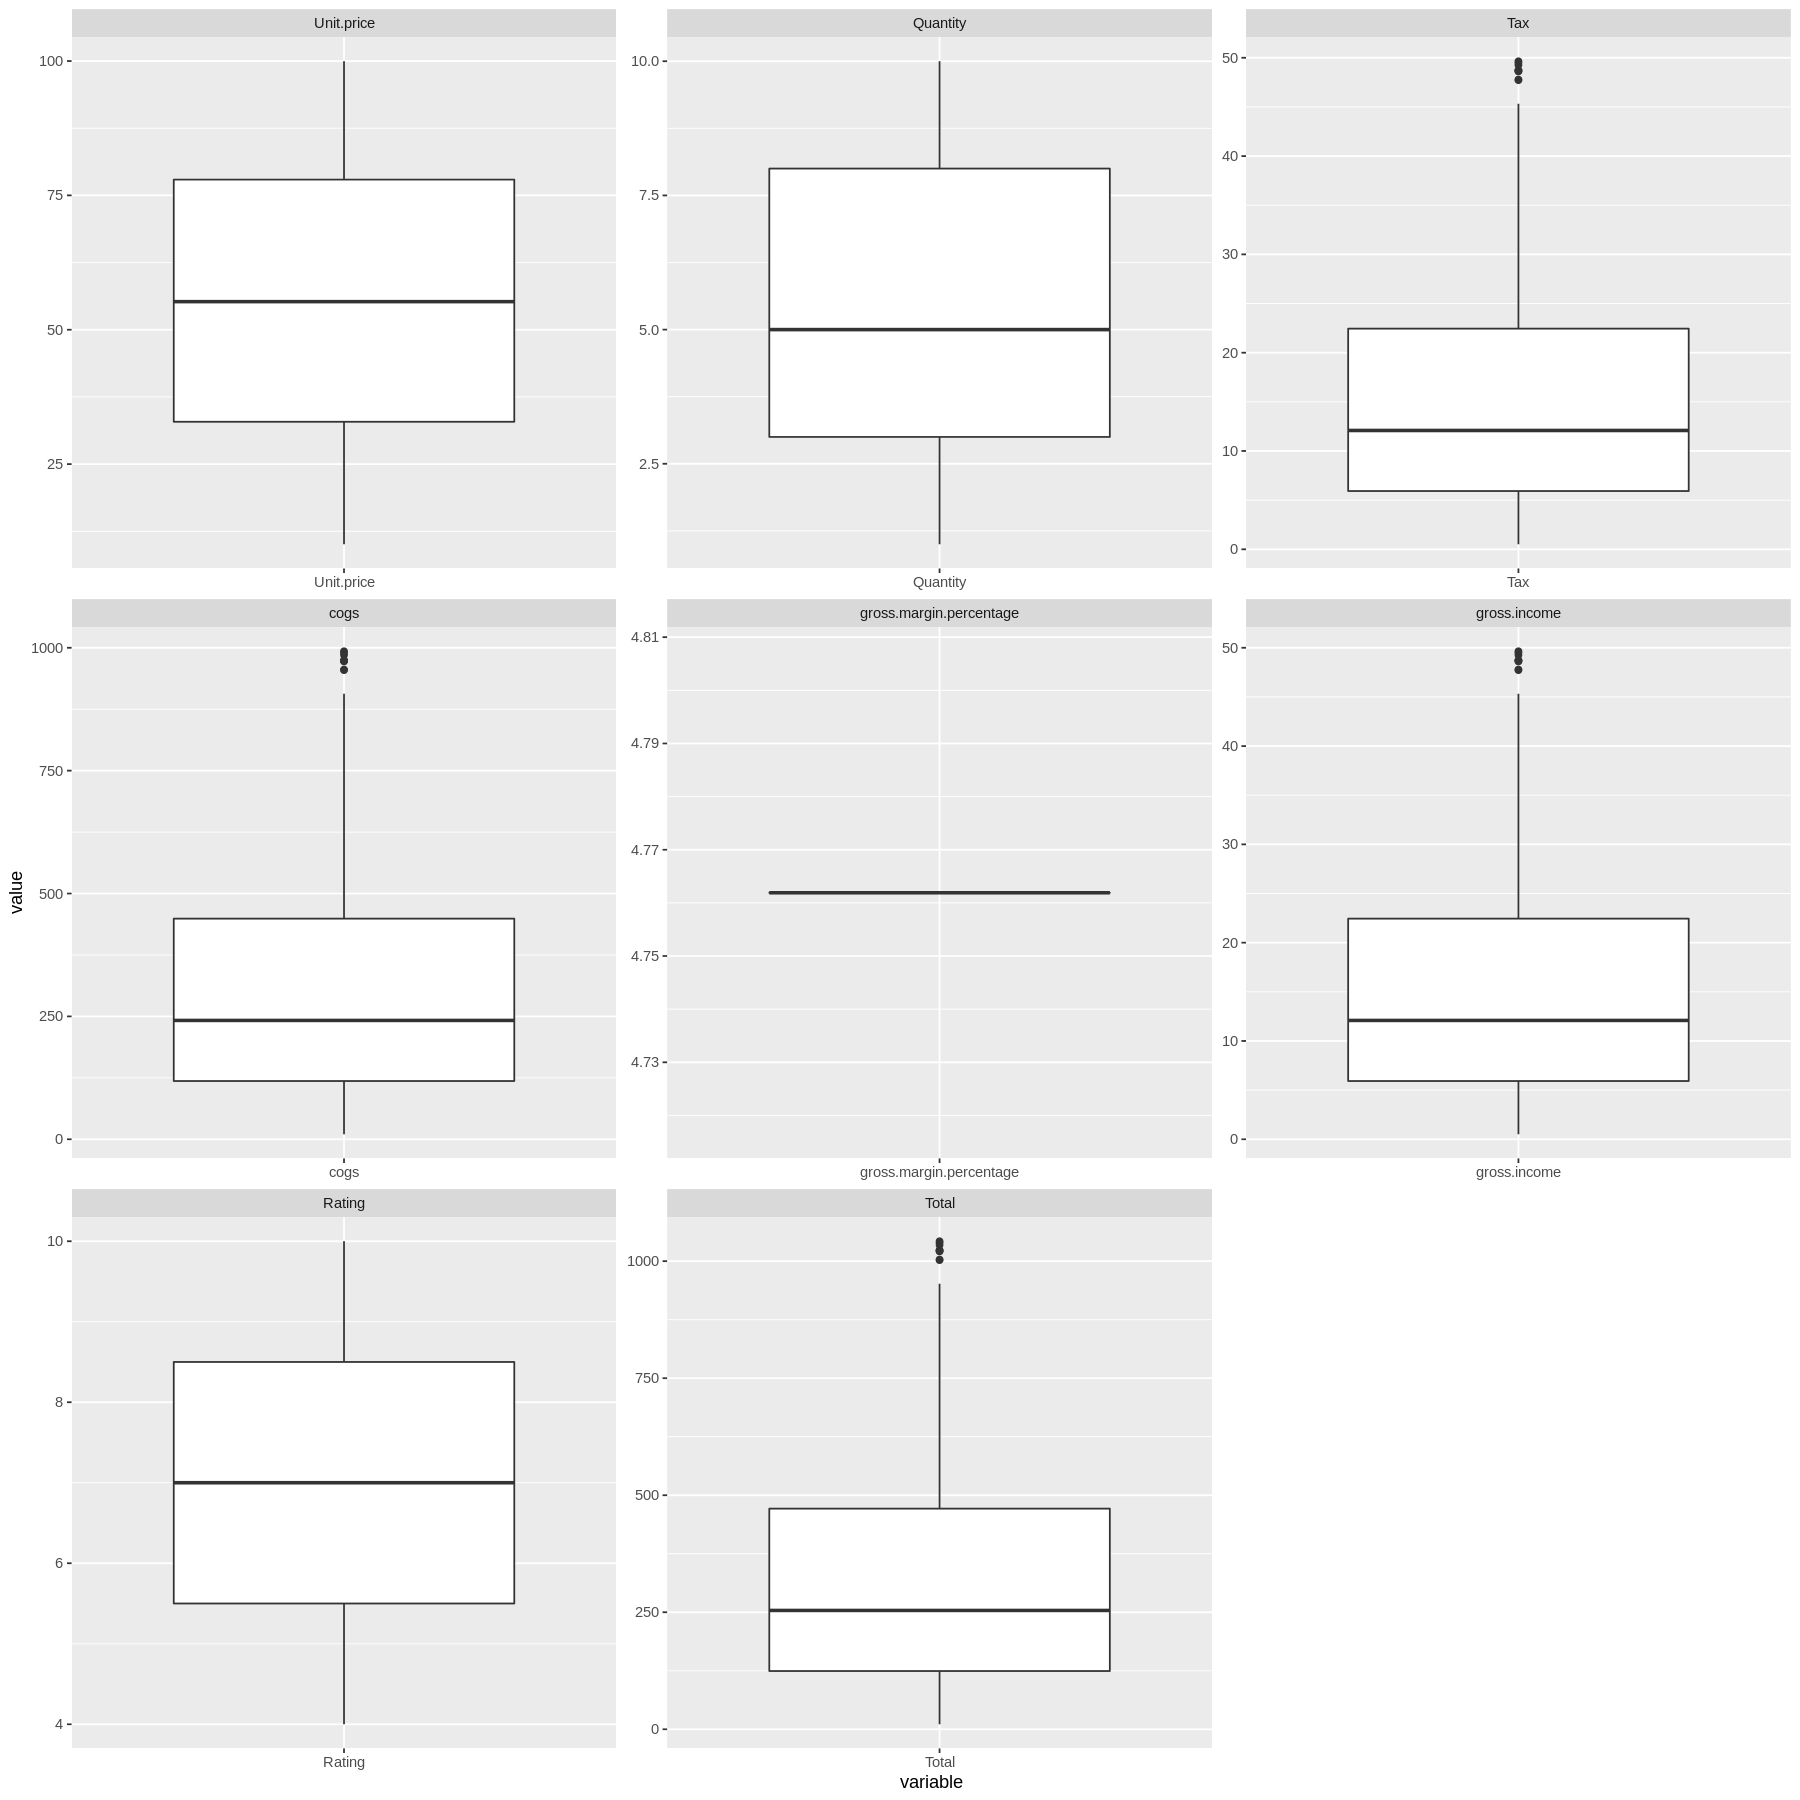

In [ ]:
# Plotting boxplots to check for outliers

options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(melt(retail_num), aes(variable, value))+ geom_boxplot() + facet_wrap(~variable, scale="free")

- From the above graph, a few items are taxed more heavily compared to others. These outlier values in the tax attribute are transferred to the total and gross income attributes.

# Exploratory Data Analysis

## Univariate Analysis

- In this section, we will investigate each variable individually. The steps here include calculating and interpreting measures of central tendency (mode, median, mean) as well as computing and explaining the range, the interquartile range, the standard deviation, variance, skewness, and kurtosis

In [ ]:
install.packages("fBasics", dependencies=TRUE)
library('fBasics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’, ‘akima’, ‘RUnit’


Loading required package: timeDate

Loading required package: timeSeries



In [ ]:
# Calculating the mean for all numeric columns

colMeans(retail_num)

Unit.price                Quantity                     Tax 
              55.672130                5.510000               15.379369 
                   cogs gross.margin.percentage            gross.income 
             307.587380                4.761905               15.379369 
                 Rating                   Total 
               6.972700              322.966749

In [ ]:
# Calculating the mode for all numeric columns

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
lapply(retail_num,FUN=getmode)

$Unit.price
[1] 83.77

$Quantity
[1] 10

$Tax
[1] 39.48

$cogs
[1] 789.6

$gross.margin.percentage
[1] 4.761905

$gross.income
[1] 39.48

$Rating
[1] 6

$Total
[1] 829.08

In [ ]:
# Calculating the minimum value for all numeric columns

colMins(retail_num)

Unit.price                Quantity                     Tax 
              10.080000                1.000000                0.508500 
                   cogs gross.margin.percentage            gross.income 
              10.170000                4.761905                0.508500 
                 Rating                   Total 
               4.000000               10.678500

In [ ]:
# Calculating the maximum value for all numeric columns

colMaxs(retail_num)

Unit.price                Quantity                     Tax 
              99.960000               10.000000               49.650000 
                   cogs gross.margin.percentage            gross.income 
             993.000000                4.761905               49.650000 
                 Rating                   Total 
              10.000000             1042.650000

In [ ]:
# Checking the range for all numeric columns

lapply(retail_num,FUN=range)

$Unit.price
[1] 10.08 99.96

$Quantity
[1]  1 10

$Tax
[1]  0.5085 49.6500

$cogs
[1]  10.17 993.00

$gross.margin.percentage
[1] 4.761905 4.761905

$gross.income
[1]  0.5085 49.6500

$Rating
[1]  4 10

$Total
[1]   10.6785 1042.6500

In [ ]:
# Calculating the variance for all numeric columns

colVars(retail_num)

Unit.price                Quantity                     Tax 
             701.965331                8.546446              137.096594 
                   cogs gross.margin.percentage            gross.income 
           54838.637658                0.000000              137.096594 
                 Rating                   Total 
               2.953518            60459.598018

In [ ]:
# Calculating the standard deviation for all numeric columns

colStdevs(retail_num)

Unit.price                Quantity                     Tax 
              26.494628                2.923431               11.708825 
                   cogs gross.margin.percentage            gross.income 
             234.176510                0.000000               11.708825 
                 Rating                   Total 
               1.718580              245.885335

In [ ]:
# Calculating the kurtosis for all numeric columns

colKurtosis(retail_num)

Unit.price                Quantity                     Tax 
            -1.22206222             -1.21903927             -0.09329206 
                   cogs gross.margin.percentage            gross.income 
            -0.09329206                     NaN             -0.09329206 
                 Rating                   Total 
            -1.15552546             -0.09329206

In [ ]:
# Calculating the skewness for all numeric columns

colSkewness(retail_num)

Unit.price                Quantity                     Tax 
            0.007056230             0.012902251             0.889893881 
                   cogs gross.margin.percentage            gross.income 
            0.889893881                     NaN             0.889893881 
                 Rating                   Total 
            0.008982638             0.889893881

ERROR: ignored

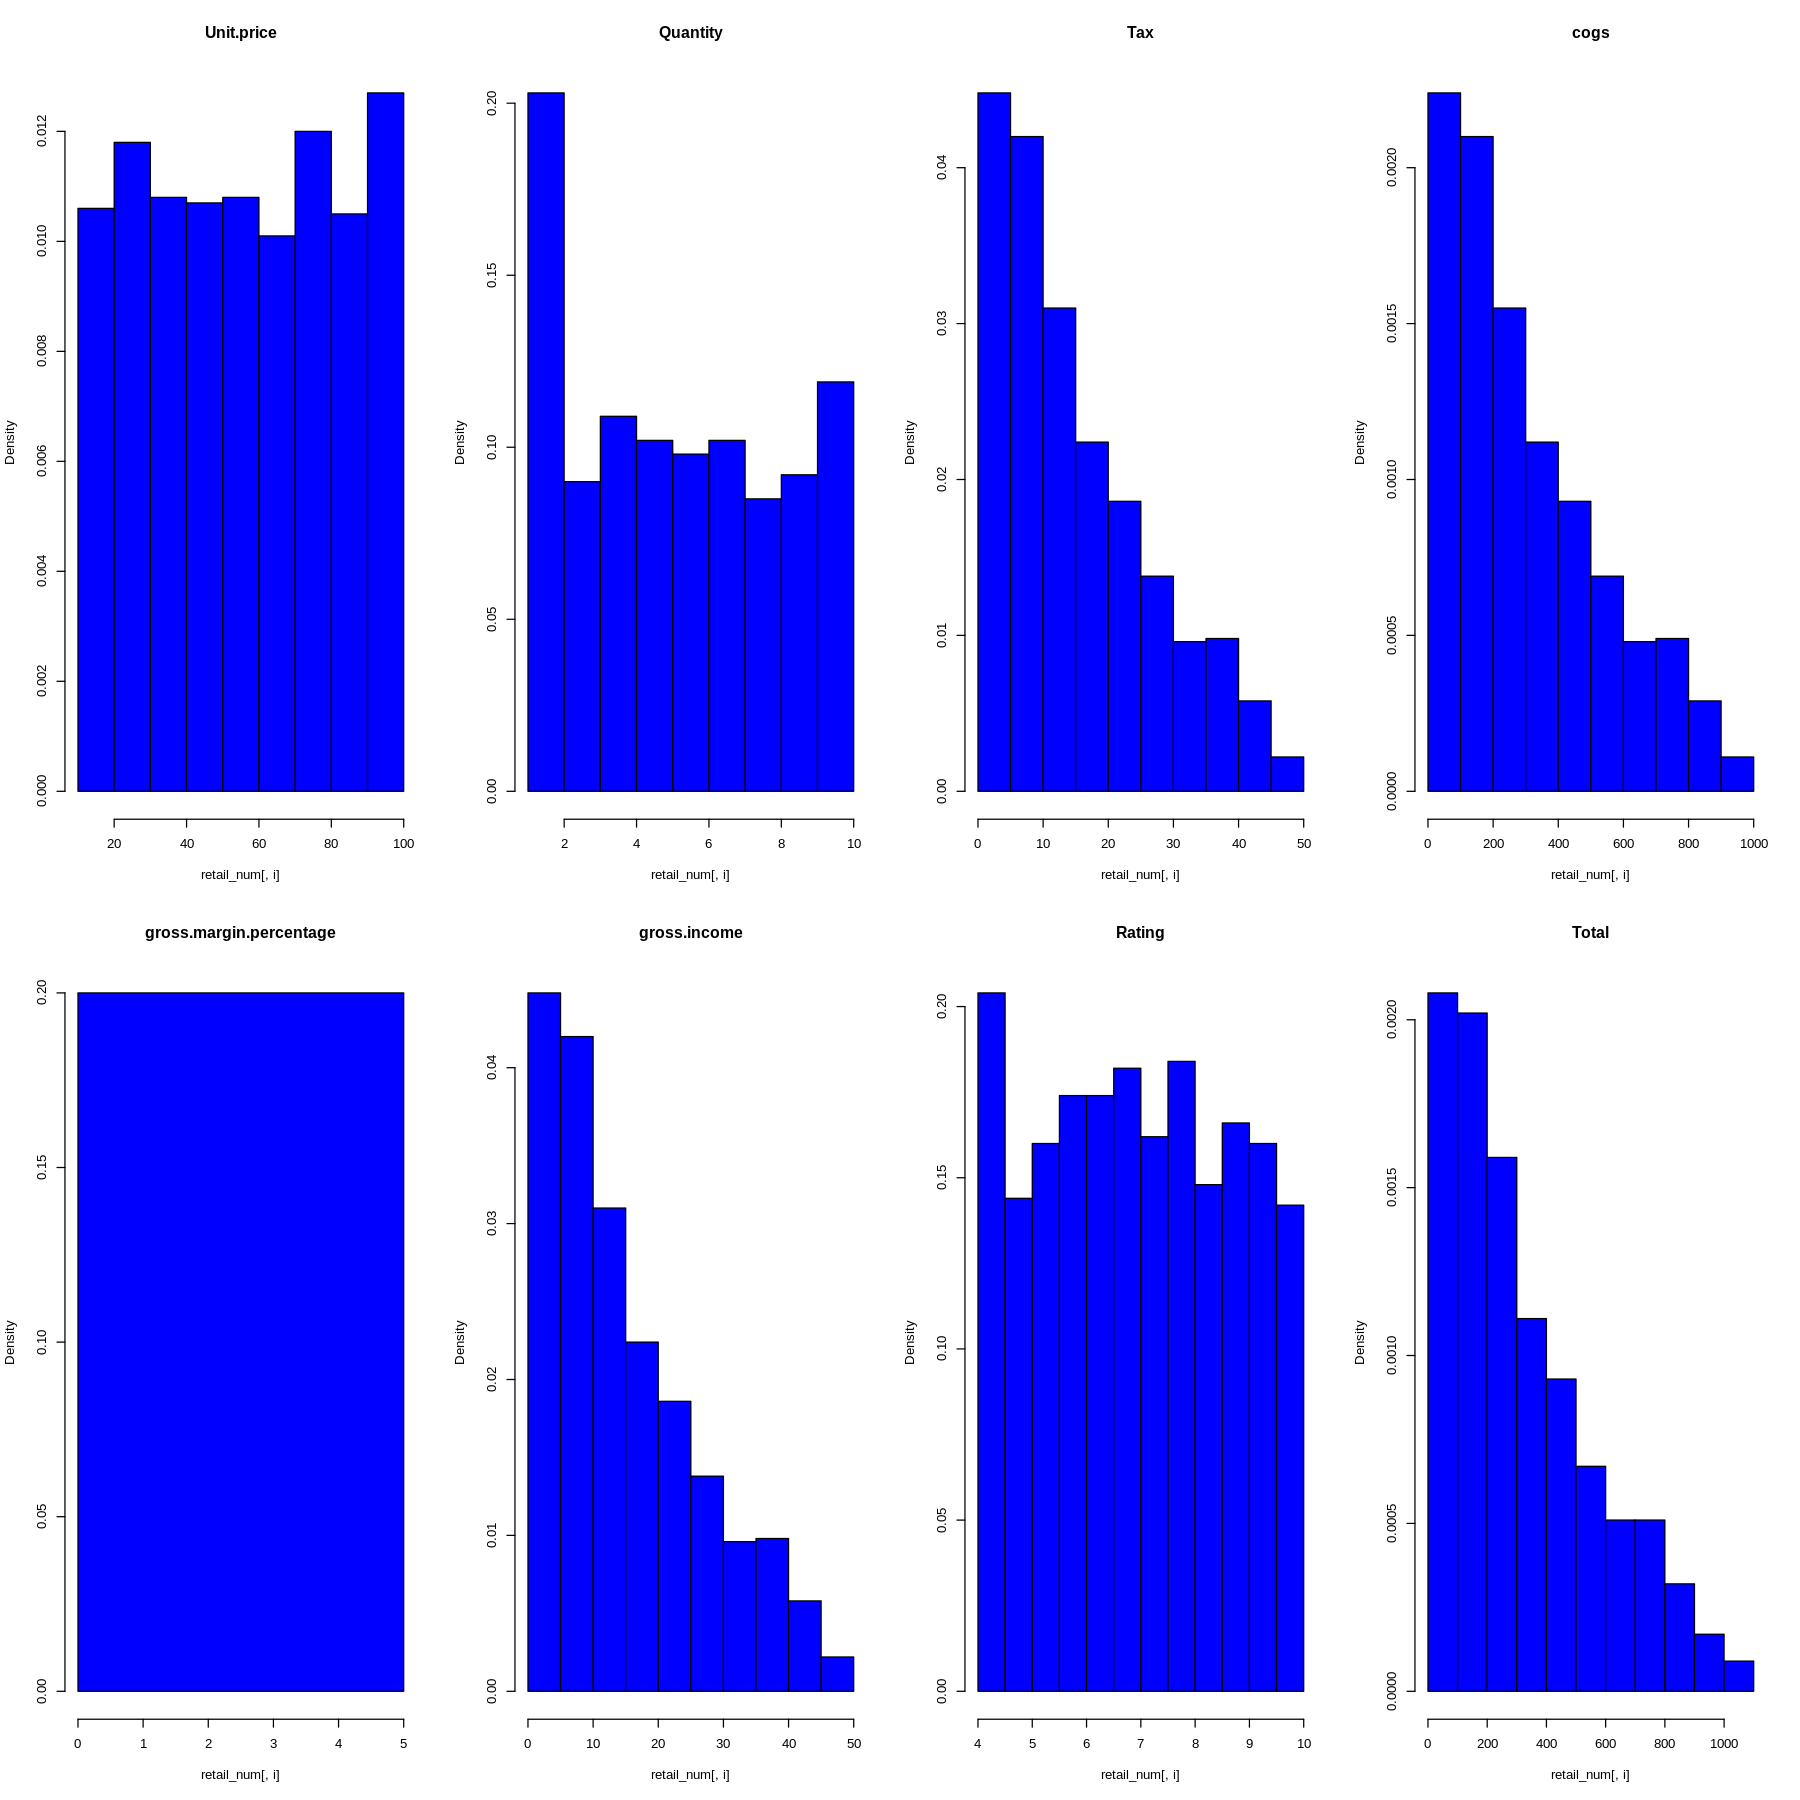

In [ ]:
# Plotting histograms to check distributions of numeric attributes

par(mfrow=c(2,4))
colnames <- dimnames(retail_num)[[2]]
for (i in 1:15) {
    hist(retail_num[,i], main=colnames[i], probability=TRUE, col="blue", border="black")
}


ERROR: ignored

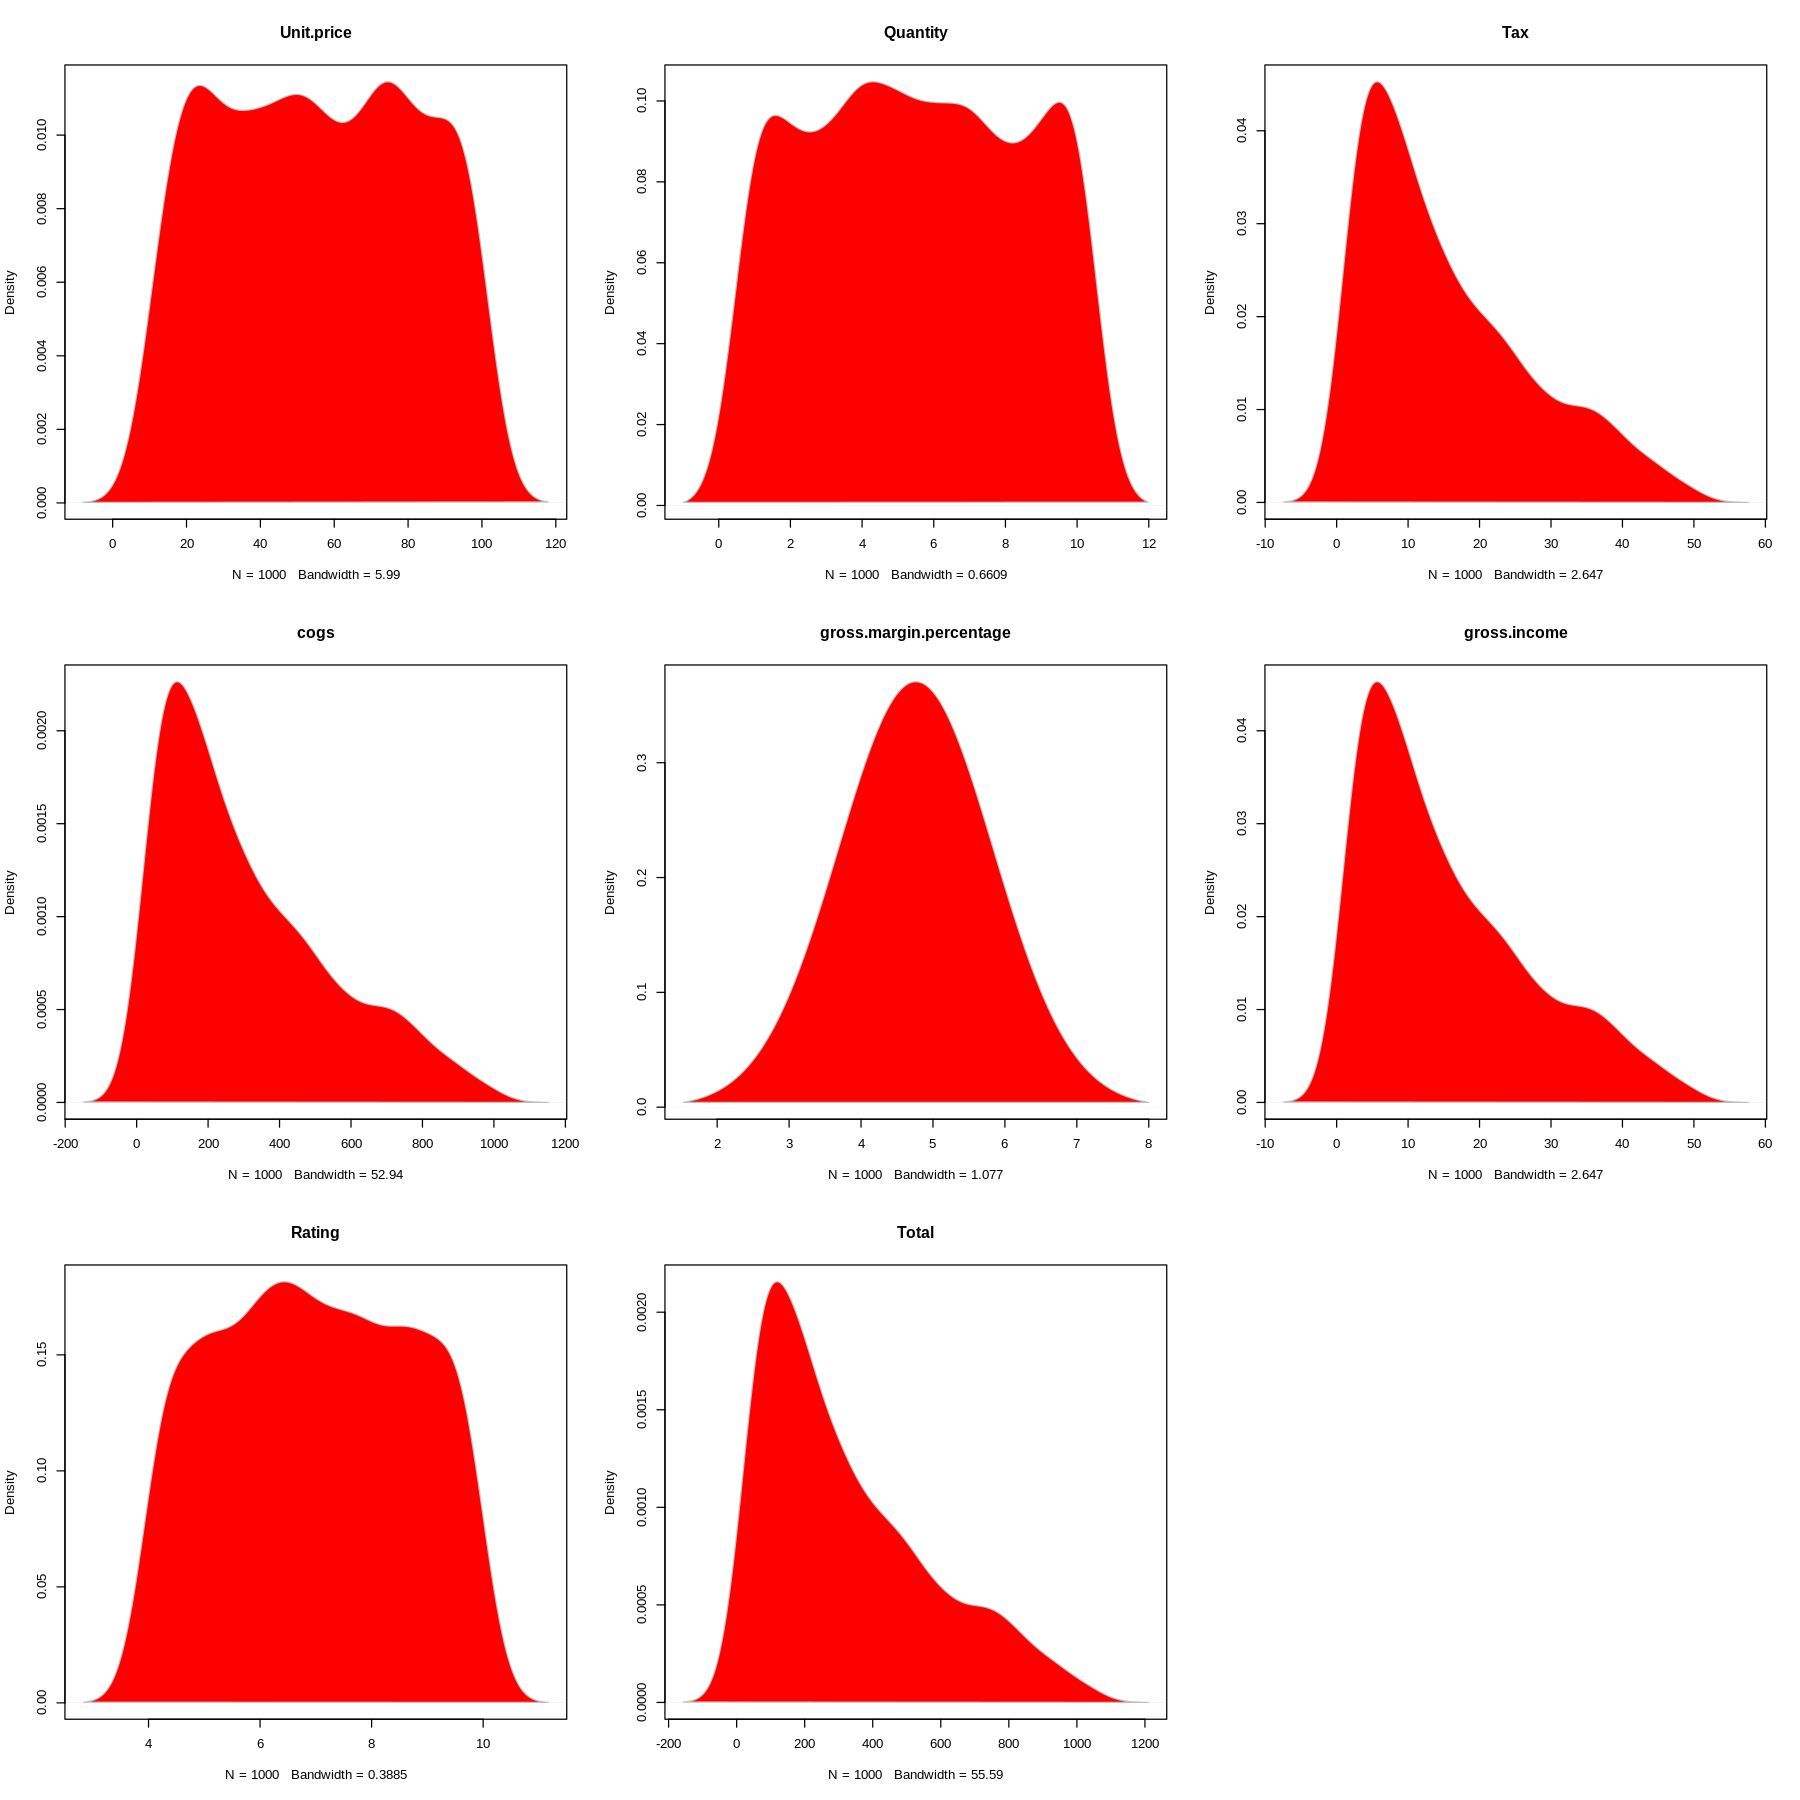

In [ ]:
# Density plots

par(mfrow=c(3,3))
colnames <- dimnames(retail_num)[[2]]
for (i in 1:15) {
    d <- density(retail_num[,i])
    plot(d, type="n", main=colnames[i])
    polygon(d, col="red", border="gray")
}


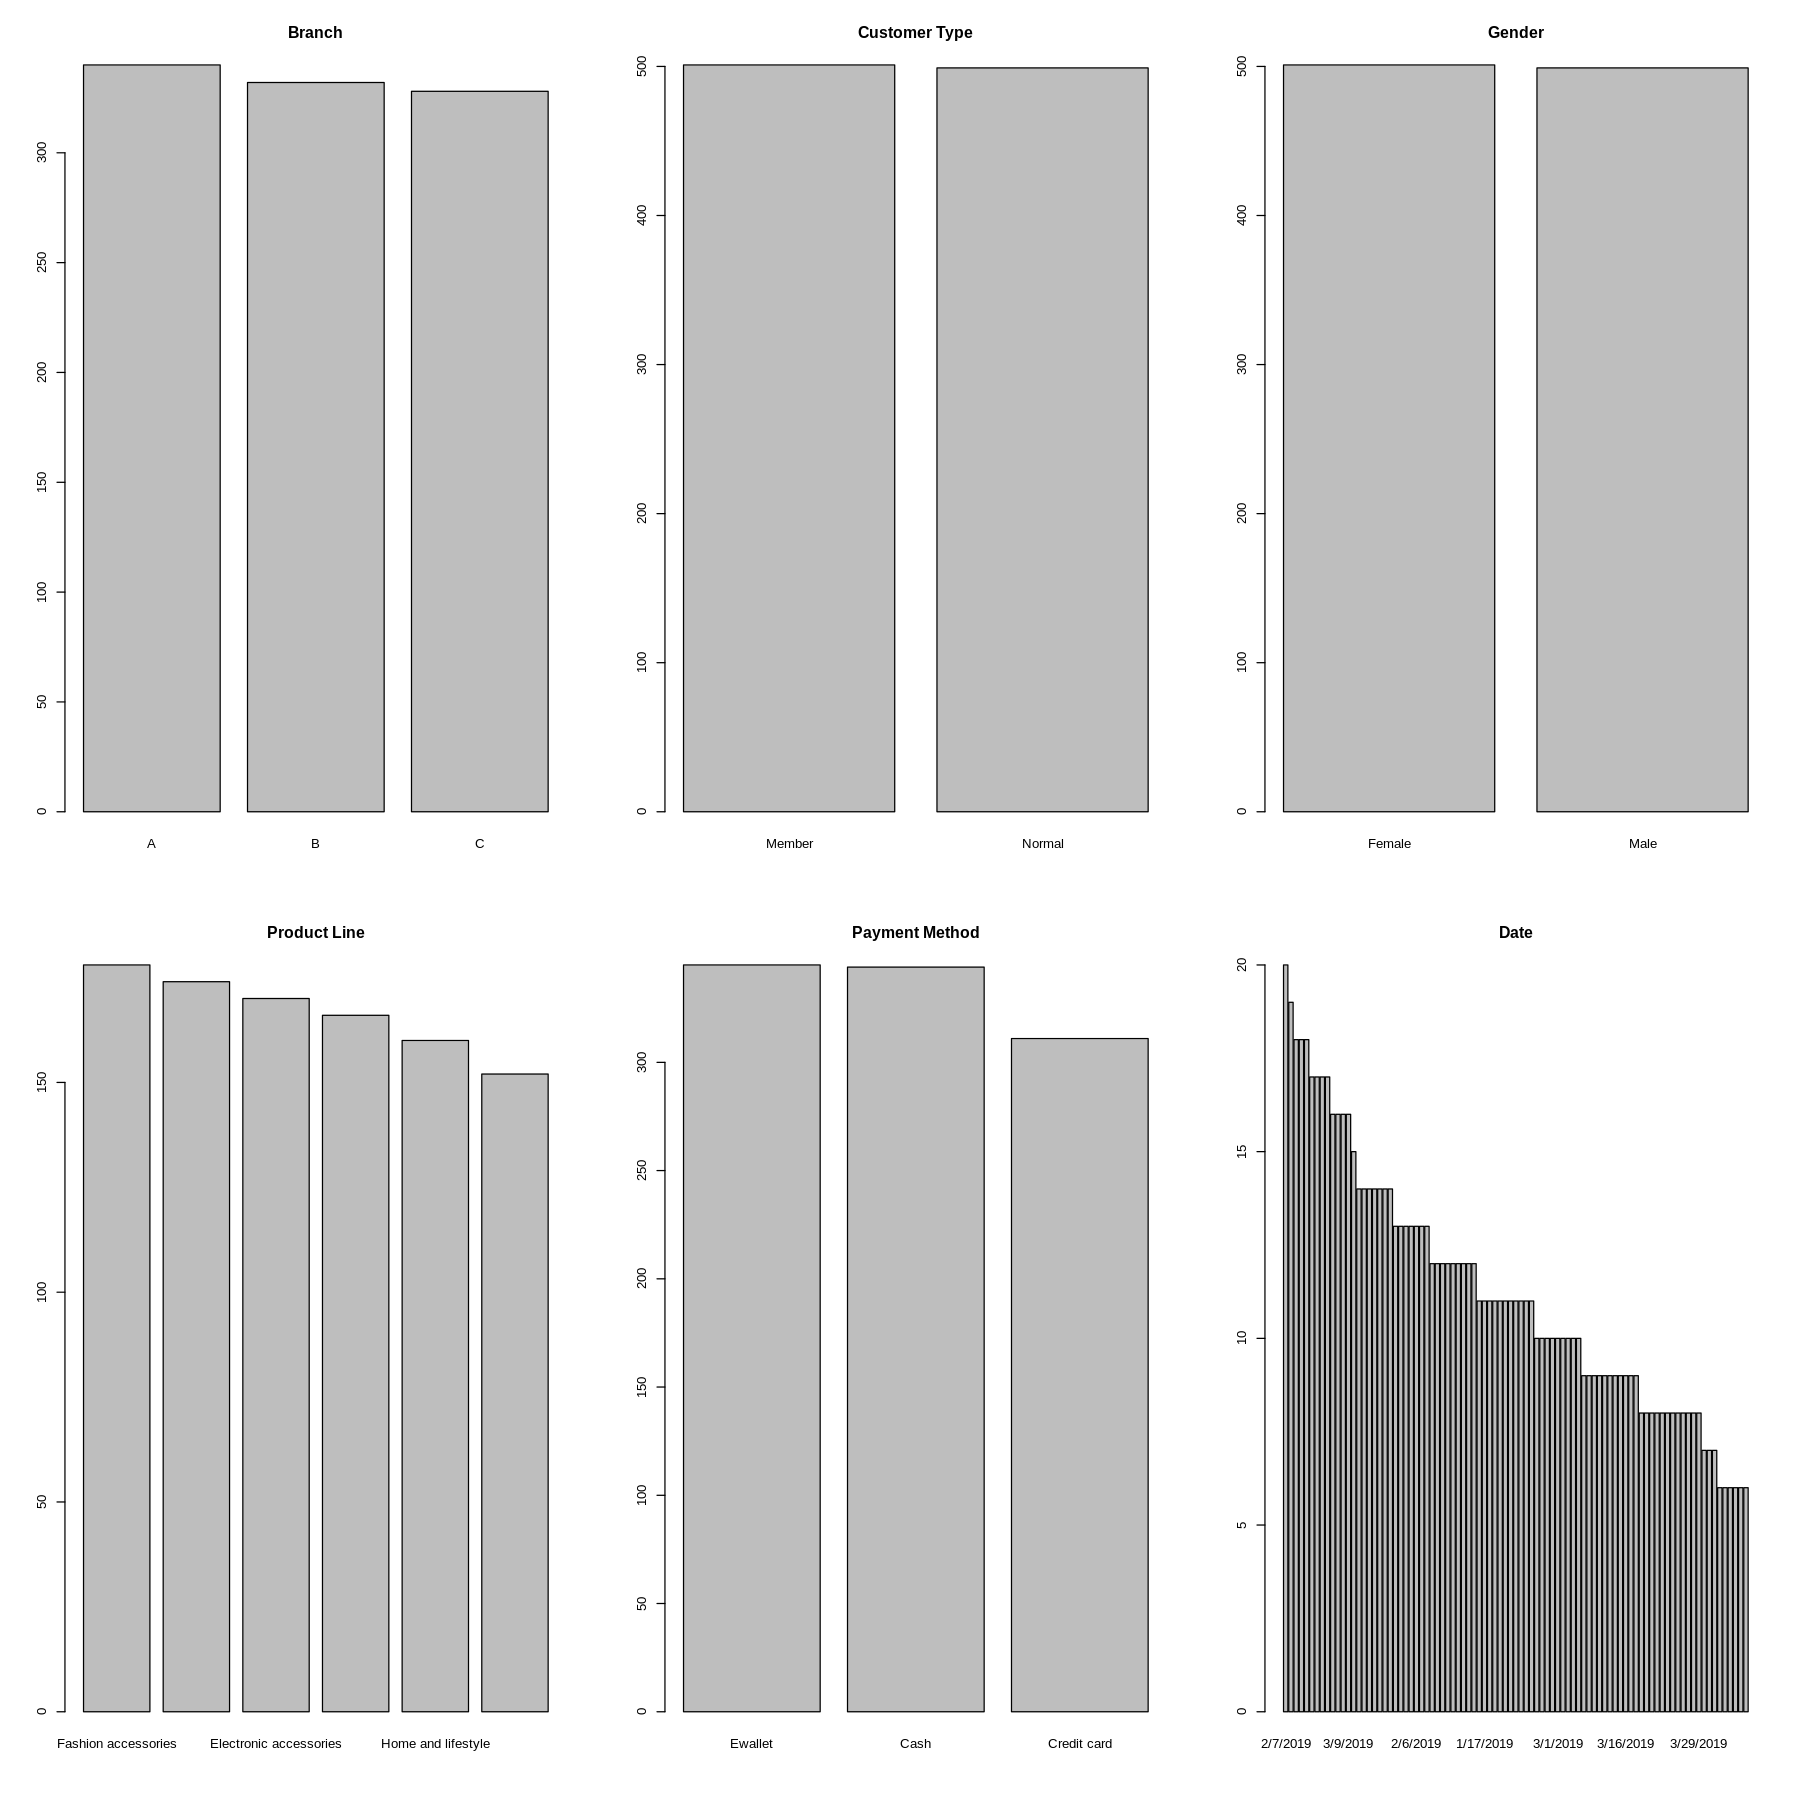

In [ ]:
# Bar plot of categorical attributes

par(mfrow=c(2,3))
colnames <- dimnames(retail)[[2]]
barplot(sort(table(retail$Branch), decreasing=T),main='Branch')
barplot(sort(table(retail$Customer.type), decreasing=T), main = 'Customer Type')
barplot(sort(table(retail$Gender), decreasing=T), main = 'Gender')
barplot(sort(table(retail$Product.line), decreasing=T), main = 'Product Line')
barplot(sort(table(retail$Payment), decreasing=T), main = 'Payment Method')
barplot(sort(table(retail$Date), decreasing=T), main = 'Date')

## Bivariate Analysis

In this section, we investigate the relationship of different variables by creating relevant visualizations such as scatter plots, correlation matrix and Pearson correlation coefficient. 

In [ ]:
# Removing column with 0 standard deviation

retail_num <- retail_num[,-5] 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



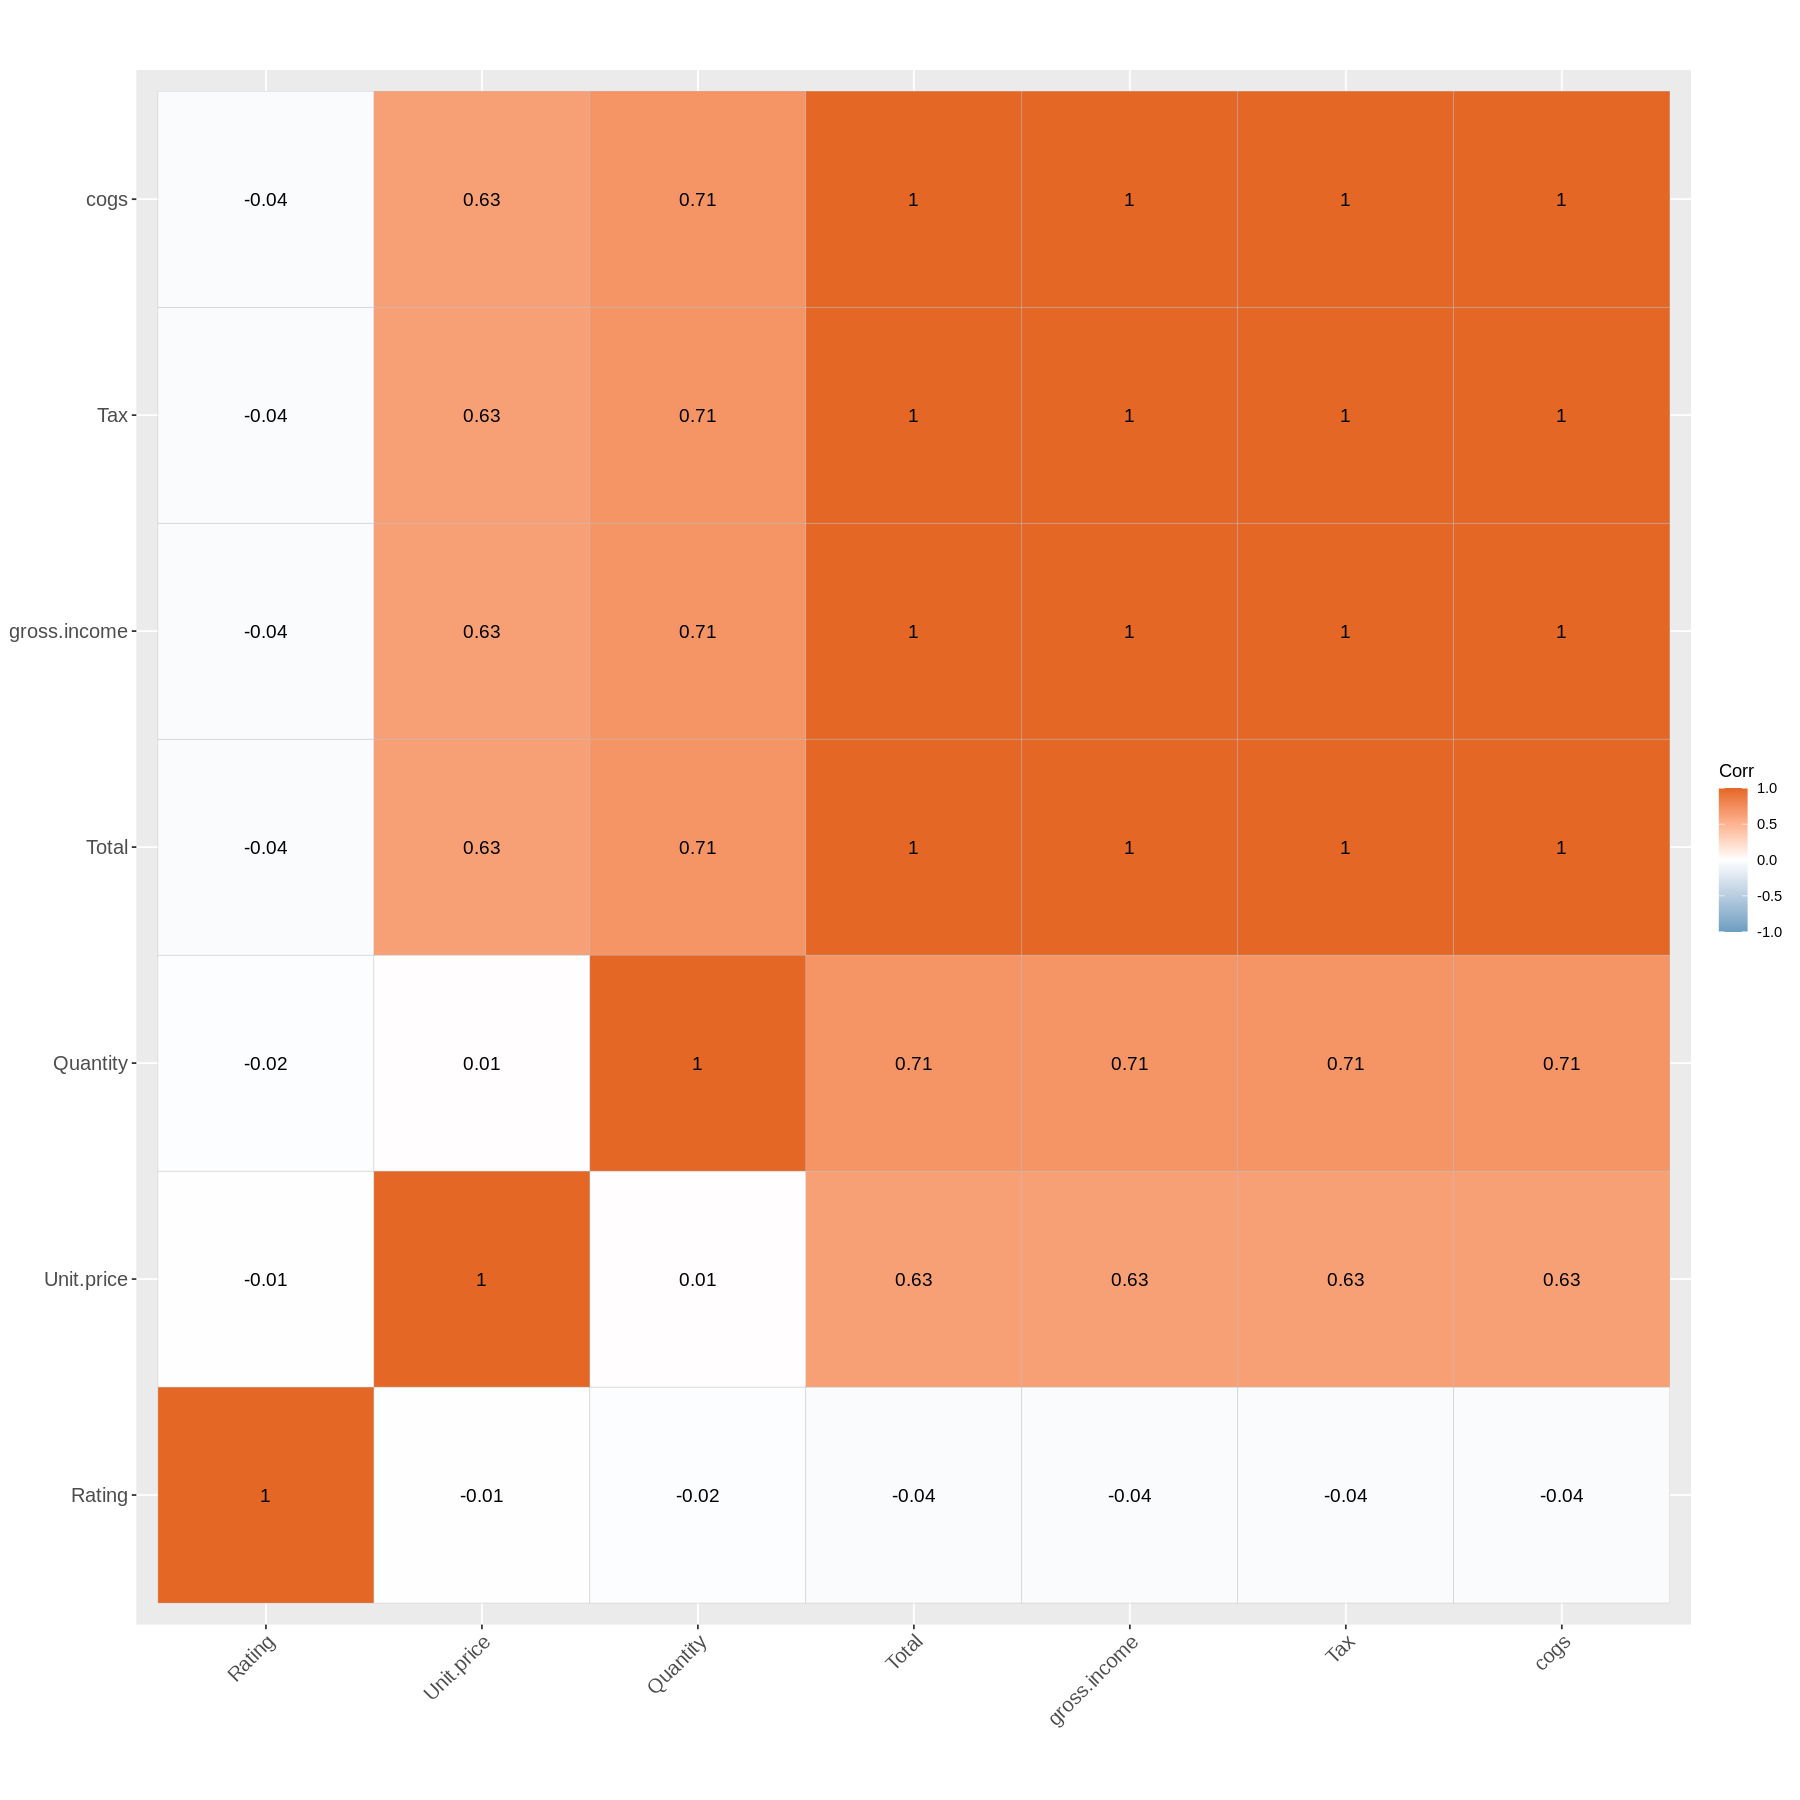

In [ ]:
# Checking the correlation coefficients for numeric variables

install.packages("ggcorrplot")
library(ggcorrplot)
corr = round(cor(select_if(retail_num, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = T)

- The total attribute has a strong positive correlation to tax, quantity, cogs and gross income attributes. This is expected since total amount is calculated from those attributes.

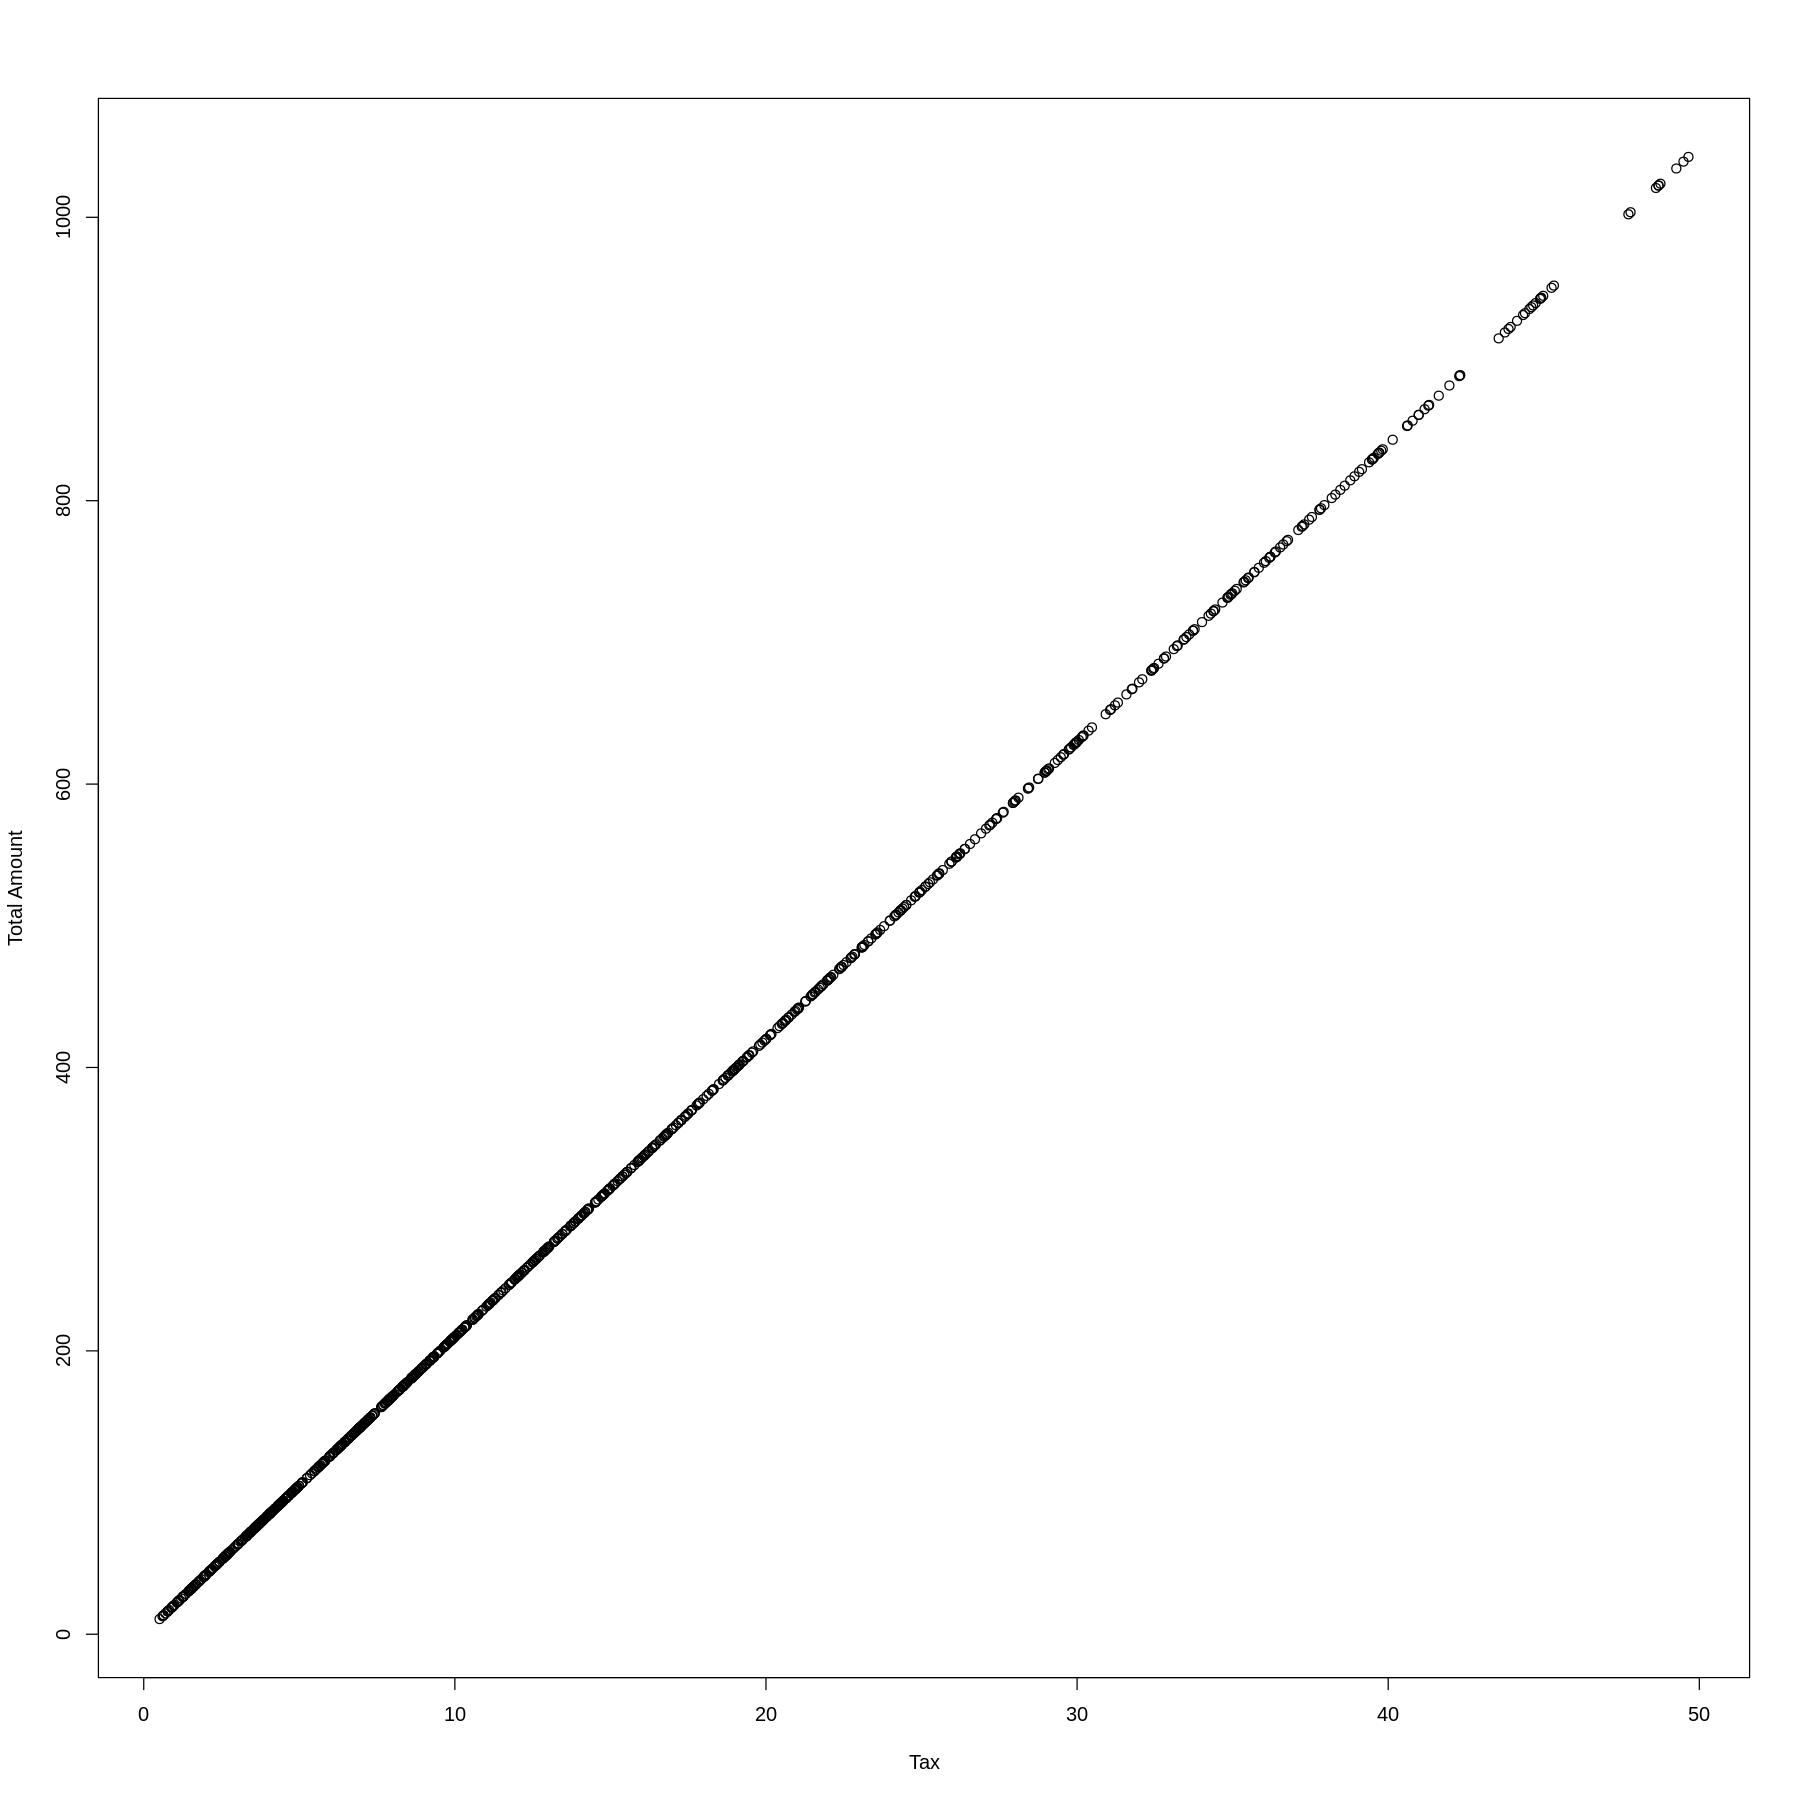

In [ ]:
# Scatter plot to compare tax vs total amount

plot(retail$Tax, retail$Total, xlab="Tax", ylab="Total Amount")

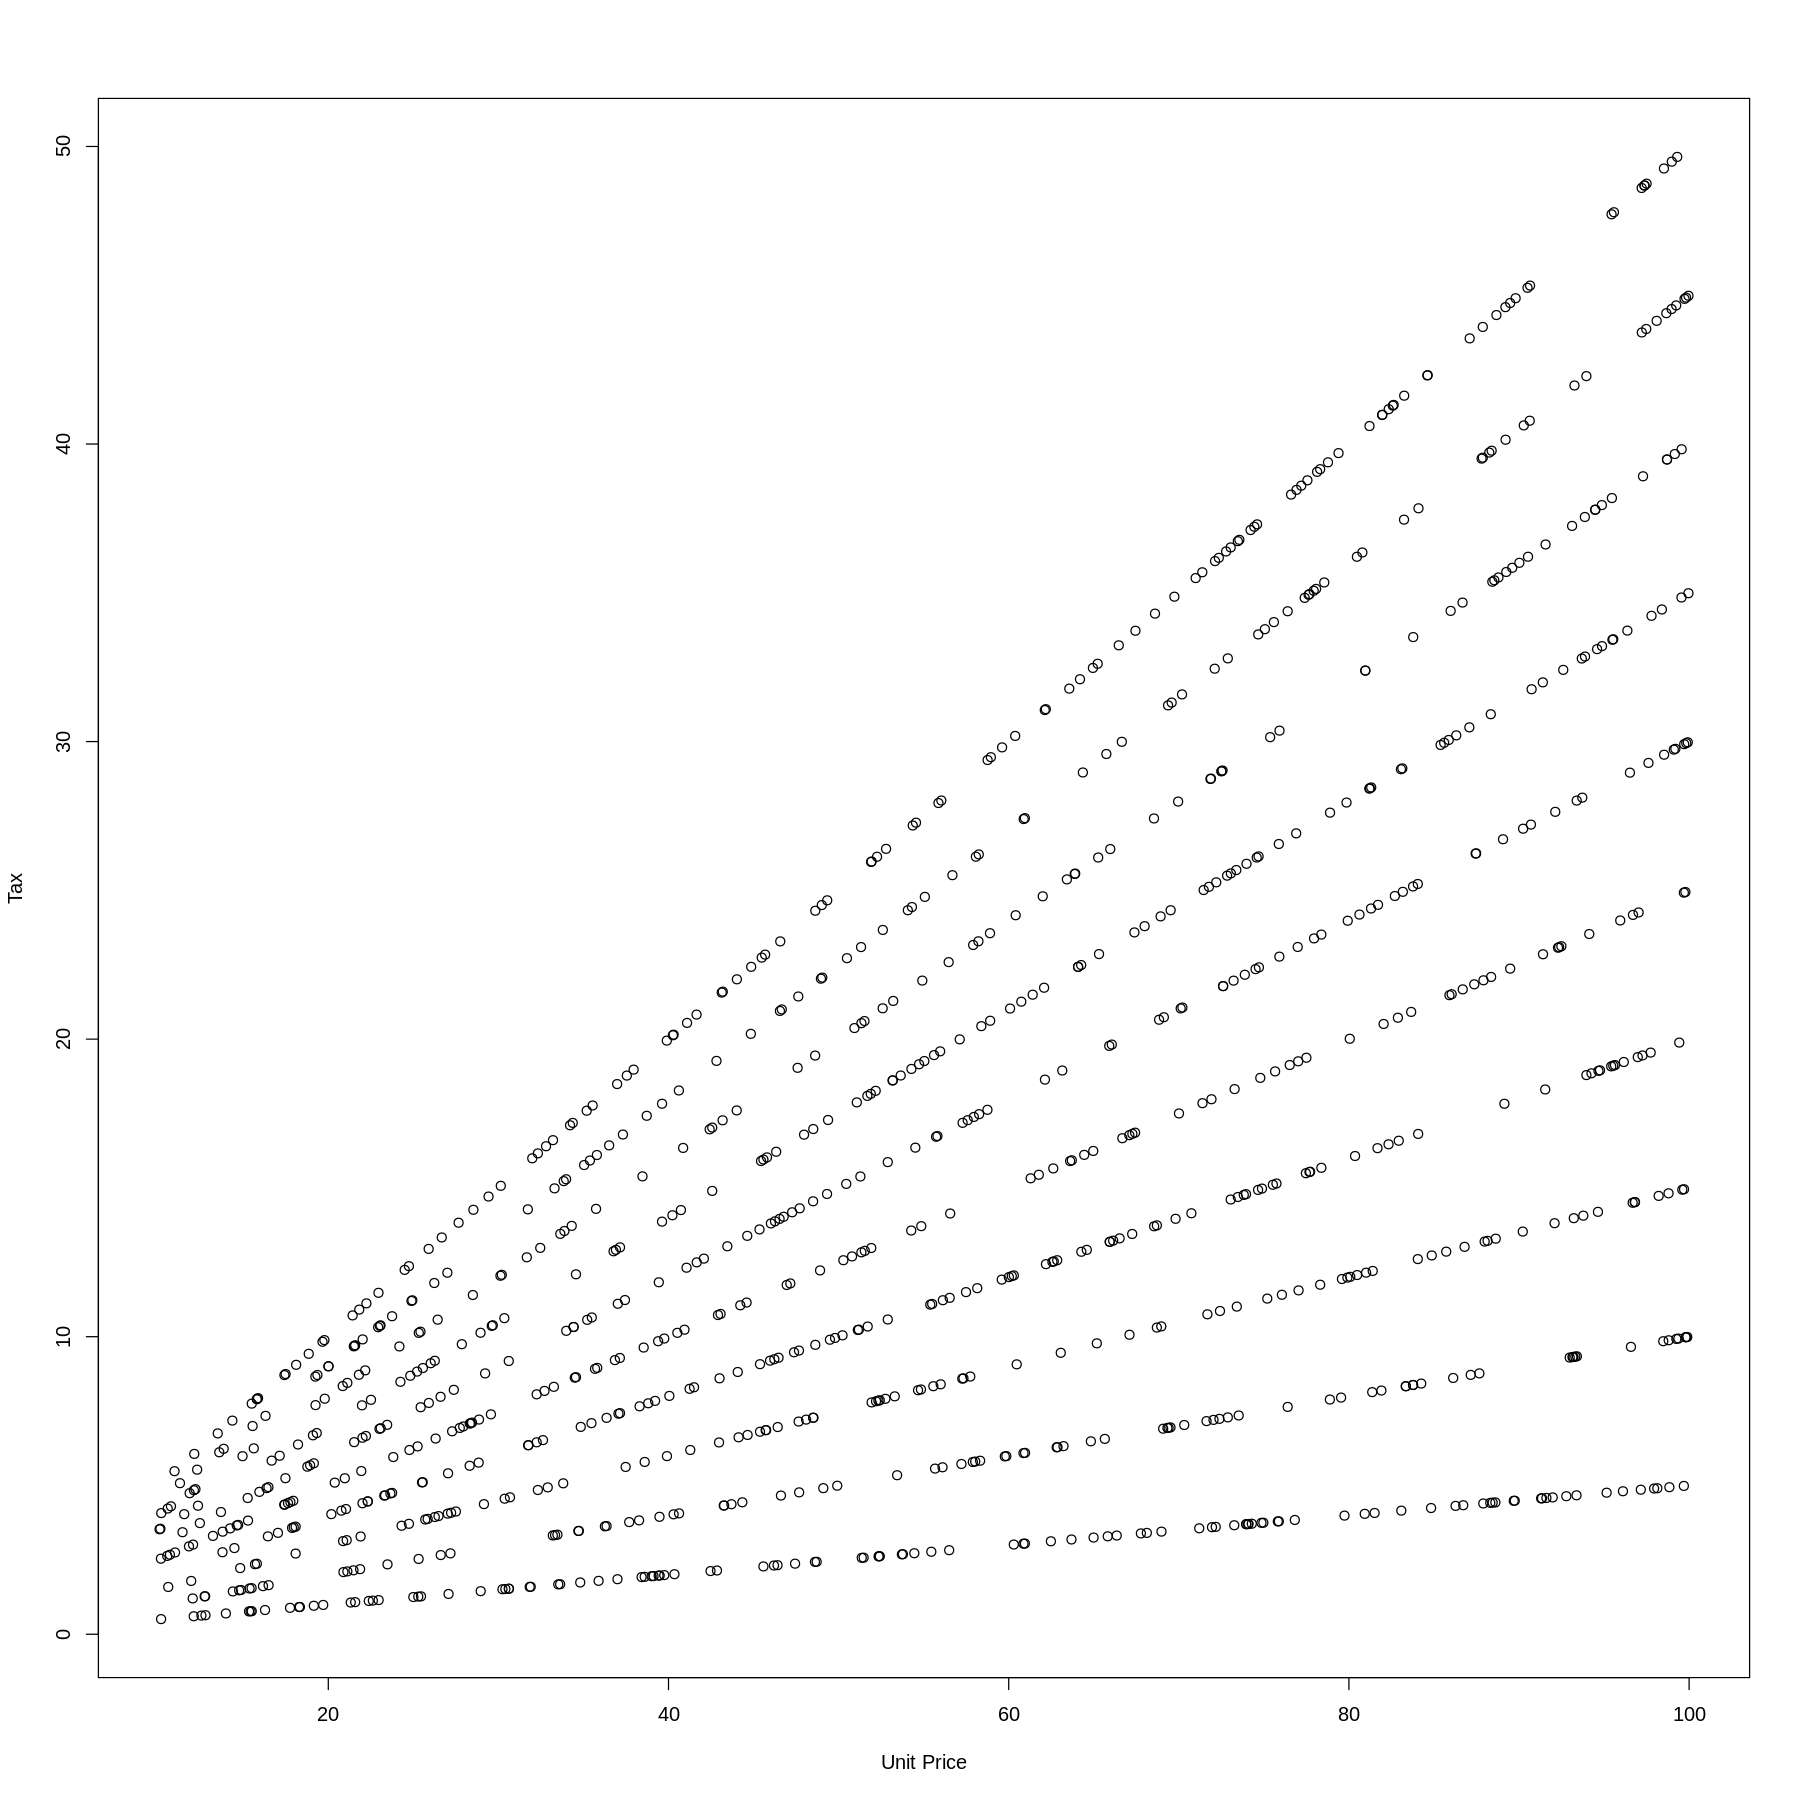

In [ ]:
# Scatter plot to unit price and tax amount

plot(retail$Unit.price, retail$Tax, xlab="Unit Price", ylab="Tax")

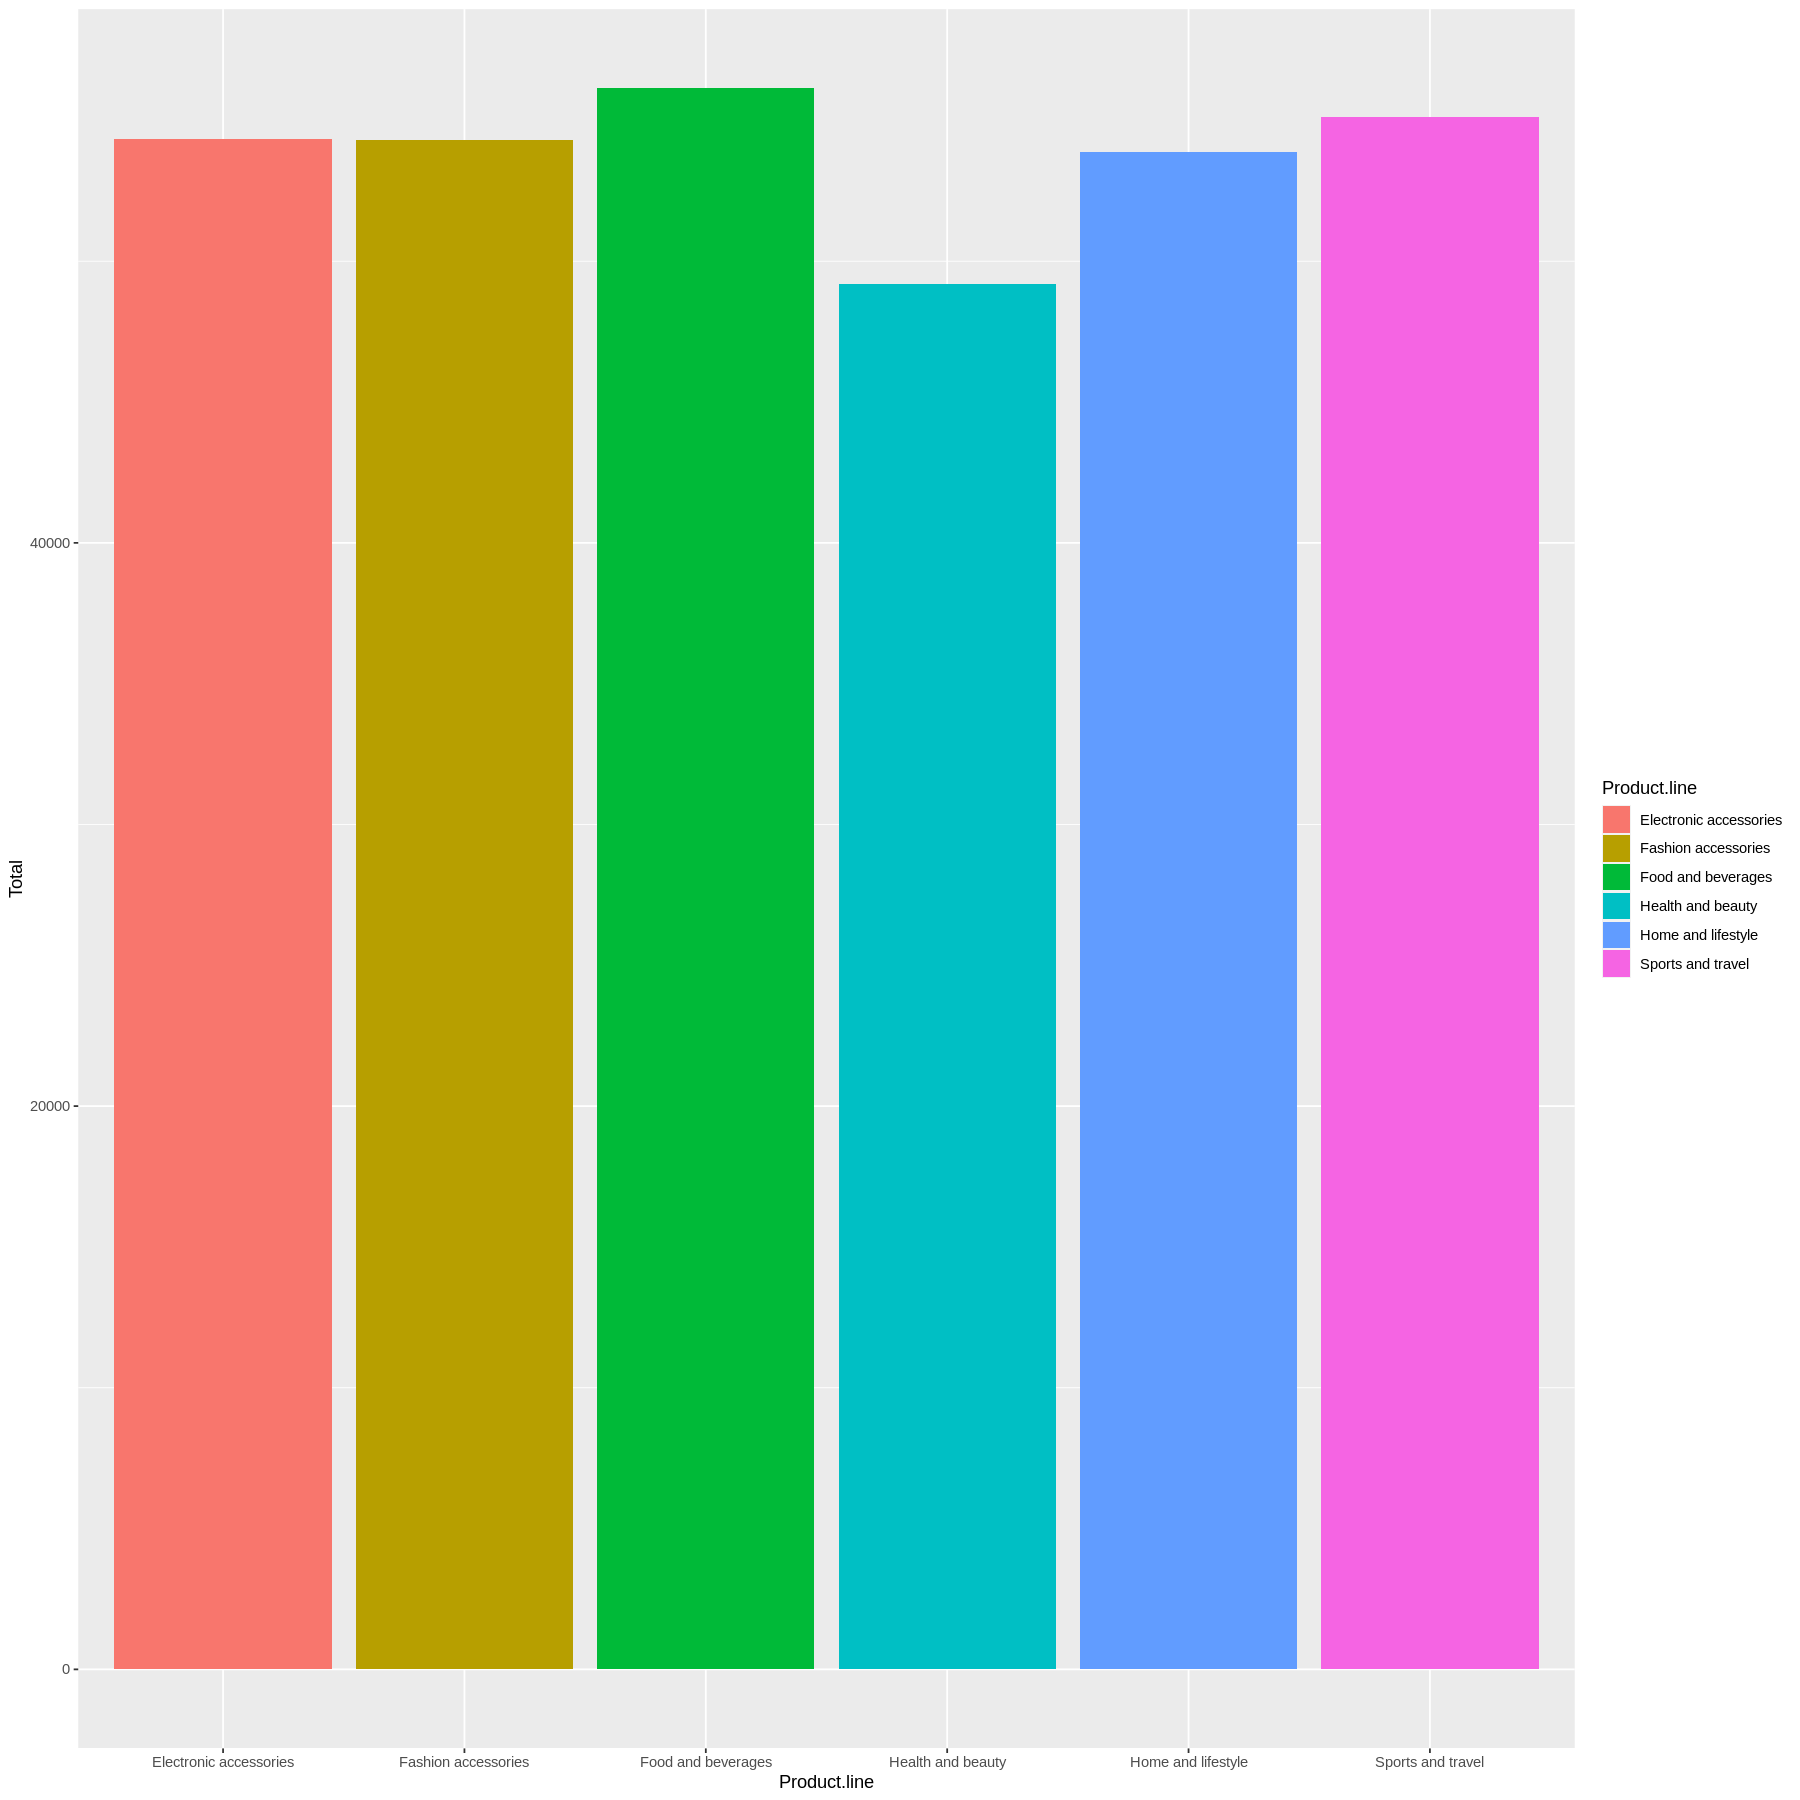

In [ ]:
# Comparing total amount by product line

ggplot(data = retail,aes(x = Product.line, y = Total)) + geom_col(aes(fill = Product.line))

- Food and beverages has the highest total amount compared to other product lines.

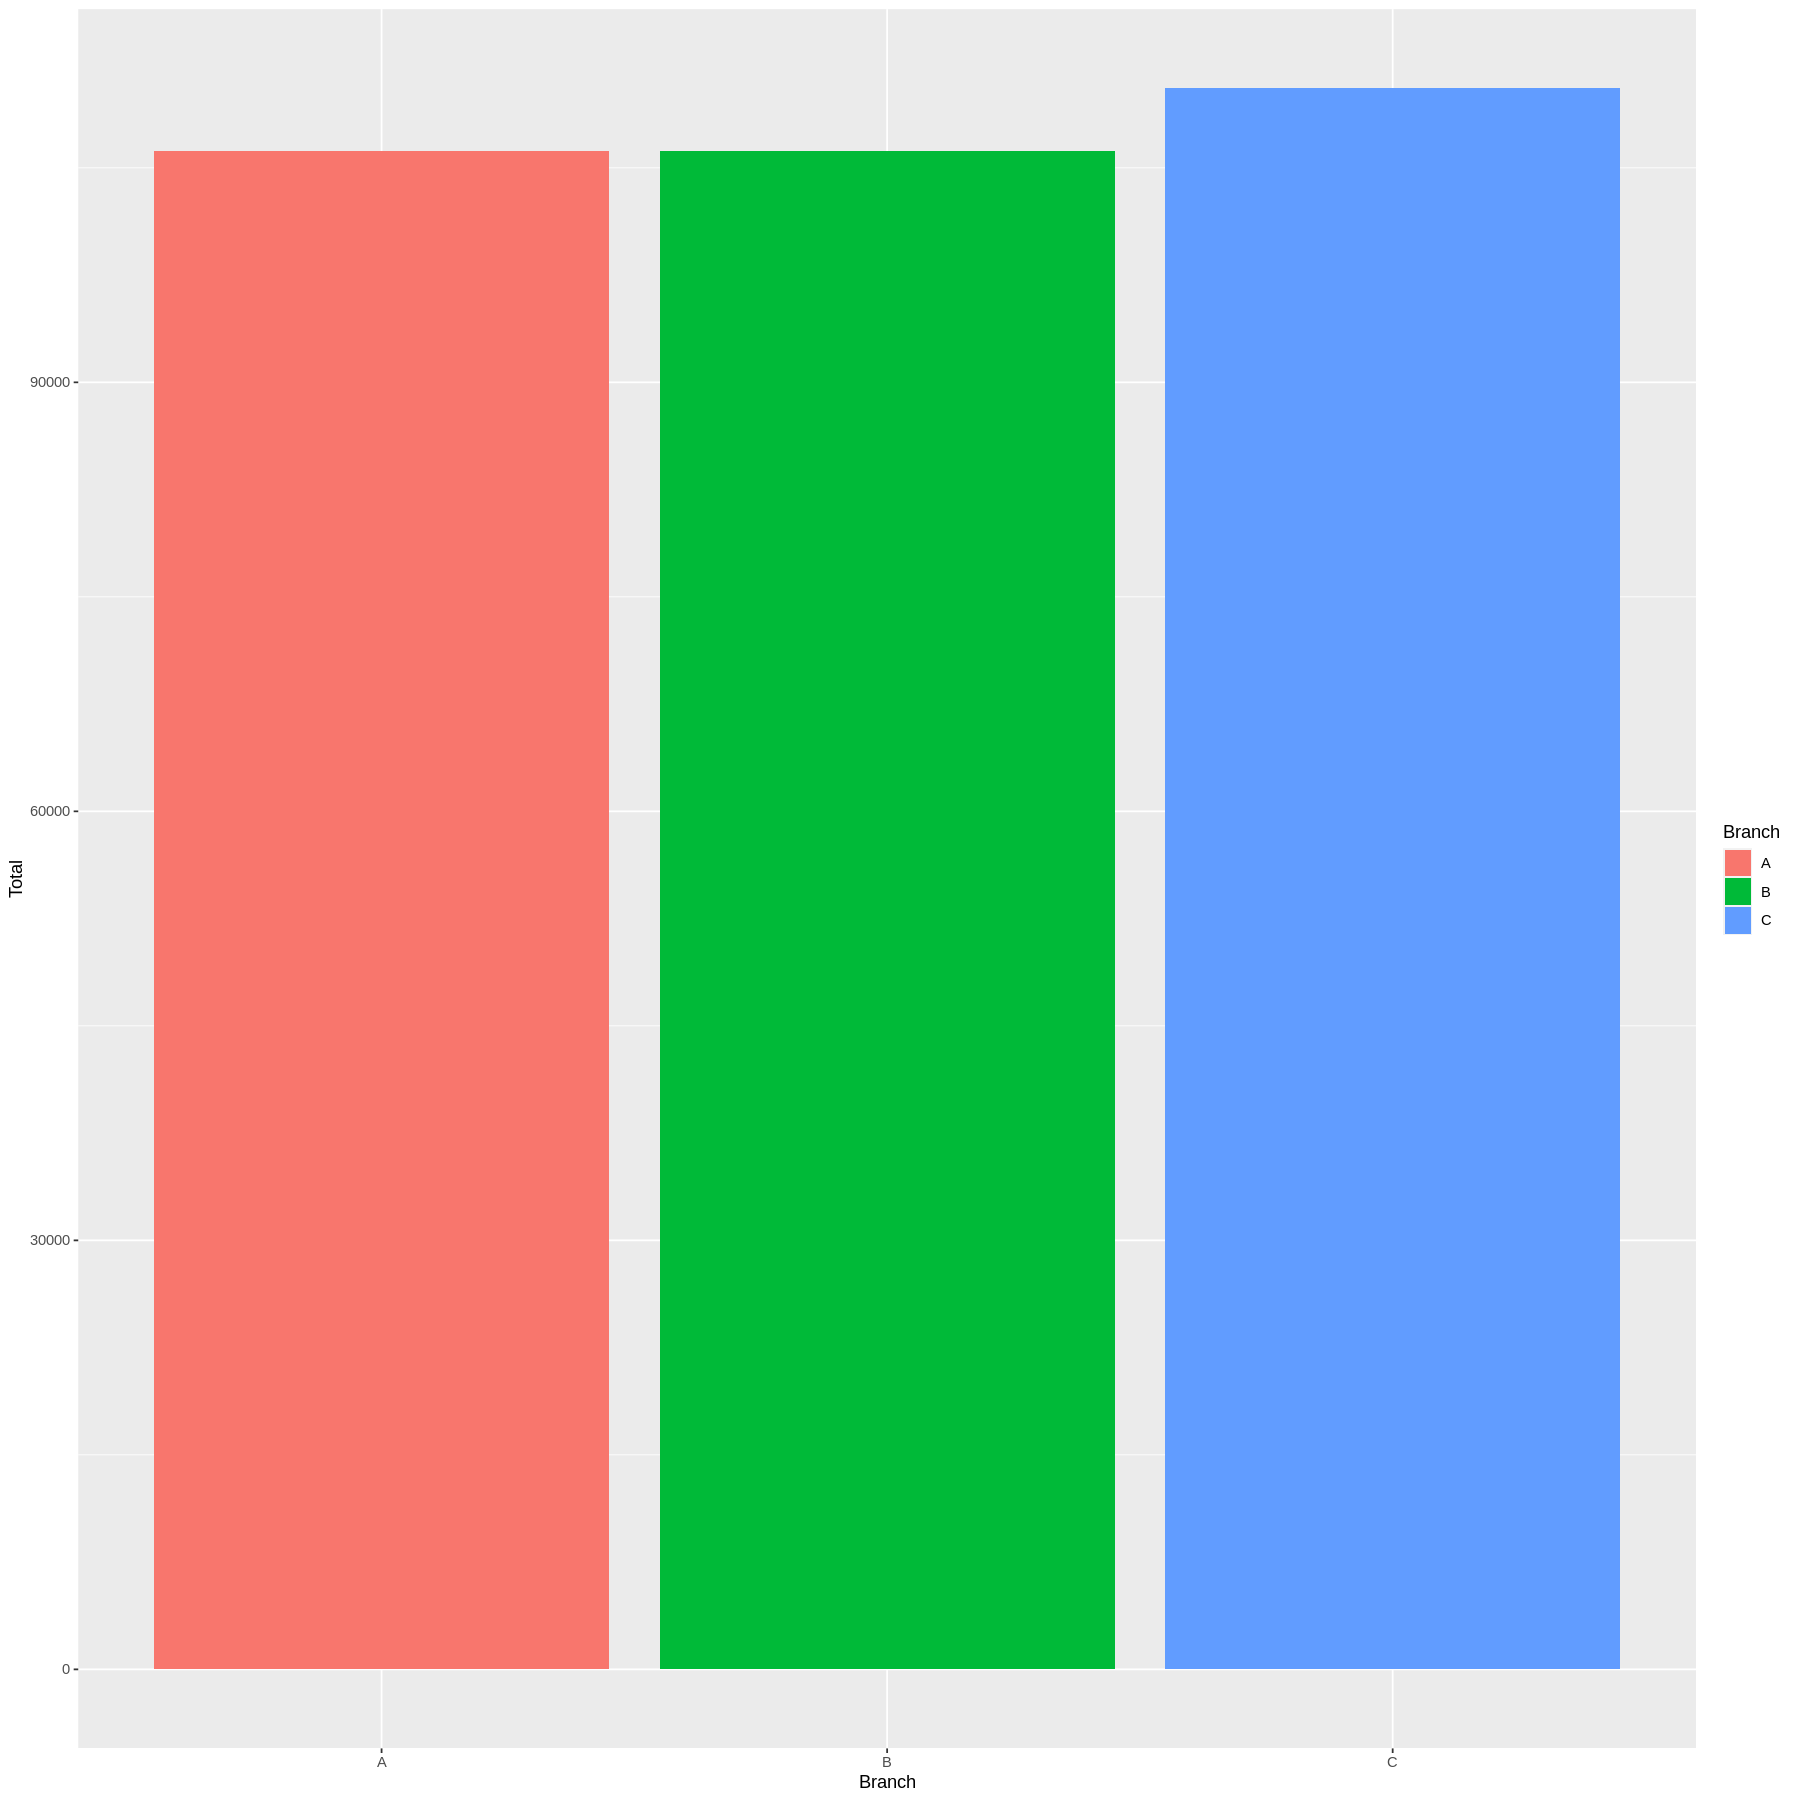

In [ ]:
# Comparing total amount by branch

ggplot(data = retail,aes(x = Branch, y = Total)) + geom_col(aes(fill = Branch))

- Branch C has more total amount compared to branch A and B.

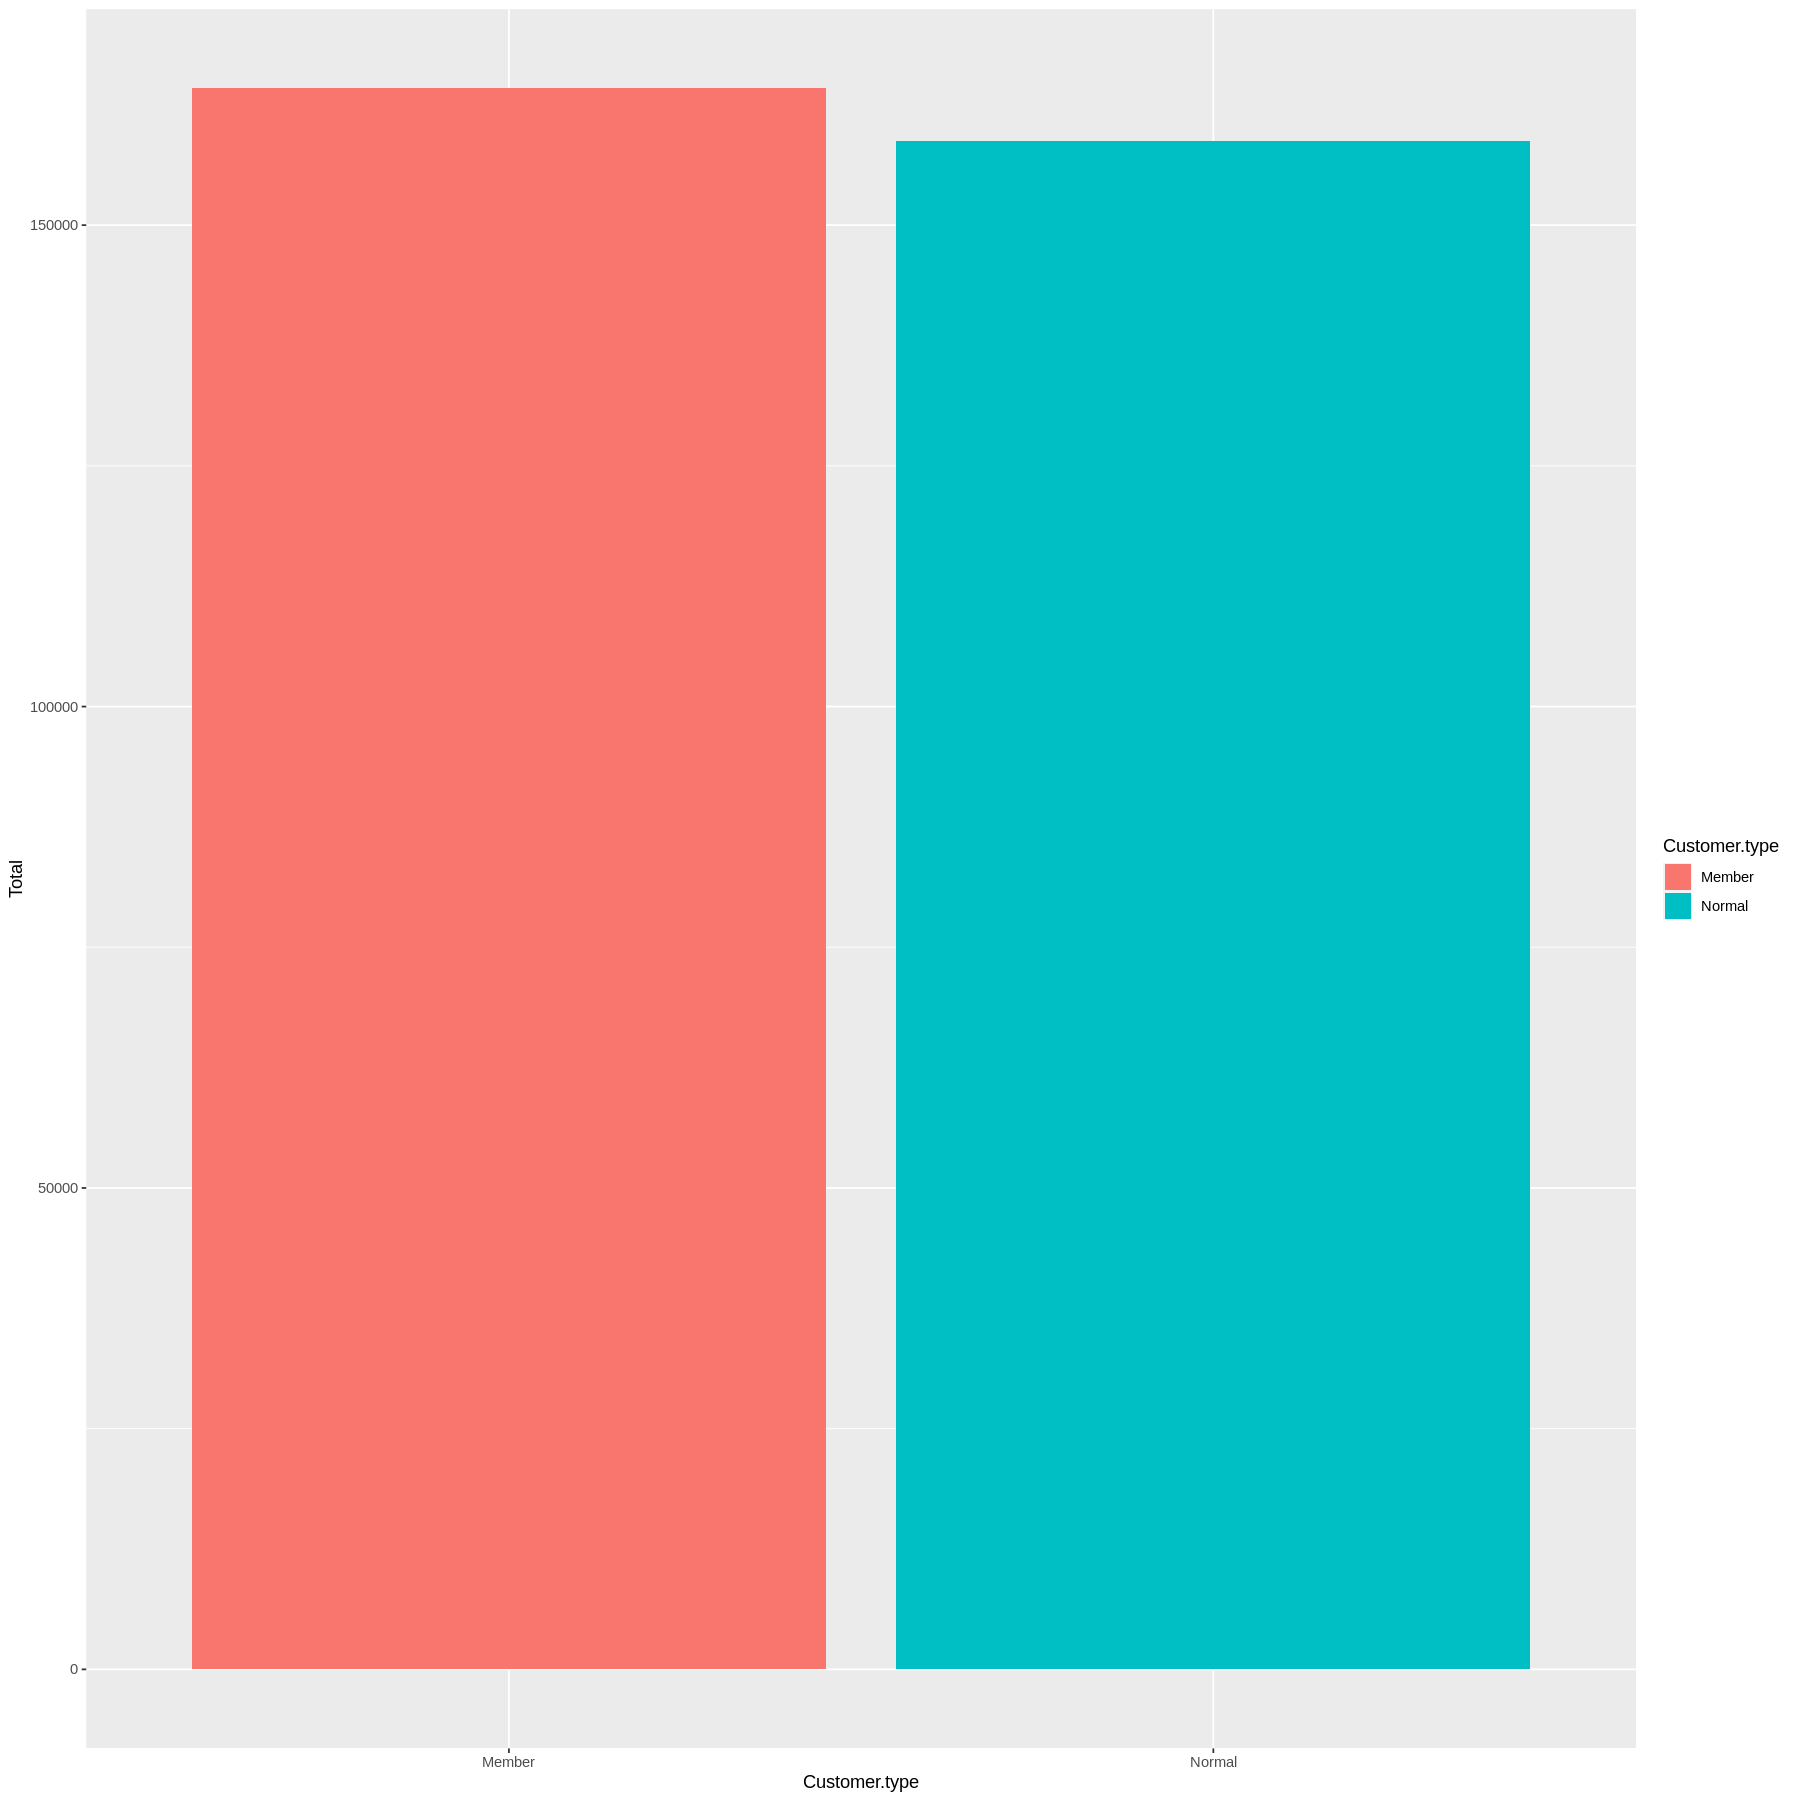

In [ ]:
# Comparing total amount by customer type

ggplot(data = retail,aes(x = Customer.type, y = Total)) + geom_col(aes(fill = Customer.type))

- Carrefour members bring in more revenue compared to non-members

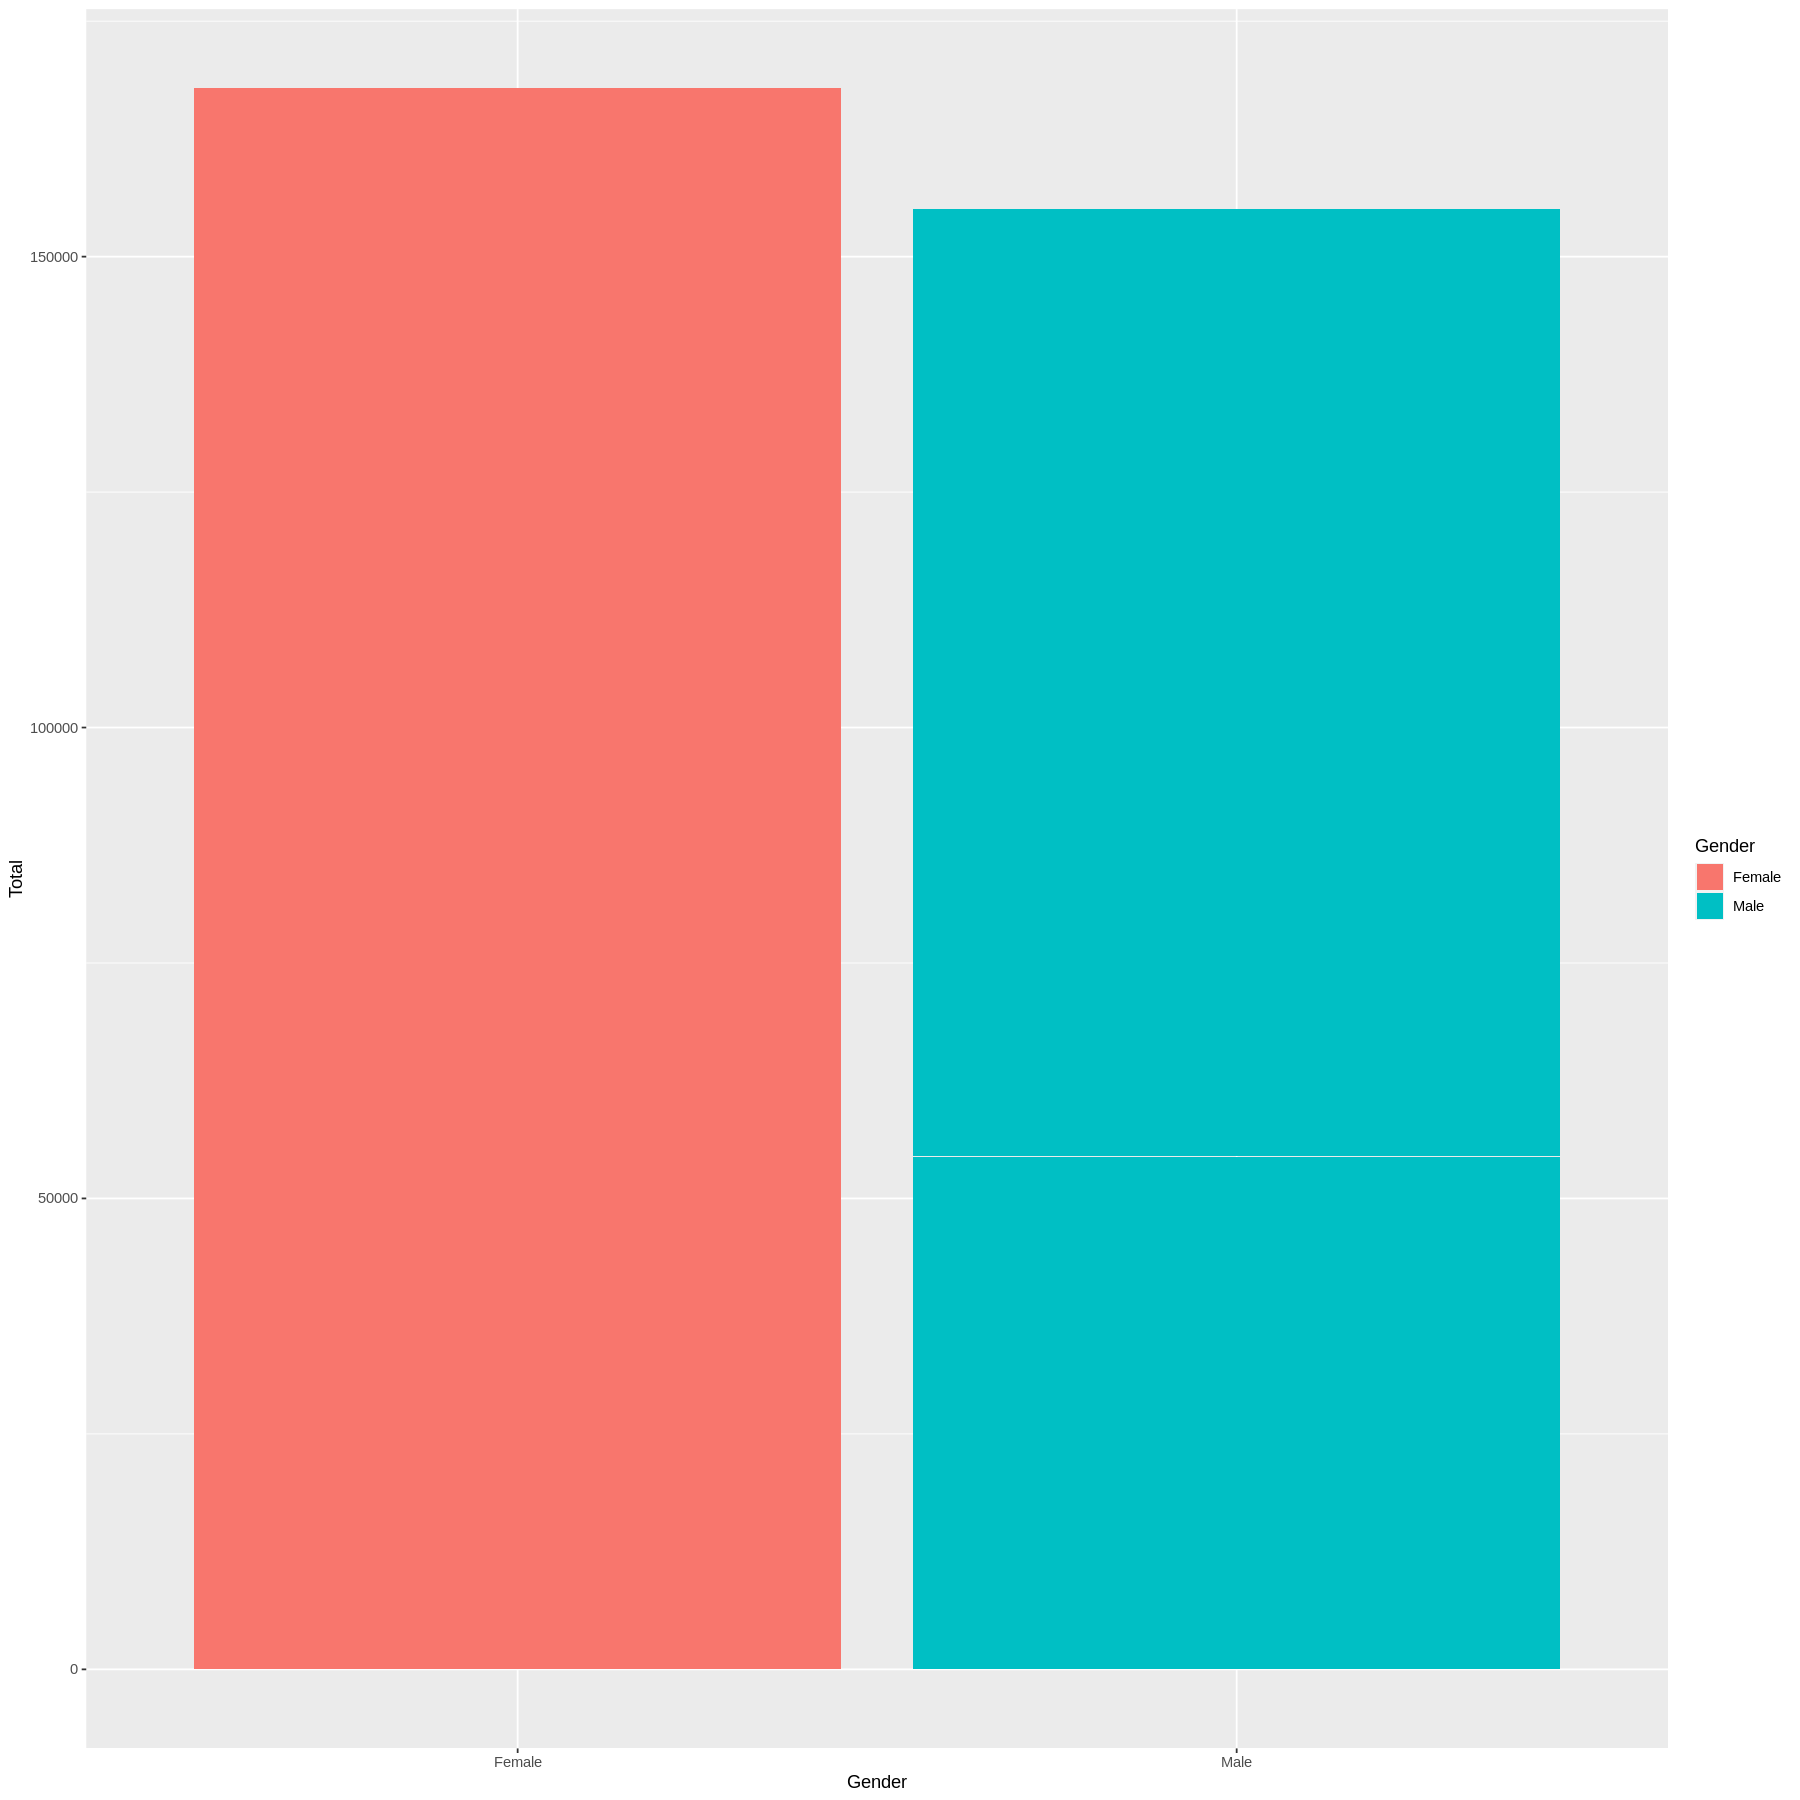

In [ ]:
# Comparing total amount by gender

ggplot(data = retail,aes(x = Gender, y = Total)) + geom_col(aes(fill = Gender))

- Females purchase a lot more compared to males.

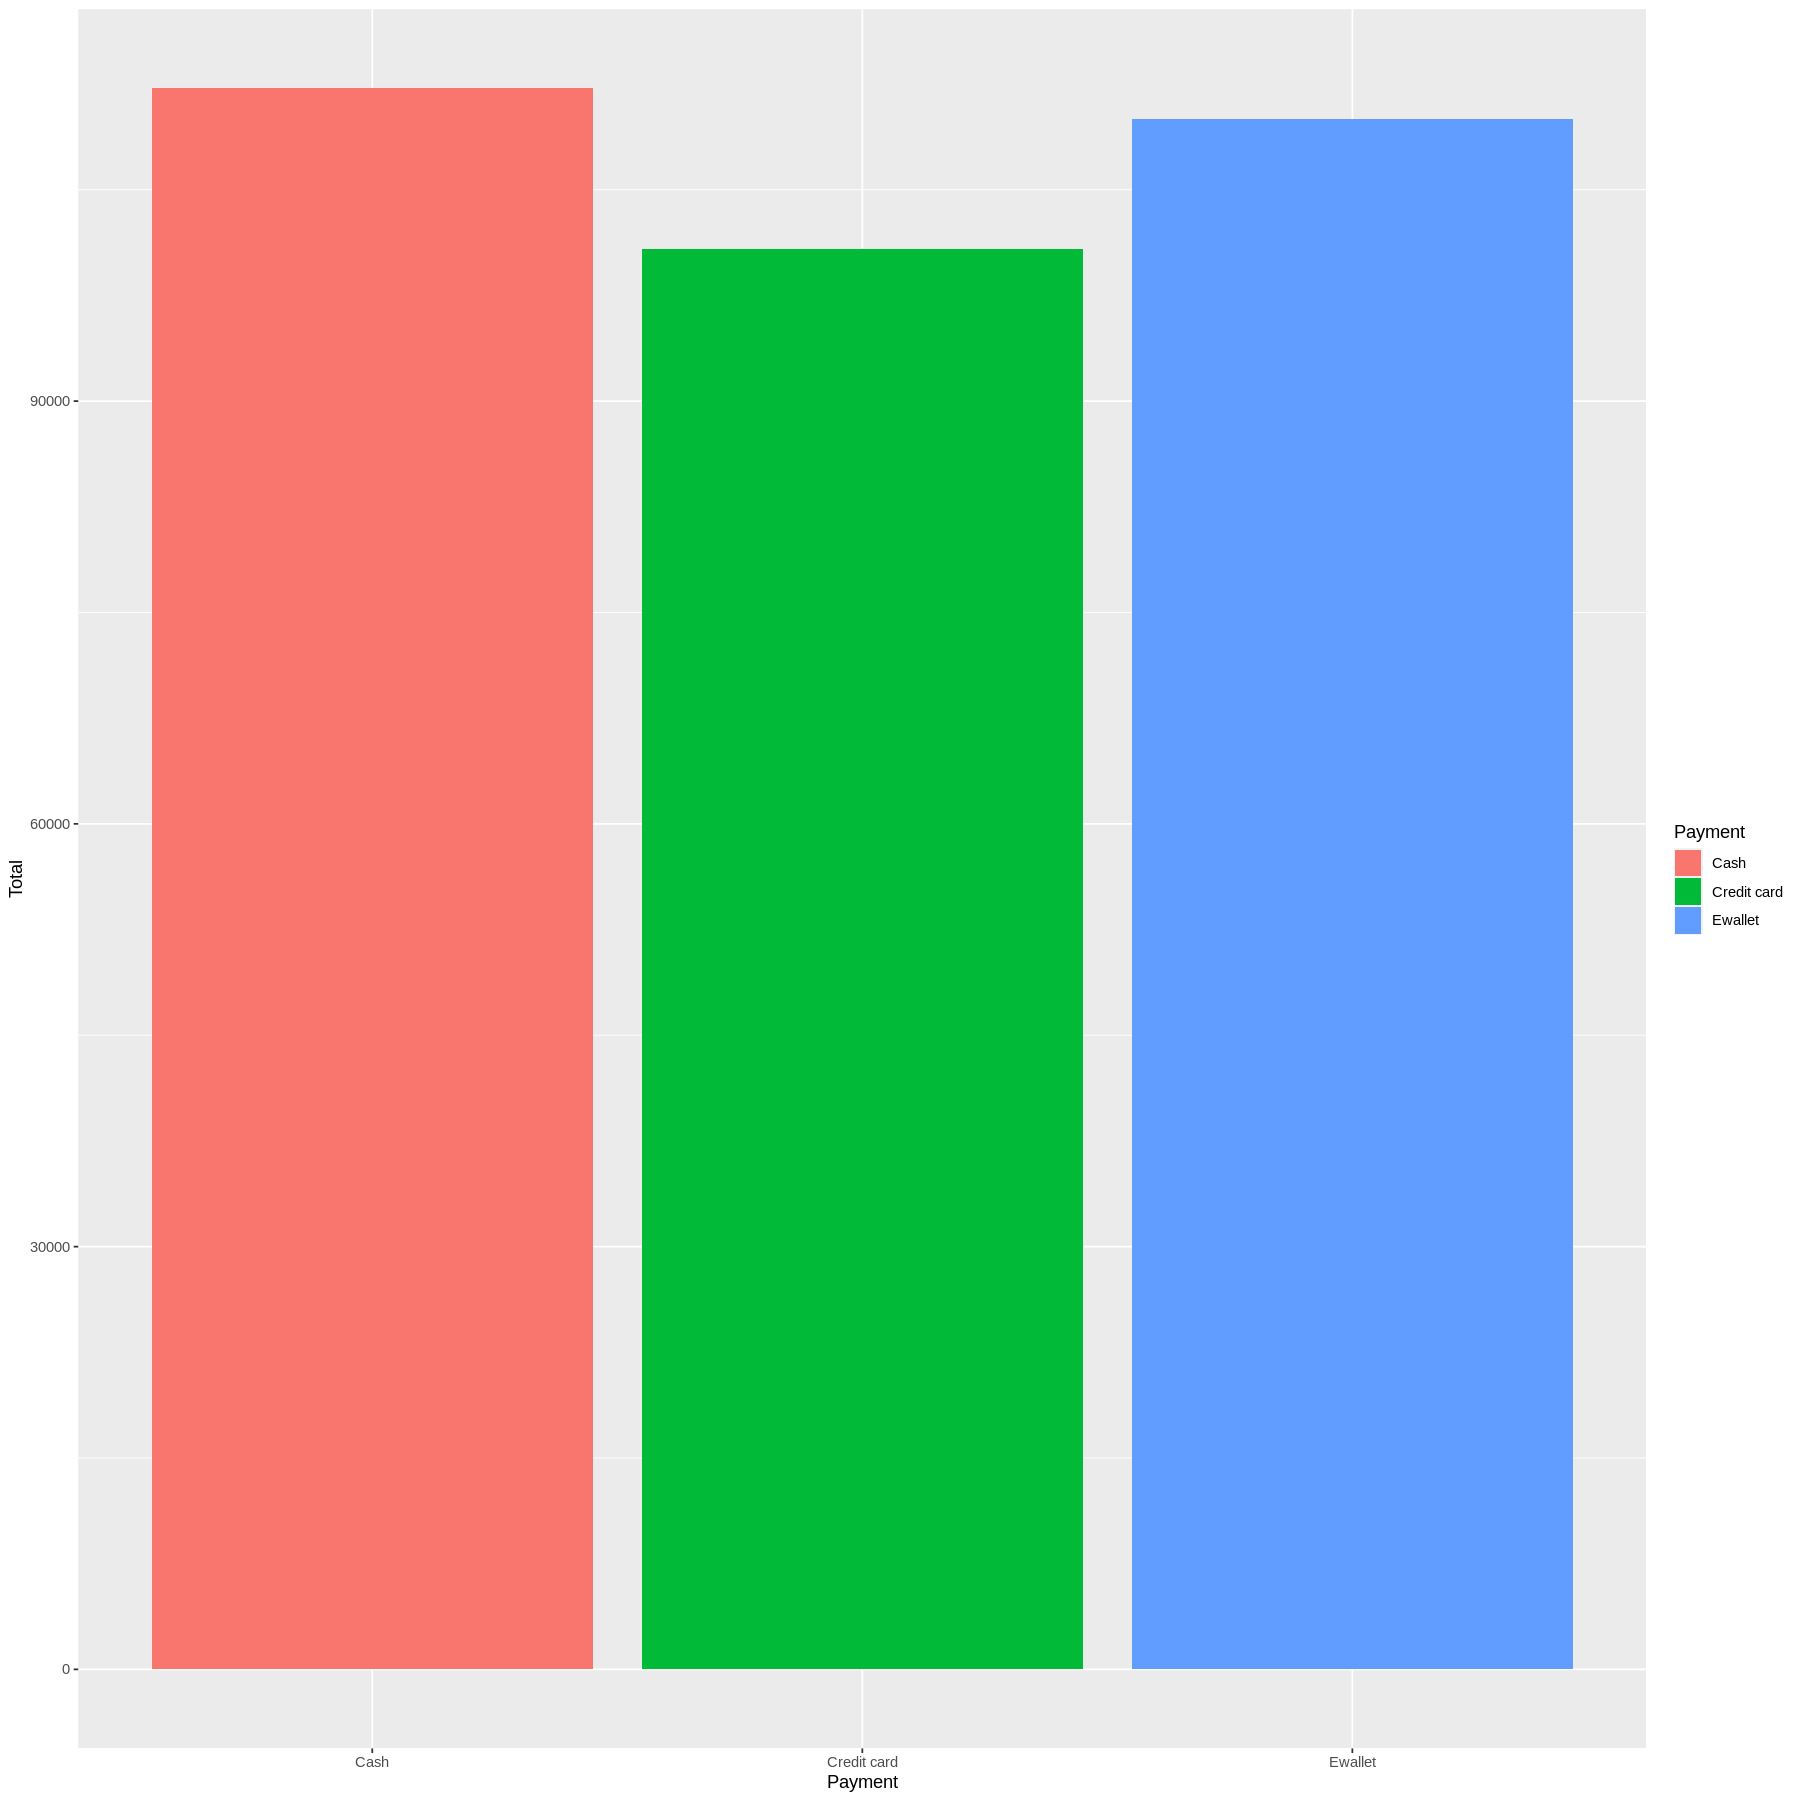

In [ ]:
# Comparing total amount by Payment type

ggplot(data = retail,aes(x = Payment, y = Total)) + geom_col(aes(fill = Payment))

# Implementing the Solution

## Feature Engineering

In [ ]:
# Converting categorical attributes to numeric data type

retail$Customer.type <- as.integer(as.factor(retail$Customer.type))
retail$Gender <- as.integer(as.factor(retail$Gender))
retail$Product.line <- as.integer(as.factor(retail$Product.line))
retail$Branch <- as.integer(as.factor(retail$Branch))
retail$Payment <- as.integer(as.factor(retail$Payment))

In [ ]:
# Converting the date column to date type

retail$Date <- as.Date(retail$Date, "%m/%d/%Y")

In [ ]:
# Separating the Date column into Year, Month and Day

retail <- separate(retail, "Date", c("Year", "Month", "Day"), sep = "-")

In [ ]:
# Separating the Date column into Year, Month and Day

retail <- separate(retail, "Time", c("Hour", "Minutes"), sep = ":")

In [ ]:
# Dropping unnecessary columns

reduced_retail <- select(retail, -c(1, 9, 16, 17))

In [ ]:
# Checking the data types of the data

str(reduced_retail)

'data.frame':	1000 obs. of  15 variables:
 $ Branch       : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Month        : chr  "01" "03" "03" "01" ...
 $ Day          : chr  "05" "08" "03" "27" ...
 $ Hour         : chr  "13" "10" "13" "20" ...
 $ Minutes      : chr  "08" "29" "23" "33" ...
 $ Payment      : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


In [ ]:
# Converting remaining categorical attributes to numeric type

reduced_retail$Month <- as.integer(as.factor(reduced_retail$Month))
reduced_retail$Day <- as.integer(as.factor(reduced_retail$Day))
reduced_retail$Hour <- as.integer(as.factor(reduced_retail$Hour))
reduced_retail$Minutes <- as.integer(as.factor(reduced_retail$Minutes))


In [ ]:
# Confirming data types

str(reduced_retail)

'data.frame':	1000 obs. of  15 variables:
 $ Branch       : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Month        : int  1 3 3 1 2 3 2 2 1 2 ...
 $ Day          : int  5 8 3 27 8 25 25 24 10 20 ...
 $ Hour         : int  4 1 4 11 1 9 5 2 8 4 ...
 $ Minutes      : int  9 30 24 34 38 31 37 39 16 28 ...
 $ Payment      : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


## Dimensionality Reduction

### PCA

In [ ]:
# Normalizing all the features

normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))}

reduced_retail$Branch <- normalize(reduced_retail$Branch)
reduced_retail$Customer.type <- normalize(reduced_retail$Customer.type)
reduced_retail$Gender <- normalize(reduced_retail$Gender)
reduced_retail$Product.line <- normalize(reduced_retail$Product.line)
reduced_retail$Unit.price <- normalize(reduced_retail$Unit.price)
reduced_retail$Quantity <- normalize(reduced_retail$Quantity)
reduced_retail$Tax <- normalize(reduced_retail$Tax)
reduced_retail$Month <- normalize(reduced_retail$Month)
reduced_retail$Day <- normalize(reduced_retail$Day)
reduced_retail$Hour <- normalize(reduced_retail$Hour)
reduced_retail$Minutes <- normalize(reduced_retail$Minutes)
reduced_retail$Payment <- normalize(reduced_retail$Payment)
reduced_retail$cogs <- normalize(reduced_retail$cogs)
reduced_retail$Rating <- normalize(reduced_retail$Rating)

In [ ]:
# Applying PCA  to dataset

retail.pca <- prcomp(reduced_retail, center = TRUE, scale. = TRUE)
summary(retail.pca)

Importance of components:
                          PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9840 1.08727 1.08280 1.0500 1.02118 1.01756 0.99086
Proportion of Variance 0.2624 0.07881 0.07816 0.0735 0.06952 0.06903 0.06545
Cumulative Proportion  0.2624 0.34124 0.41940 0.4929 0.56242 0.63145 0.69691
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.97568 0.96411 0.95863 0.92024 0.90270 0.29031
Proportion of Variance 0.06346 0.06197 0.06126 0.05646 0.05432 0.00562
Cumulative Proportion  0.76037 0.82234 0.88360 0.94006 0.99438 1.00000
                            PC14      PC15
Standard deviation     2.098e-16 1.595e-16
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

- From the summary above, we see that 88% of the variance in the data is explained by the first 10 principal components. Adding principal components 11 and 12 expplains 99% of the variance in the dataset.

In [ ]:
# Previewing characteristics of the pca object

str(retail.pca)

List of 5
 $ sdev    : num [1:15] 1.98 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:15, 1:15] 0.0266 -0.0155 -0.034 0.0207 0.3272 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:15] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:15] 0.494 0.499 0.499 0.49 0.507 ...
  ..- attr(*, "names")= chr [1:15] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:15] 0.409 0.5 0.5 0.343 0.295 ...
  ..- attr(*, "names")= chr [1:15] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:15] 1.8347 -2.0641 0.0989 1.2976 2.4281 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


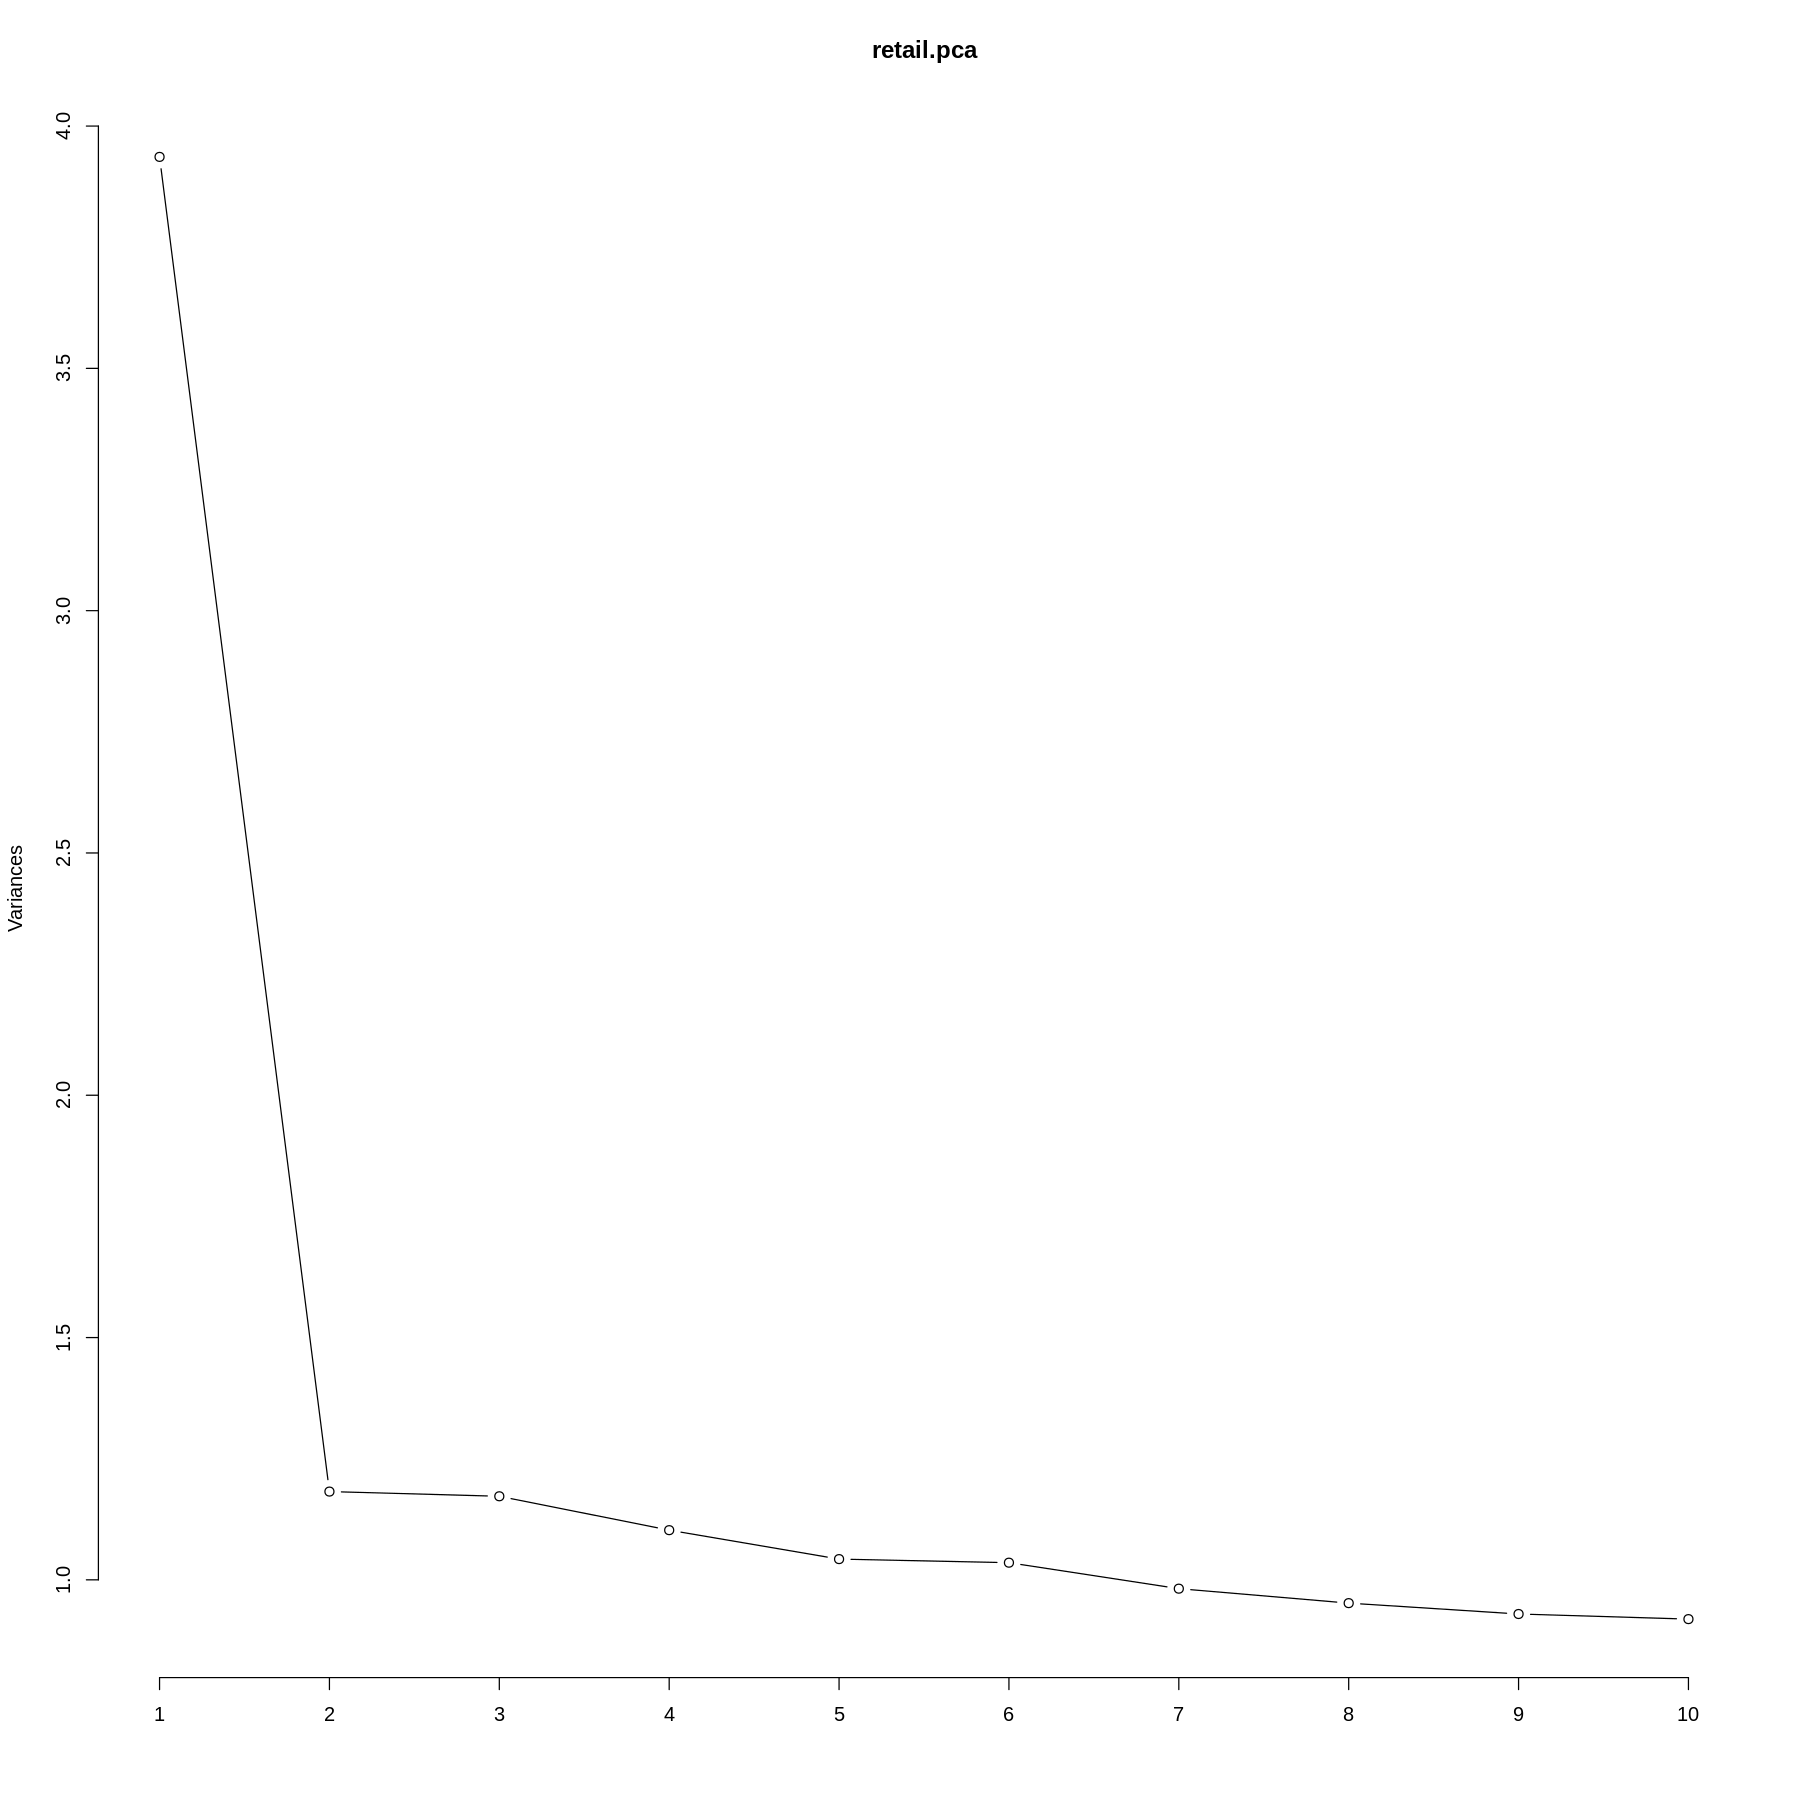

In [ ]:
# plotting the pca

install.packages("devtools",dependencies=TRUE)
library(devtools) 
install_github("vqv/ggbiplot") 
library(ggbiplot)

plot(retail.pca, type="l")

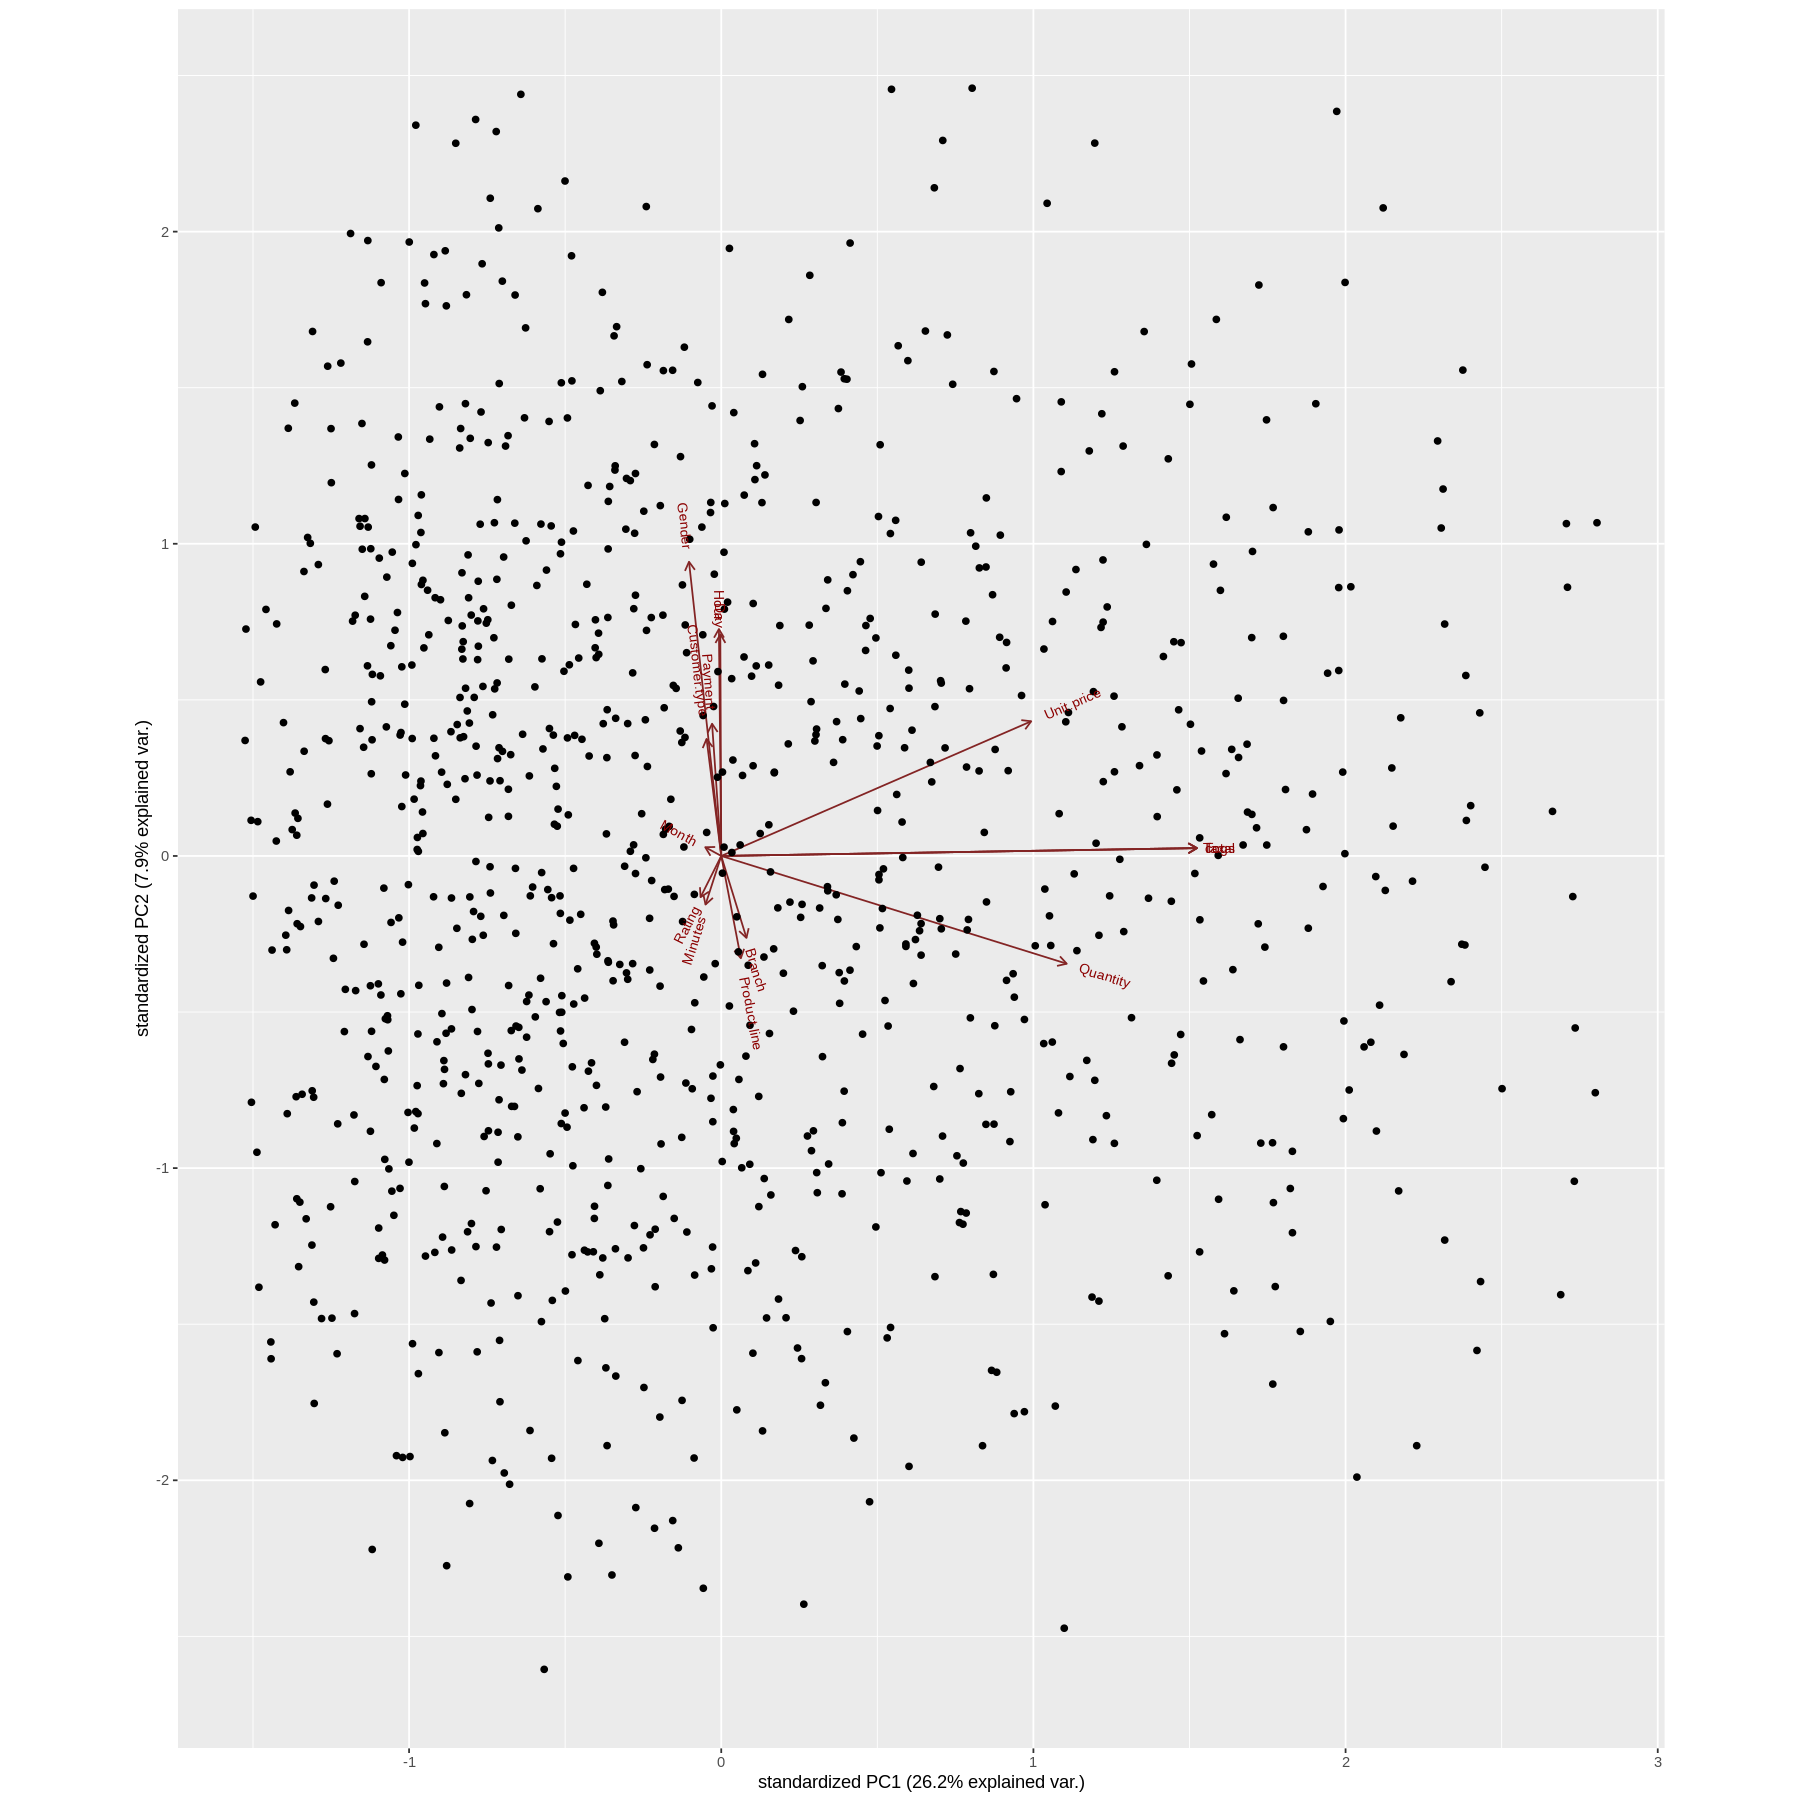

In [ ]:
# Checking the features that contribute most to PC1

ggbiplot(retail.pca)

- From the above analysis, the first 12 principal components explain 99% of the variance in the data, with PC1 explaining the most variance (26.2%). As such the remaining 3 principal components can be dropped.

- However, PCA does not seem to be suitable enough for this data since the first 2 or 3 principal components do not  convey most of the information of the data (first 4 principal components account for only 50% of the variance in the data). Other dimensionality reduction techniques such as t-SNE can be investigated for this dataset.

## Feature Selection

### Filter Method

In [ ]:
# Installing and loading caret package

suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# Calculating the correlation matrix for all numeric attributes

all_features <- reduced_retail[c(5:15)]
correlationMatrix <- cor(all_features)

In [ ]:
# Finding all attributes that are highly correlated

highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated
names(all_features[highlyCorrelated])

[1] 3 9

[1] "Tax"  "cogs"

- The attributes Tax and cogs are highly correlated.

In [ ]:
# Removing highly correlated features 

final_features <- all_features[-highlyCorrelated]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



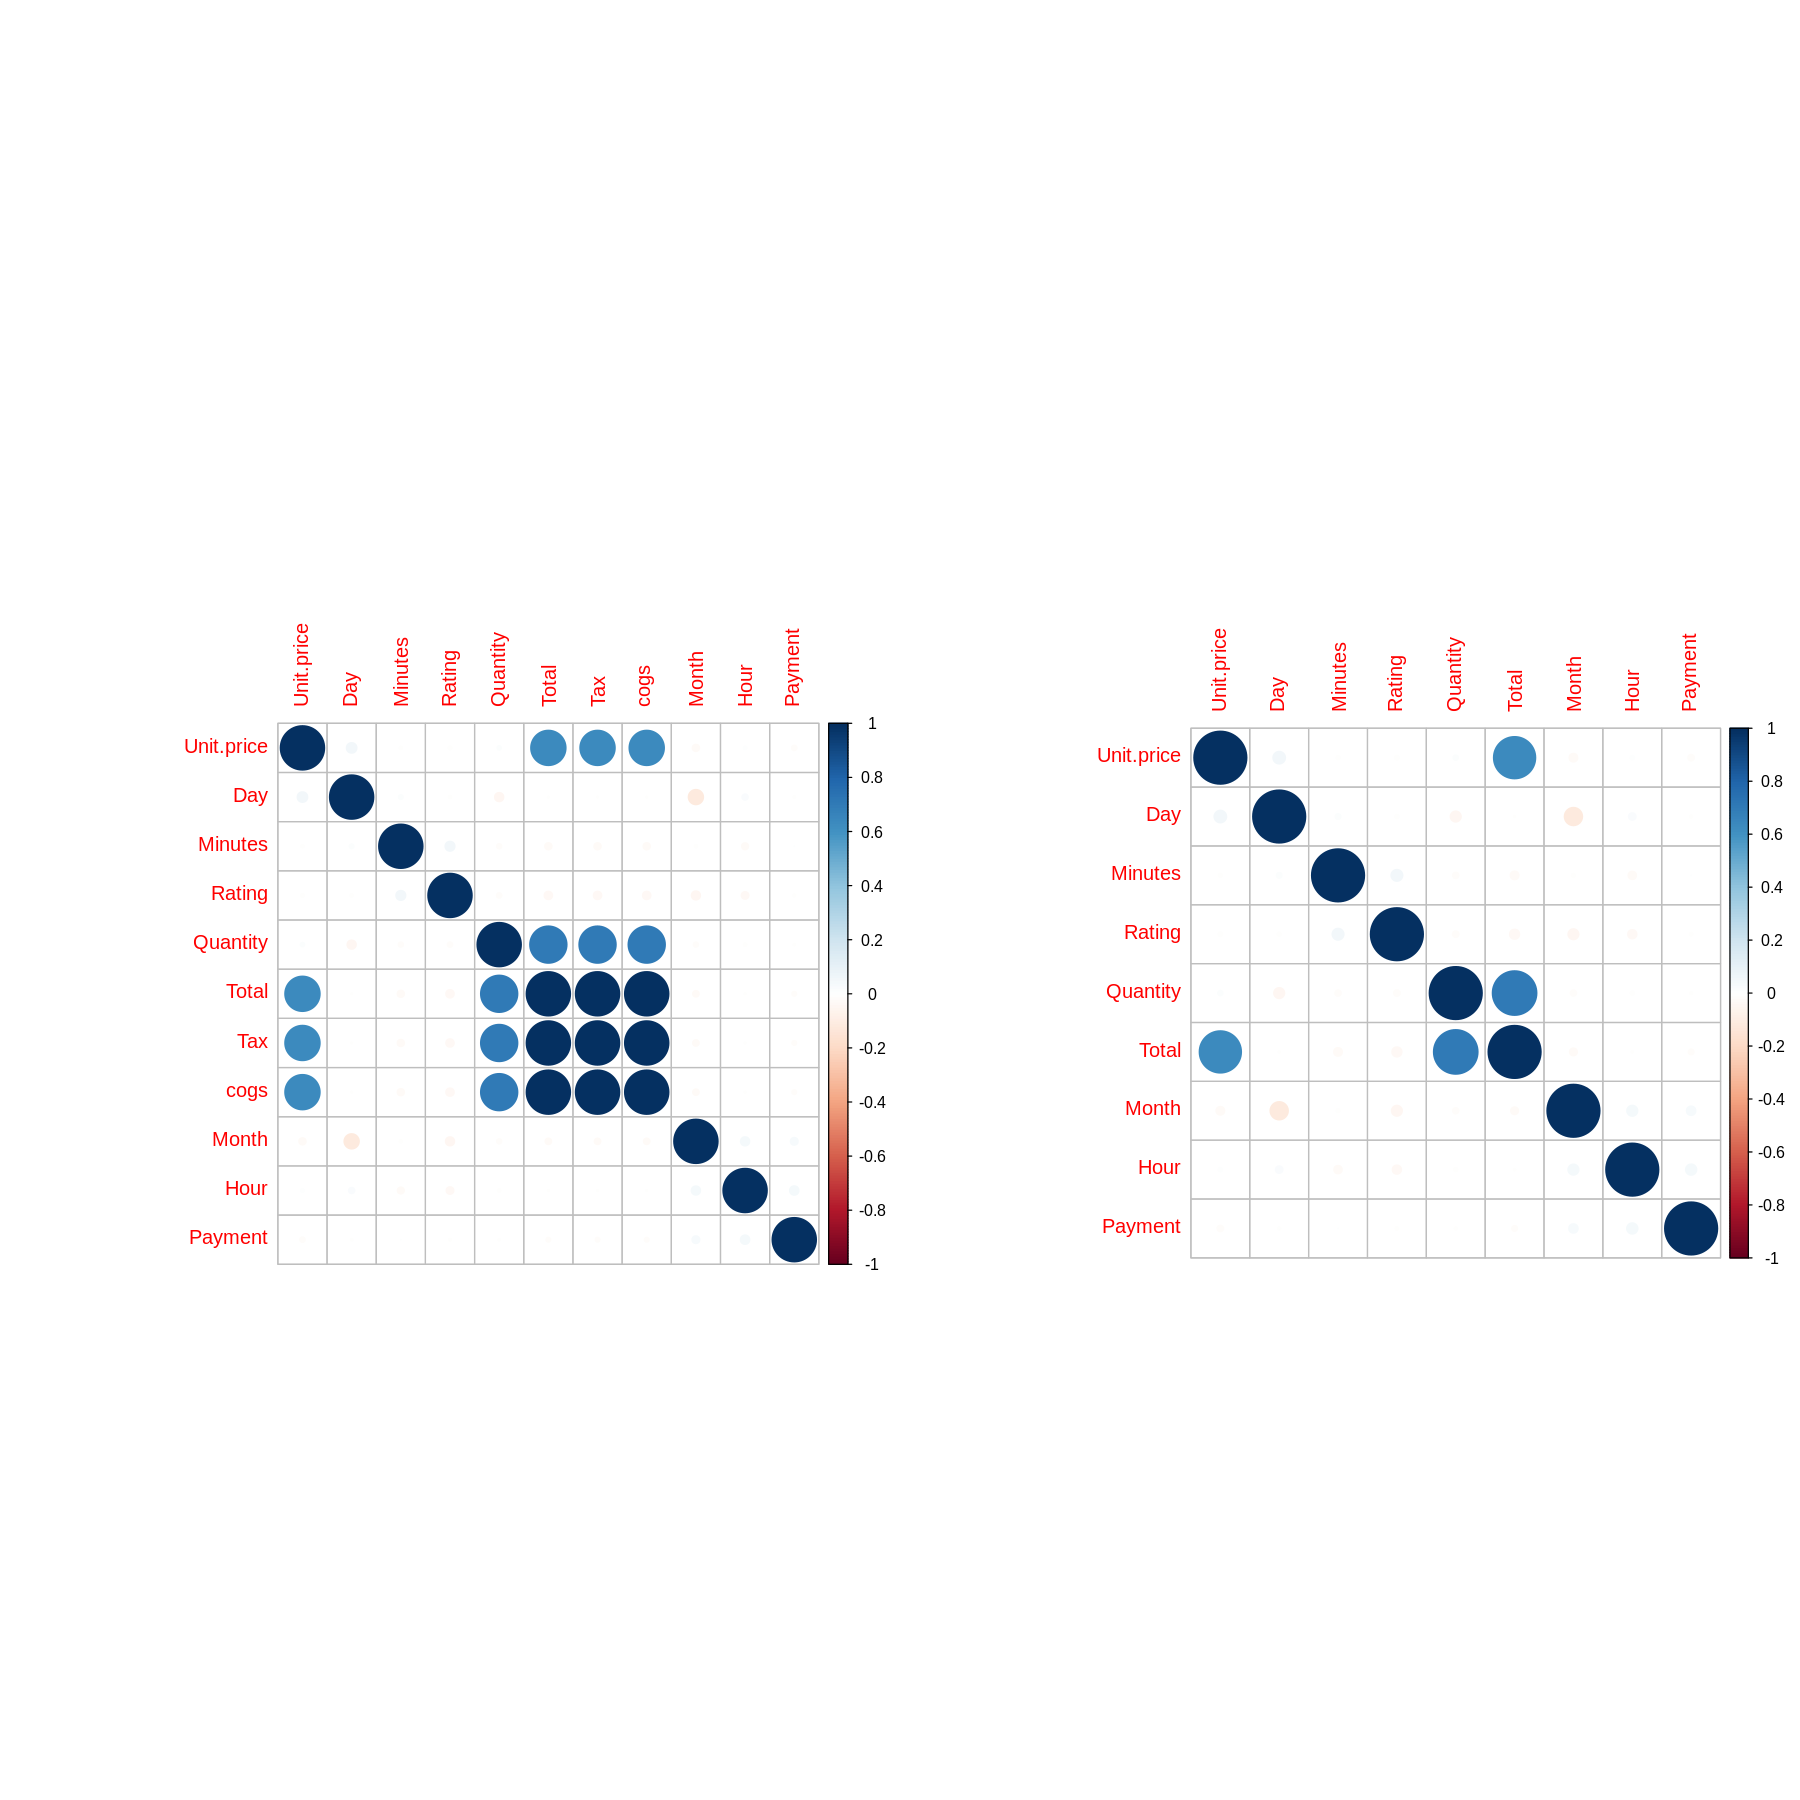

In [ ]:
# Graphical comparison

install.packages("corrplot")
library(corrplot)

par(mfrow = c(1, 2))

corrplot(correlationMatrix, order = "hclust")
corrplot(cor(final_features), order = "hclust")

- The selected features that contribute most of the information in the dataset are Unit Price, Day, Minutes, Rating, Quantity, Total, Month, Hour and Payment.

## Association Rules

In [ ]:
# Loading the association rules dataset

install.packages("arules")
library(arules)

path <-"http://bit.ly/SupermarketDatasetII"
retail2 <-read.transactions(path, sep = ",")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [ ]:
# Previewing the dataset

retail2

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [ ]:
# Checking the data types

str(retail2)
class(retail2)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:29358] 0 1 3 32 38 47 52 53 59 64 ...
  .. .. ..@ p       : int [1:7502] 0 20 23 24 26 31 32 34 37 40 ...
  .. .. ..@ Dim     : int [1:2] 119 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	119 obs. of  1 variable:
  .. ..$ labels: chr [1:119] "almonds" "antioxydant juice" "asparagus" "avocado" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
# Previewing first 3 records

inspect(retail2[1:3])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          


In [ ]:
# Checking a summary of the data

summary(retail2)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [ ]:
# Previewing the items that make up our dataset

items <-as.data.frame(itemLabels(retail2))
colnames(items) <- "Item"
head(items, 15)    


,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [ ]:
# Exploring the frequency of transactions ranging from 1 to 10

itemFrequency(retail2[, 1:10],type = "absolute")

almonds antioxydant juice         asparagus           avocado 
              153                67                36               250 
      babies food             bacon    barbecue sauce         black tea 
               34                65                81               107 
      blueberries        body spray 
               69                86

In [ ]:
# Checking frequency of transactions as a percentage of the total transactions 

round(itemFrequency(retail2[, 1:10],type = "relative")*100,2)

almonds antioxydant juice         asparagus           avocado 
             2.04              0.89              0.48              3.33 
      babies food             bacon    barbecue sauce         black tea 
             0.45              0.87              1.08              1.43 
      blueberries        body spray 
             0.92              1.15

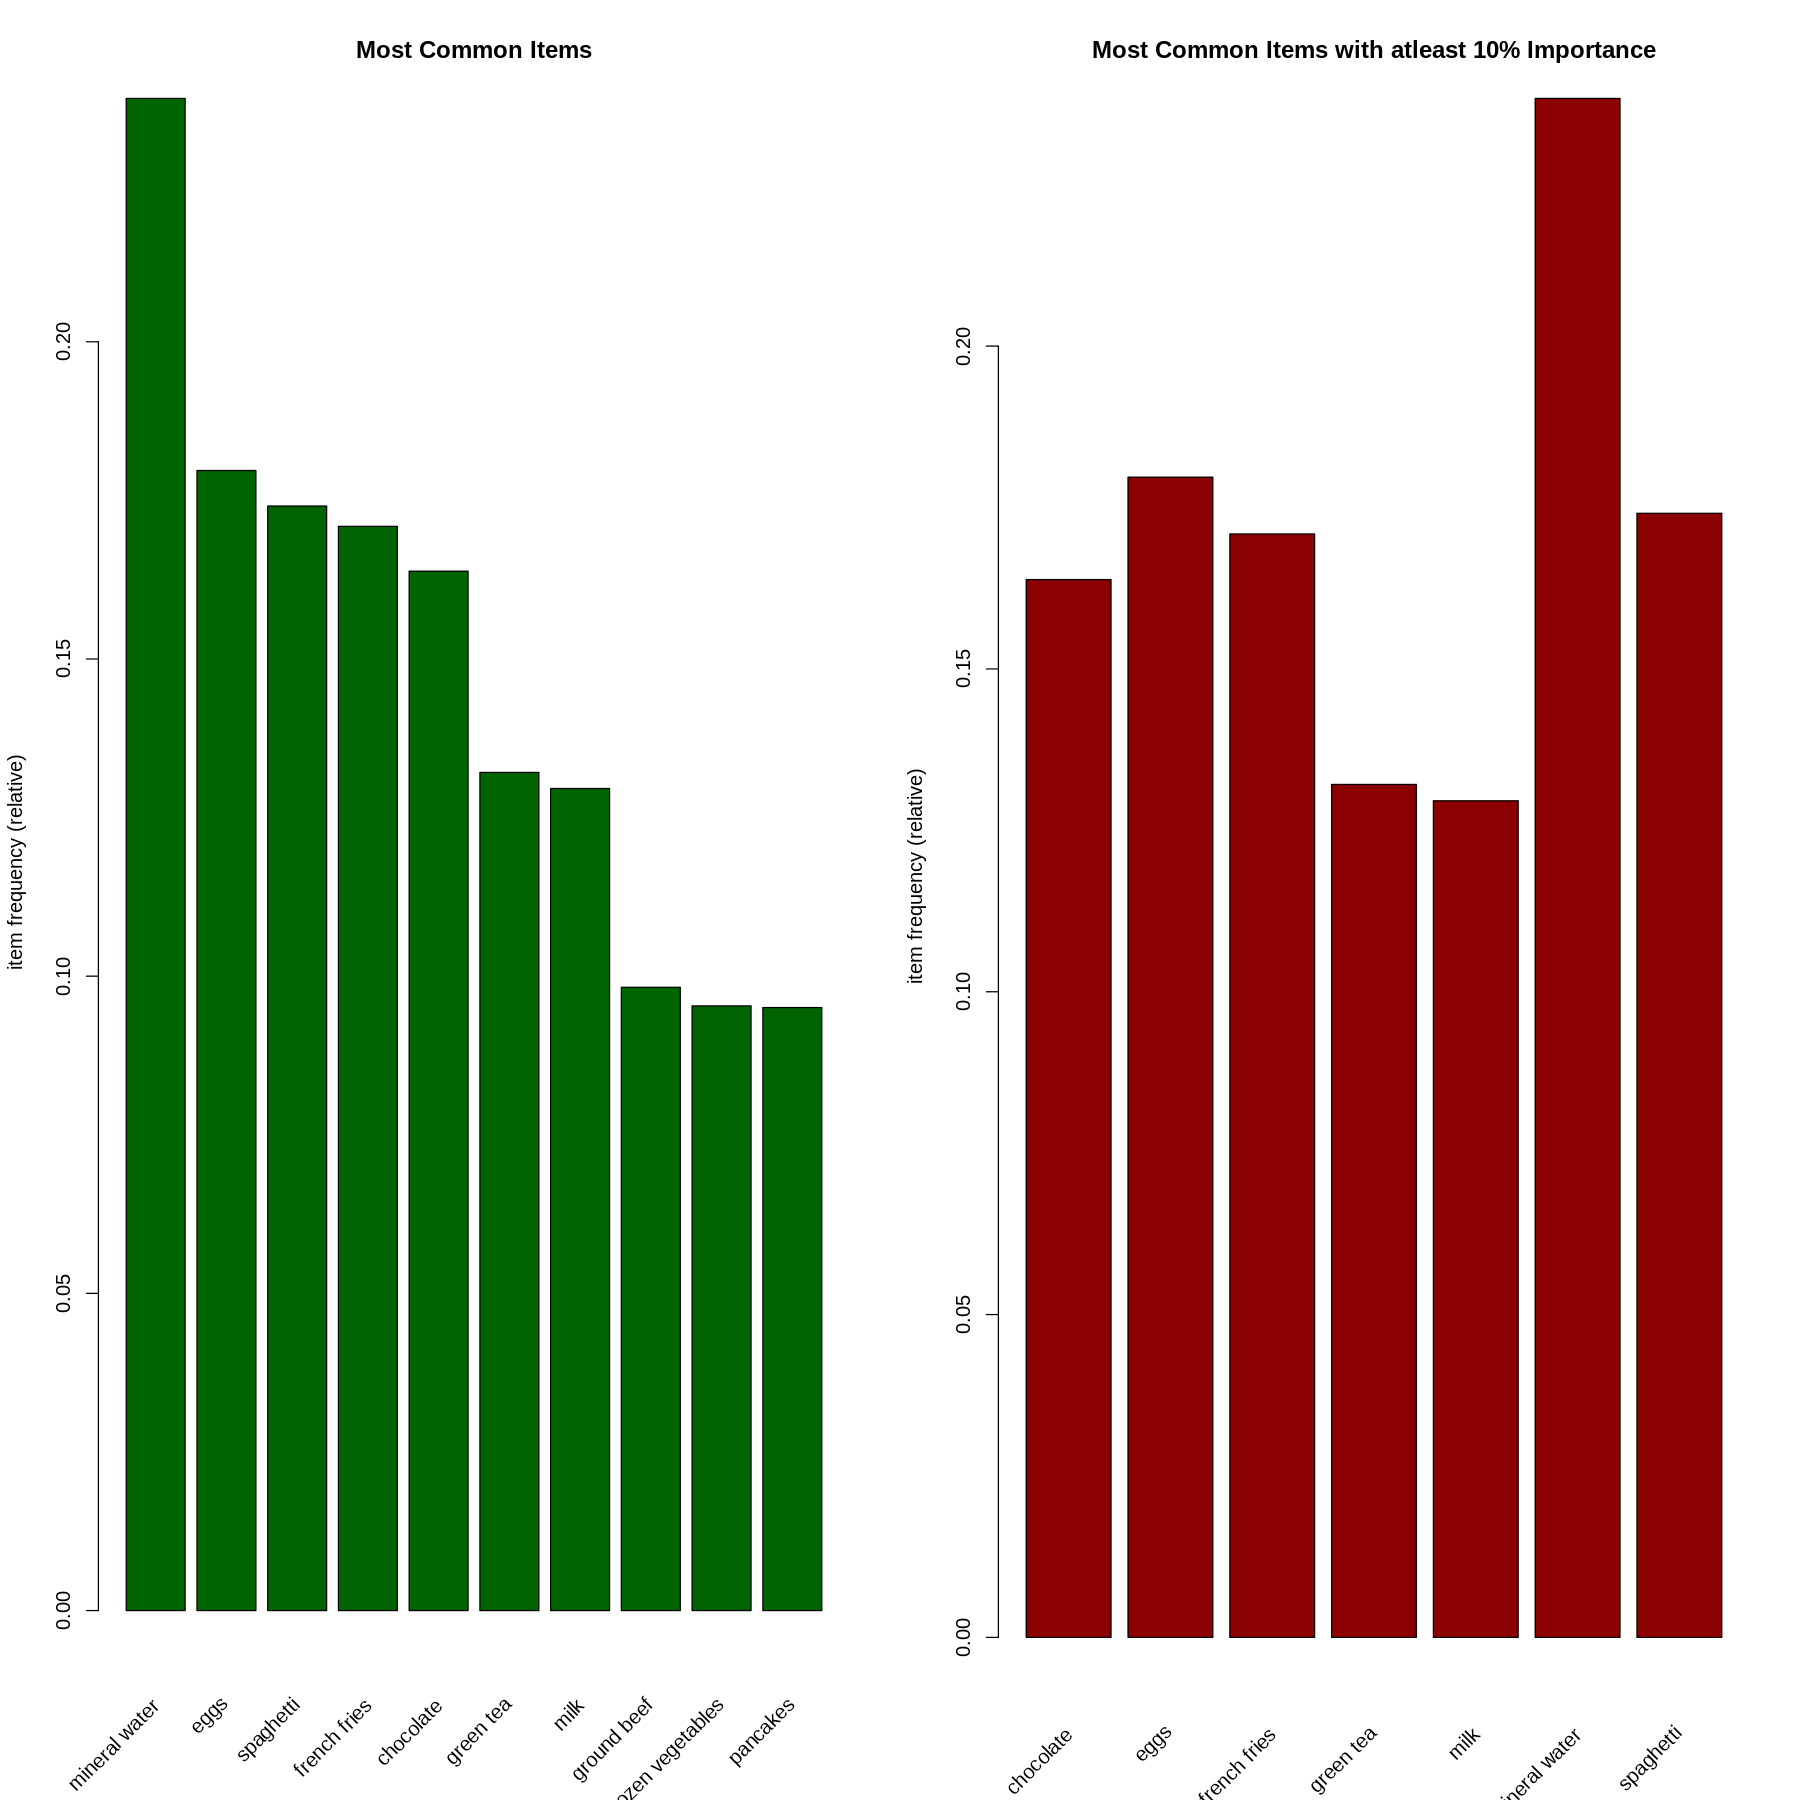

In [ ]:
# Plotting top 10 most common items & items whose relative importance is at least 10%

par(mfrow = c(1, 2))

itemFrequencyPlot(retail2, topN = 10,col="darkgreen", main = 'Most Common Items')
itemFrequencyPlot(retail2, support = 0.1,col="darkred", main = 'Most Common Items with atleast 10% Importance')

Developing a Model Based on Association Rules

In [ ]:
# Using the apriori function with Min Support as 0.001 and confidence as 0.8

rules <- apriori (retail2, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [ ]:
# Exploring the model 

summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
    data ntransactions support confidence
 retail2          7501   0.001        0.8

In [ ]:
# Building an apriori model with Min Support as 0.002 and confidence as 0.8

rules2 <- apriori (retail2,parameter = list(supp = 0.002, conf = 0.8)) 
rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2 rules 

In [ ]:
# Exploring the model 

summary(rules2)

set of 2 rules

rule length distribution (lhs + rhs):sizes
3 4 
1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    3.25    3.50    3.50    3.75    4.00 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.002133   Min.   :0.8421   Min.   :0.002533   Min.   : 4.837  
 1st Qu.:0.002233   1st Qu.:0.8691   1st Qu.:0.002566   1st Qu.: 6.622  
 Median :0.002333   Median :0.8961   Median :0.002600   Median : 8.407  
 Mean   :0.002333   Mean   :0.8961   Mean   :0.002600   Mean   : 8.407  
 3rd Qu.:0.002433   3rd Qu.:0.9230   3rd Qu.:0.002633   3rd Qu.:10.191  
 Max.   :0.002533   Max.   :0.9500   Max.   :0.002666   Max.   :11.976  
     count      
 Min.   :16.00  
 1st Qu.:16.75  
 Median :17.50  
 Mean   :17.50  
 3rd Qu.:18.25  
 Max.   :19.00  

mining info:
    data ntransactions support confidence
 retail2          7501   0.002        0.8

In [ ]:
# Building apriori model with Min Support as 0.002 and confidence as 0.6

rules3 <- apriori (retail2, parameter = list(supp = 0.001, conf = 0.6))
rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 545 rules 

In [ ]:
# Exploring the model 

summary(rules3)

set of 545 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
146 329  67   3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   3.866   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.6000   Min.   :0.001067   Min.   : 2.517  
 1st Qu.:0.001067   1st Qu.:0.6250   1st Qu.:0.001600   1st Qu.: 2.797  
 Median :0.001200   Median :0.6667   Median :0.001866   Median : 3.446  
 Mean   :0.001409   Mean   :0.6893   Mean   :0.002081   Mean   : 3.889  
 3rd Qu.:0.001466   3rd Qu.:0.7273   3rd Qu.:0.002266   3rd Qu.: 4.177  
 Max.   :0.005066   Max.   :1.0000   Max.   :0.007999   Max.   :34.970  
     count      
 Min.   : 8.00  
 1st Qu.: 8.00  
 Median : 9.00  
 Mean   :10.57  
 3rd Qu.:11.00  
 Max.   :38.00  

mining info:
    data ntransactions support confidence
 retail2          7501   0.001        0.6

In [ ]:
# Observing rules built in our first model i.e. first 10 model rules

inspect(rules[1:10])

     lhs                             rhs             support     confidence
[1]  {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3]  {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4]  {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5]  {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
[6]  {milk,pasta}                 => {shrimp}        0.001599787 0.8571429 
[7]  {cooking oil,fromage blanc}  => {mineral water} 0.001199840 0.8181818 
[8]  {black tea,salmon}           => {mineral water} 0.001066524 0.8000000 
[9]  {black tea,frozen smoothie}  => {milk}          0.001199840 0.8181818 
[10] {red wine,tomato sauce}      => {chocolate}     0.001066524 0.8000000 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  4.666587 13   
[3]  0.001466471  3.432428  9   
[4]  0.001866418  3.595877 12   

- For the first rule, if someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too

In [ ]:
# Observing rules built in our third model i.e. first 10 model rules

inspect(rules3[1:10])

     lhs                          rhs              support     confidence
[1]  {cookies,shallot}         => {low fat yogurt} 0.001199840 0.6000000 
[2]  {low fat yogurt,shallot}  => {cookies}        0.001199840 0.6923077 
[3]  {cookies,shallot}         => {green tea}      0.001199840 0.6000000 
[4]  {cookies,shallot}         => {french fries}   0.001199840 0.6000000 
[5]  {low fat yogurt,shallot}  => {french fries}   0.001066524 0.6153846 
[6]  {burger sauce,chicken}    => {mineral water}  0.001066524 0.6666667 
[7]  {frozen smoothie,spinach} => {mineral water}  0.001066524 0.8888889 
[8]  {milk,spinach}            => {mineral water}  0.001066524 0.6666667 
[9]  {spaghetti,spinach}       => {mineral water}  0.001333156 0.7142857 
[10] {olive oil,strong cheese} => {spaghetti}      0.001066524 0.7272727 
     coverage    lift     count
[1]  0.001999733 7.840767  9   
[2]  0.001733102 8.611940  9   
[3]  0.001999733 4.541473  9   
[4]  0.001999733 3.510608  9   
[5]  0.001733102 3.600624 

In [ ]:
# Ordering these rules in model 1 by level of confidence

rules <- sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


- The above five rules have a confidence of 100

In [ ]:
# Creating a subset of rules about milk

milk <- subset(rules, subset = rhs %pin% "milk")

# Then order by confidence

milk <- sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:5])

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


- This shows that customers who bought cake, meatballs and mineral water automatically bought milk since the confidence level is 100%

In [ ]:
# Checking other items bought for customers who bought milk

# Subset the rules

milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence

milk <- sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5

inspect(milk[15:19])

    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    


- Mineral water, french fries and spaghetti are often bought by customers who buy milk.

In [ ]:
# Creating a subset of rules about shrimp

shrimp <- subset(rules, subset = rhs %pin% "shrimp")

# Then order by confidence

shrimp <- sort(shrimp, by="confidence", decreasing=TRUE)
inspect(shrimp)

    lhs                           rhs      support     confidence coverage   
[1] {eggs,mineral water,pasta} => {shrimp} 0.001333156 0.9090909  0.001466471
[2] {milk,pasta}               => {shrimp} 0.001599787 0.8571429  0.001866418
    lift     count
[1] 12.72218 10   
[2] 11.99520 12   


- Customers who buy pasta are very likely to buy shrimp too.

In [ ]:
# Creating a subset of rules about chocolate

chocolate <- subset(rules, subset = rhs %pin% "chocolate")

# Then order by confidence

chocolate <- sort(chocolate, by="confidence", decreasing=TRUE)
inspect(chocolate)

    lhs                               rhs         support     confidence
[1] {escalope,french fries,shrimp} => {chocolate} 0.001066524 0.8888889 
[2] {red wine,tomato sauce}        => {chocolate} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001199840 5.425188 8    
[2] 0.001333156 4.882669 8    


From the above analysis, some of the insights about product placement for optimal marketing include:

- Customers who buy pasta are highly likely to buy shrimp as well. Therefore these products can be placed in close proximity.
- Mineral water, french fries and spaghetti are often bought by customers who buy milk. These products can be placed close enough to each other to maximize on marketing.

## Anomaly Detection

In [ ]:
# Loading the final dataset


install.packages("anomalize")
library(anomalize)

retail3 <- read.csv('Supermarket_Sales_Forecasting - Sales.csv')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘TTR’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘furrr’, ‘modeldata’, ‘hexbin’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [ ]:
# Previewing the dataset

head(retail3)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [ ]:
# Checking the structure of the data

str(retail3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# Convert Date column to date type

retail3$Date <- as.Date(retail3$Date, "%m/%d/%y")
str(retail3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2020-01-05" "2020-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# Checking a summary of the data

summary(retail3)

      Date                Sales        
 Min.   :2020-01-01   Min.   :  10.68  
 1st Qu.:2020-01-24   1st Qu.: 124.42  
 Median :2020-02-13   Median : 253.85  
 Mean   :2020-02-14   Mean   : 322.97  
 3rd Qu.:2020-03-08   3rd Qu.: 471.35  
 Max.   :2020-03-30   Max.   :1042.65  

In [ ]:
# Checking the dimension of the dataset

dim(retail3)

[1] 1000    2

In [ ]:
# Checking the existence of missing values

colSums(is.na(retail3))

Date Sales 
    0     0

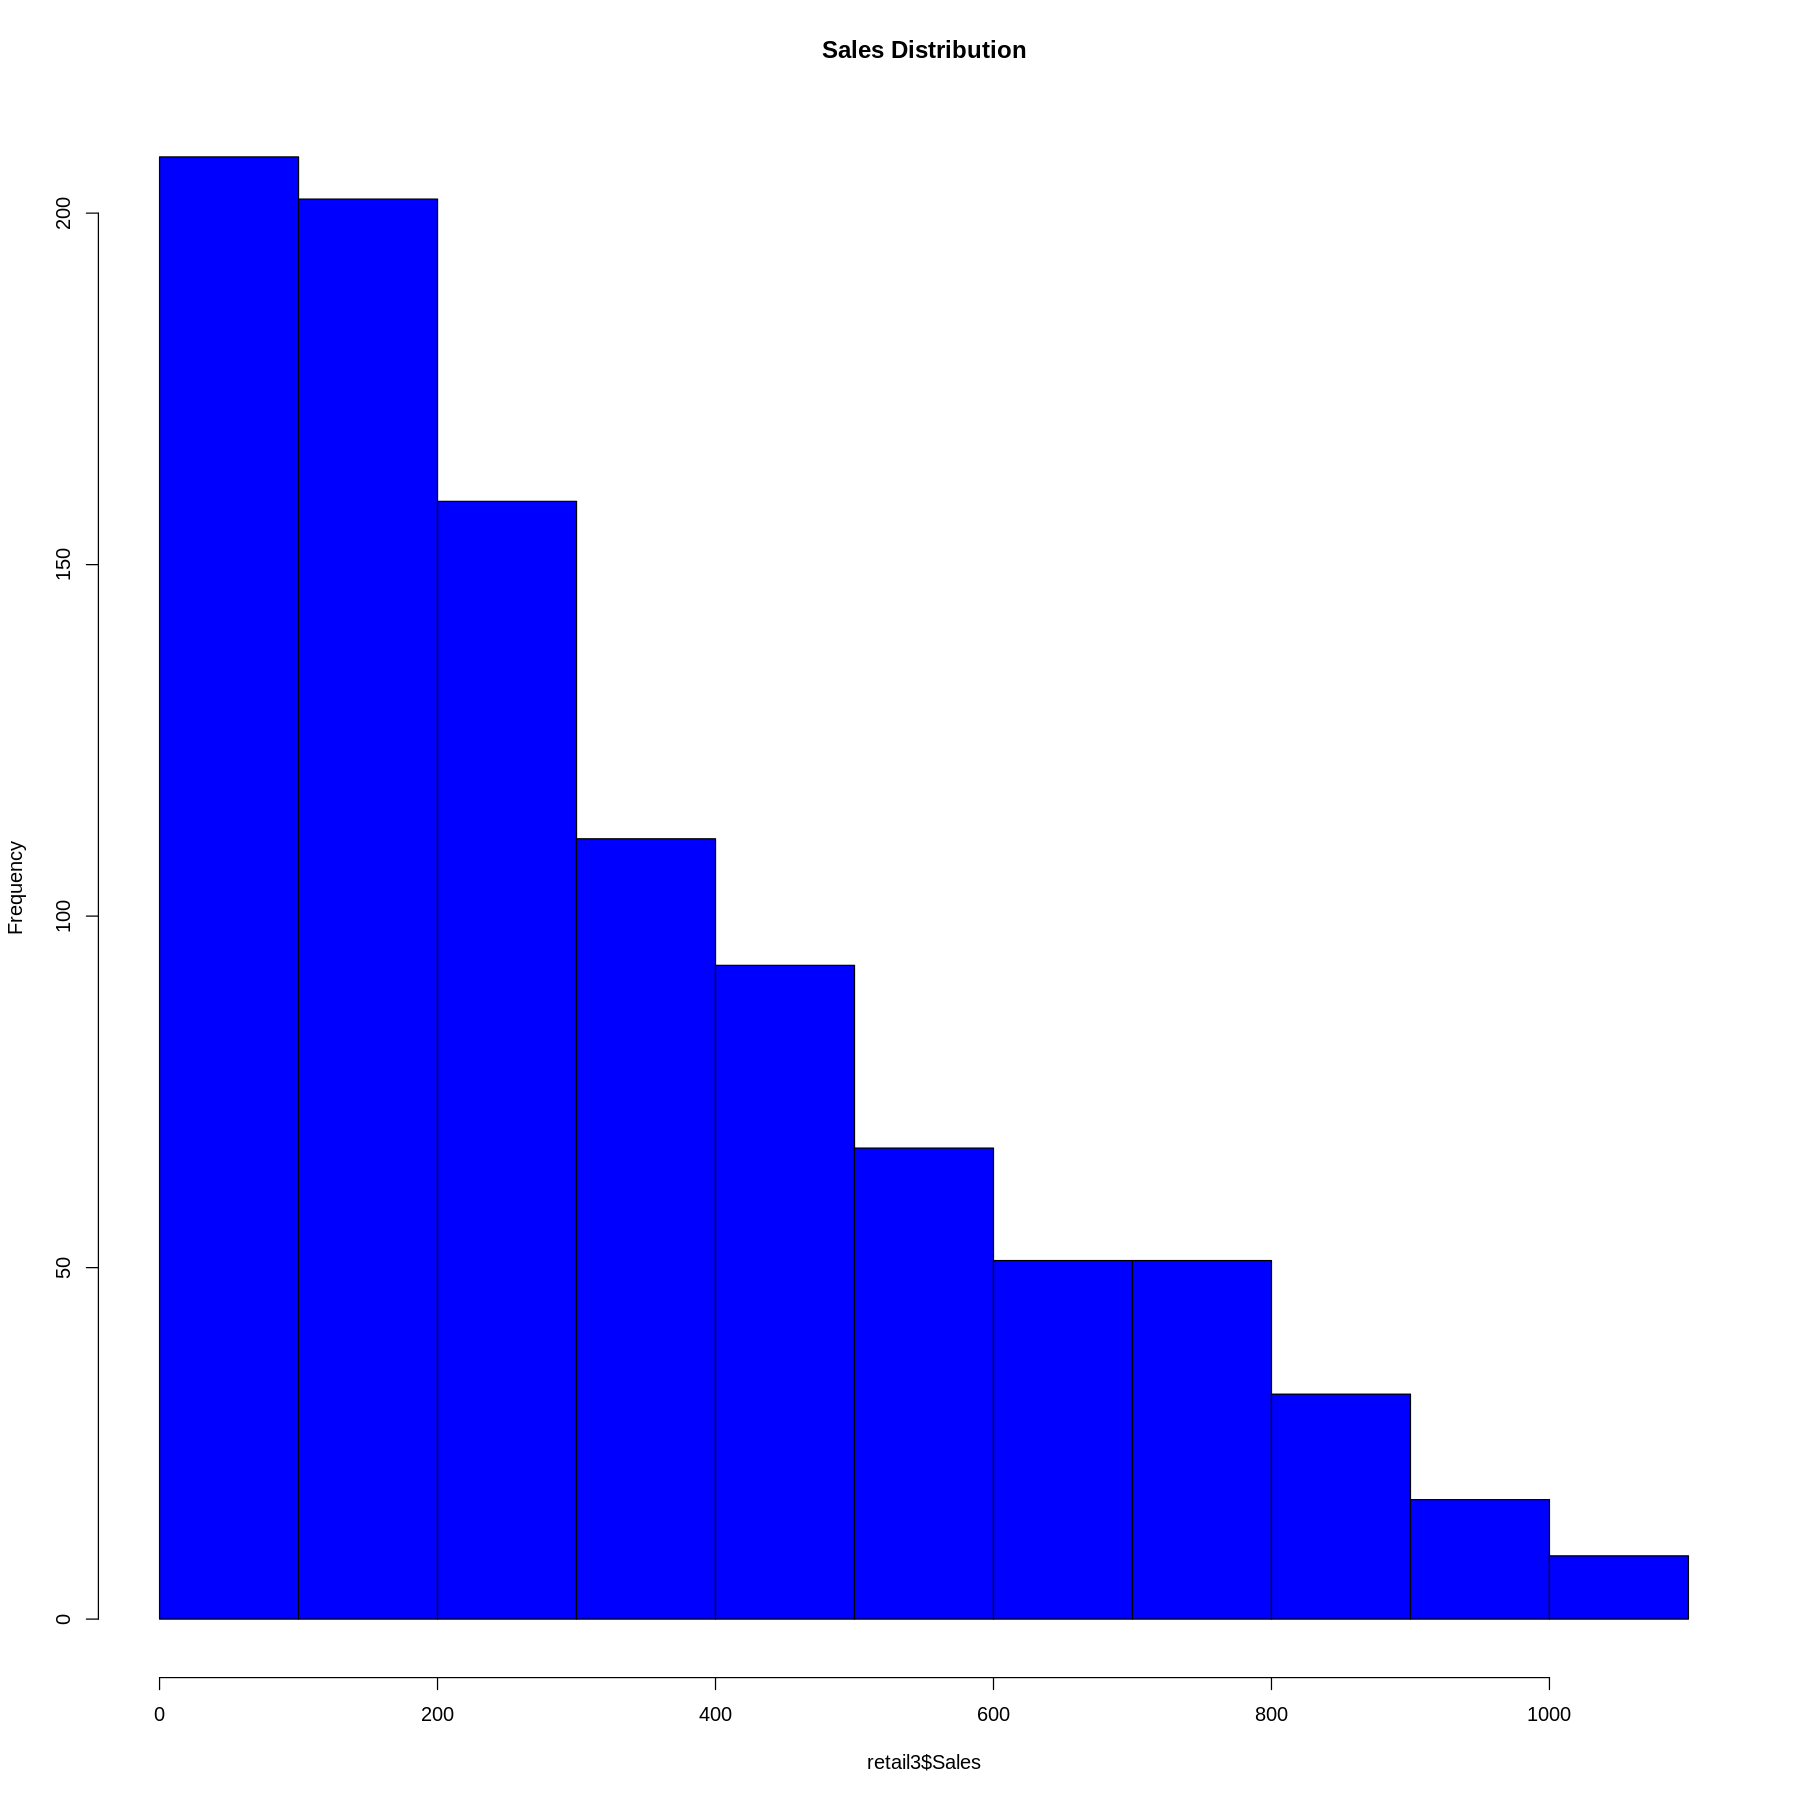

In [ ]:
# Plotting the distibution of the Sales attribute

hist(retail3$Sales, col = 'blue', main = 'Sales Distribution')

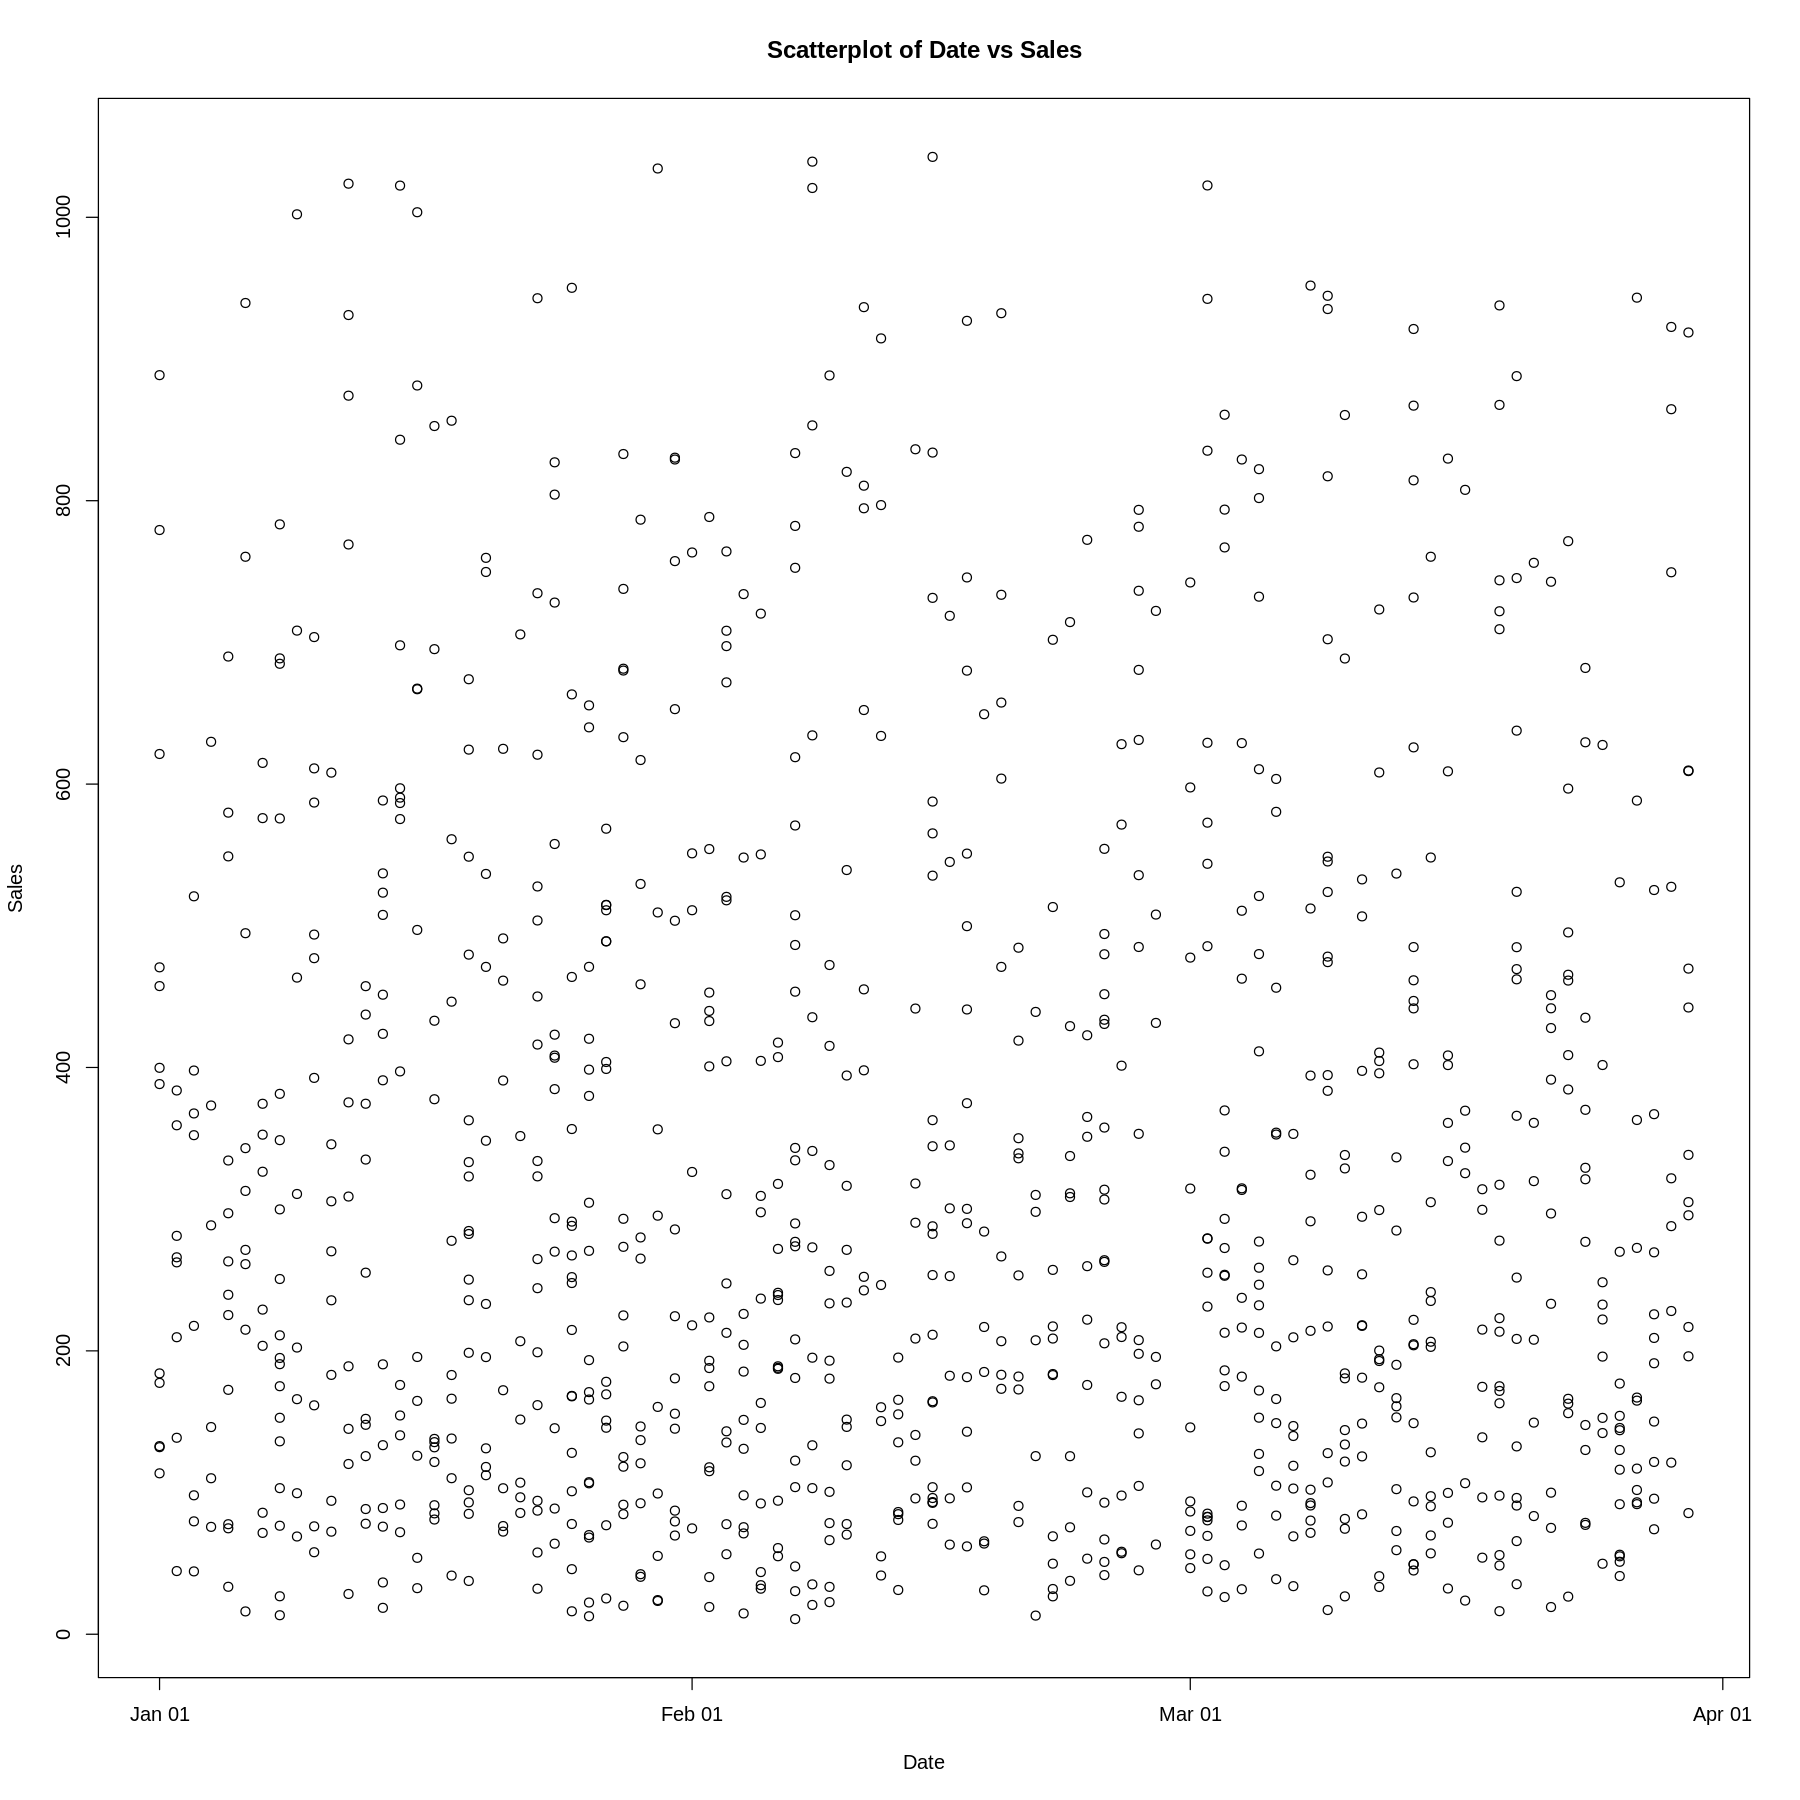

In [ ]:
# Checking the correlation between sales and time period

plot(retail3$Date, retail3$Sales, xlab="Date", ylab="Sales", main = 'Scatterplot of Date vs Sales')

- No apparent pattern or correlation between date and sales

Anomaly Detection

In [ ]:
# Begin by sorting dates in ascending order

retail3 <- retail3[order(retail3$Date),]


In [ ]:
# Grouping the data to get the average sales per day

retail_average <- aggregate(Sales ~ Date, retail3, mean)
head(retail_average)

,Date,Sales
,<date>,<dbl>
1,2020-01-01,395.4318
2,2020-01-02,243.1879
3,2020-01-03,259.7661
4,2020-01-04,270.6148
5,2020-01-05,294.7236
6,2020-01-06,401.5783


frequency = 7 days

trend = 30 days



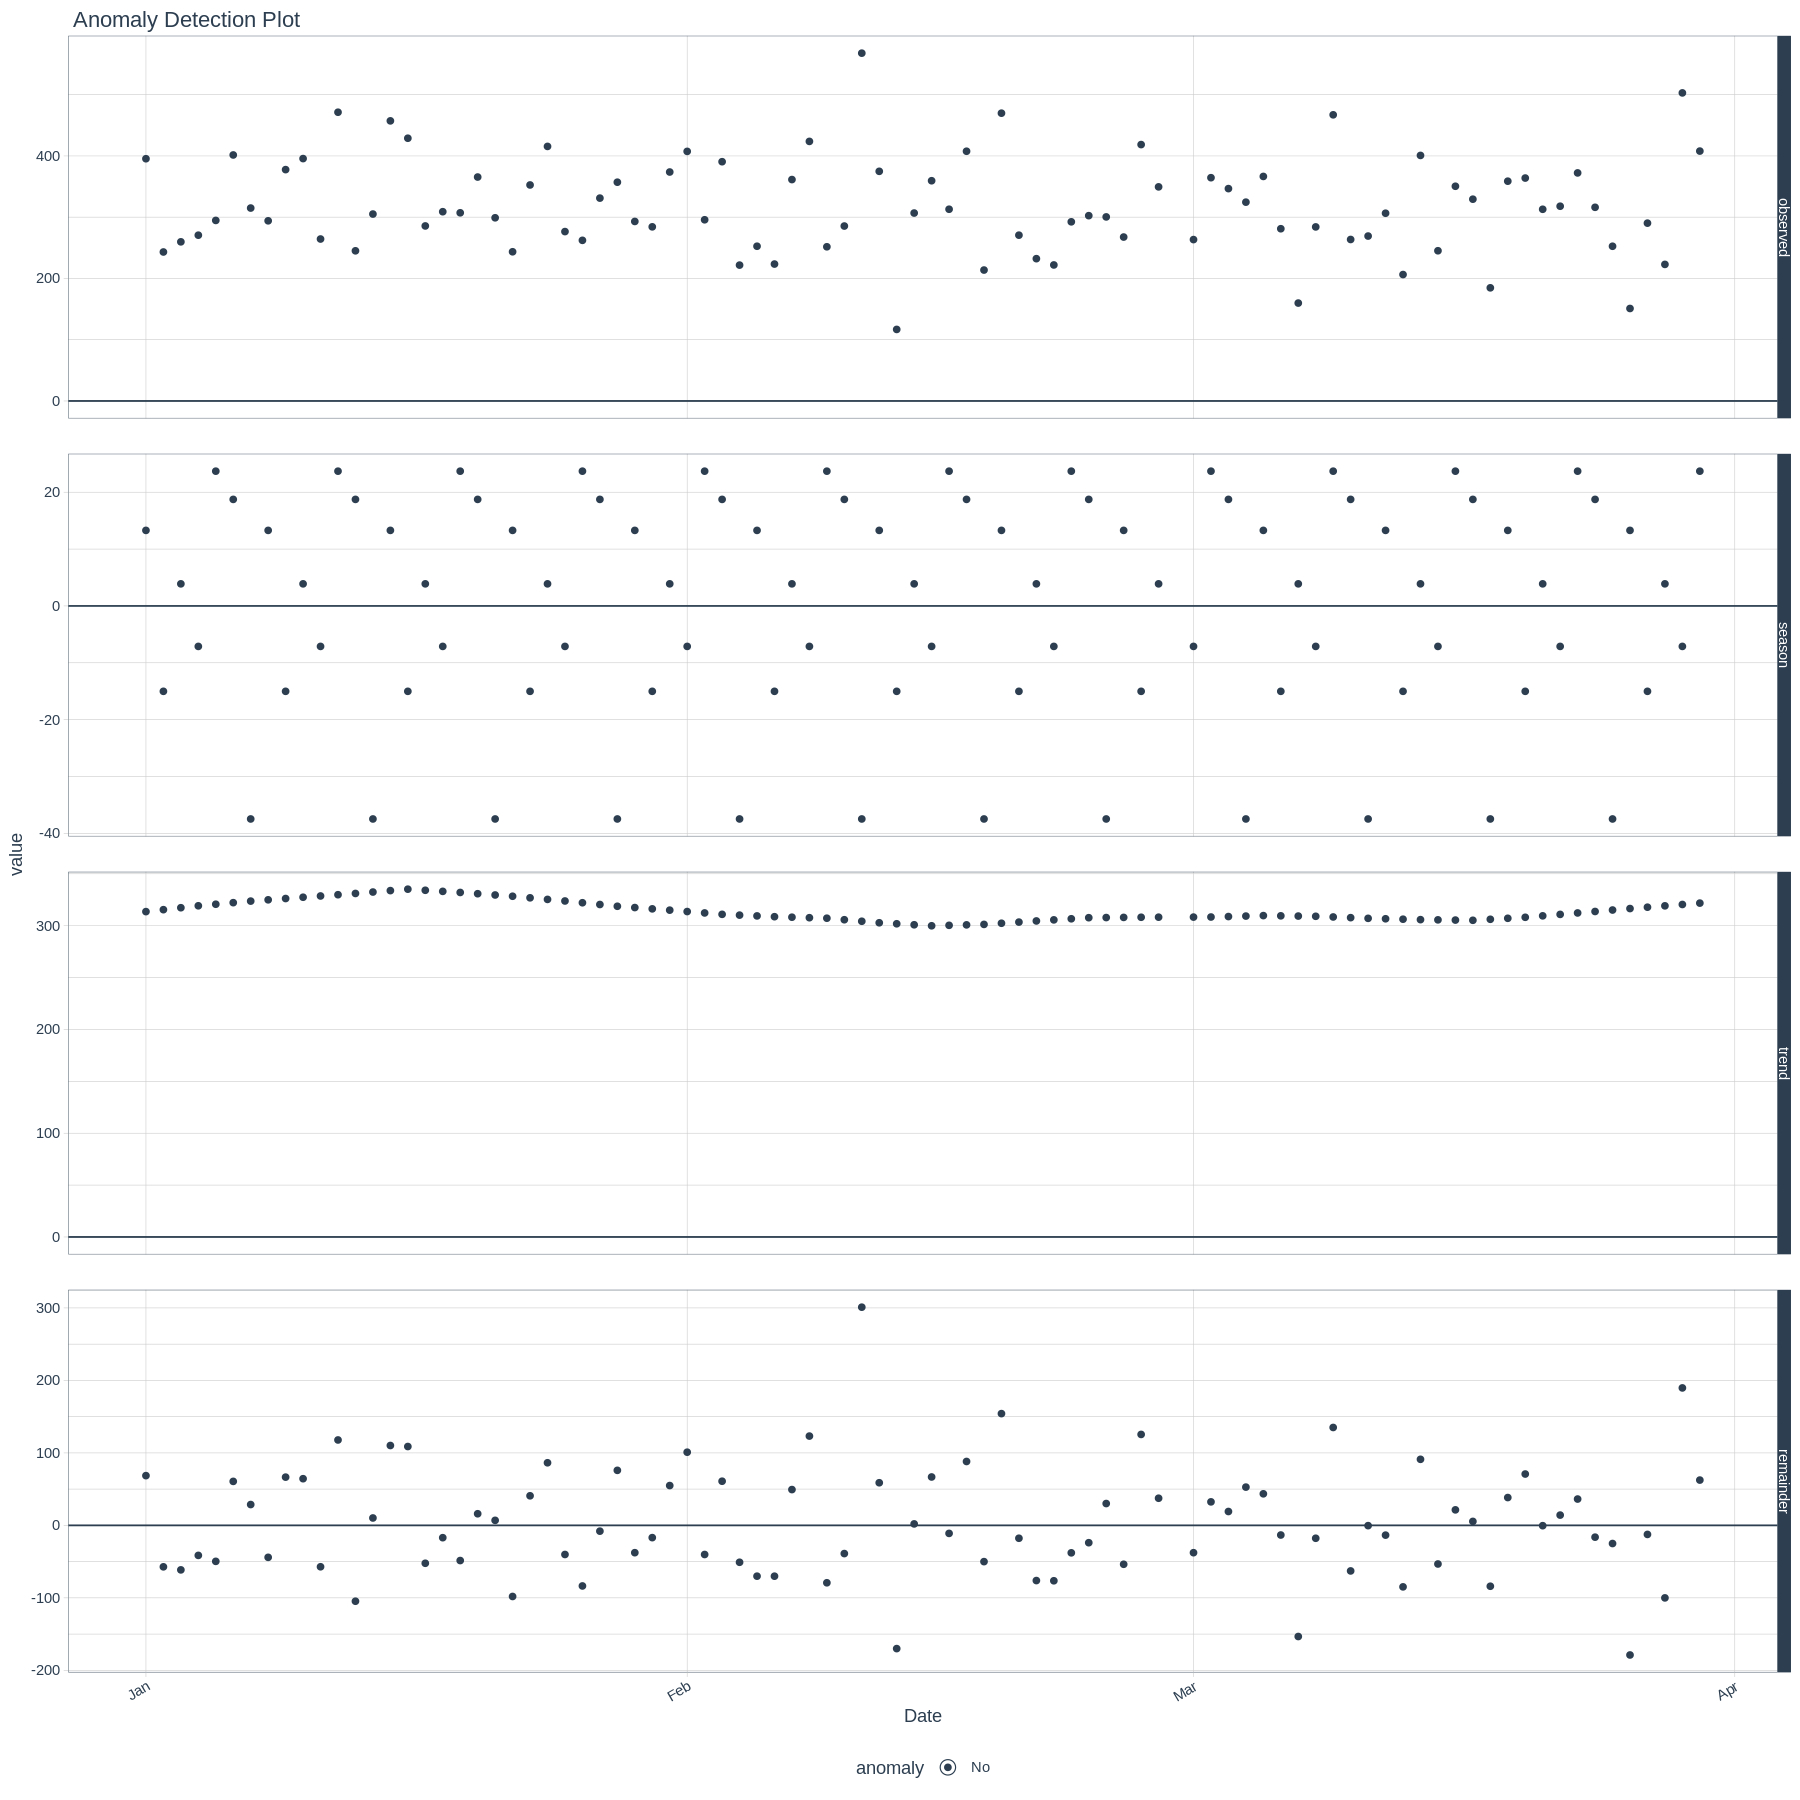

In [ ]:
# visualize the data

library(tibbletime)
library(dplyr)
library(tibble)


retail_average <- tbl_time(retail_average, Date)

retail_average %>%
    time_decompose(Sales) %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle(" Anomaly Detection Plot")



- No anomalies detected in the visualization.

# Challenging the Solution

From the above analysis, we have been able to perform dimensionality reduction using PCA. We only need to move forward with 12 out of 15 principal components since the first 12 components explain ~99% of the variance in the data. However, we also found out that the first 4 principal components only explain 50% of the data variance. This implies that PCA might not be the best dimension reduction technique for this particular data. As such, other reduction techniques such as t-SNE can be explored to further challenge the solution. 

In terms of feature reduction, we used filter methods to discard highly correlated features. We were able to determine the most important features which can be focused on when curating a marketing campaign. Other methods such as wrapper methods, embedded methods and feature ranking can also be explored and compared to accurately determine the features that contribute the most information to the dataset.

From the association rules analysis we were able to determine that the most commonly bought items are mineral water, eggs, milk, green tea, chocolate, french fries, spaghetti, pancakes, frozen vegetables and ground beef. These items can be prioritized on marketing since they are already popular with customers. In addition, customers who buy pasta are highly likely to buy shrimp as well. Therefore these products can be placed in close proximity. On the other hand, mineral water, french fries and spaghetti are often bought by customers who buy milk. These products can be placed close enough to each other to maximize on marketing.

Finally, we did not detect any anomalies in the sales data recorded by the store. We can therfore conclude that there's no fraud going on and that current systems are good enough to safeguard against fraudulent activities.